# 1 - Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
from babel.numbers import format_number, format_decimal, format_percent
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

# 2 - Configurações iniciais da ferramentas

## 2.1 Configuração da biblioteca de visualização

In [2]:
sns.set(
    rc={"figure.dpi":200, 'savefig.dpi':200}, 
    style="ticks",
    color_codes=True
)

palette = [
    
]

## 2.2 Adição das funções de visualizações

# 3 Importação das bases de dados

In [4]:
uri = 'data/hanseniase_v1.csv'
database = pd.read_csv(uri, low_memory=False)
casos_novos = database[database['MODOENTR'] == 'Caso novo']
municipios_tocantins = pd.read_csv('data/municipios_tocantins.csv', low_memory=False)

# 4 Análise exploratória de dados

## Atributo Classificação Operacional

[]

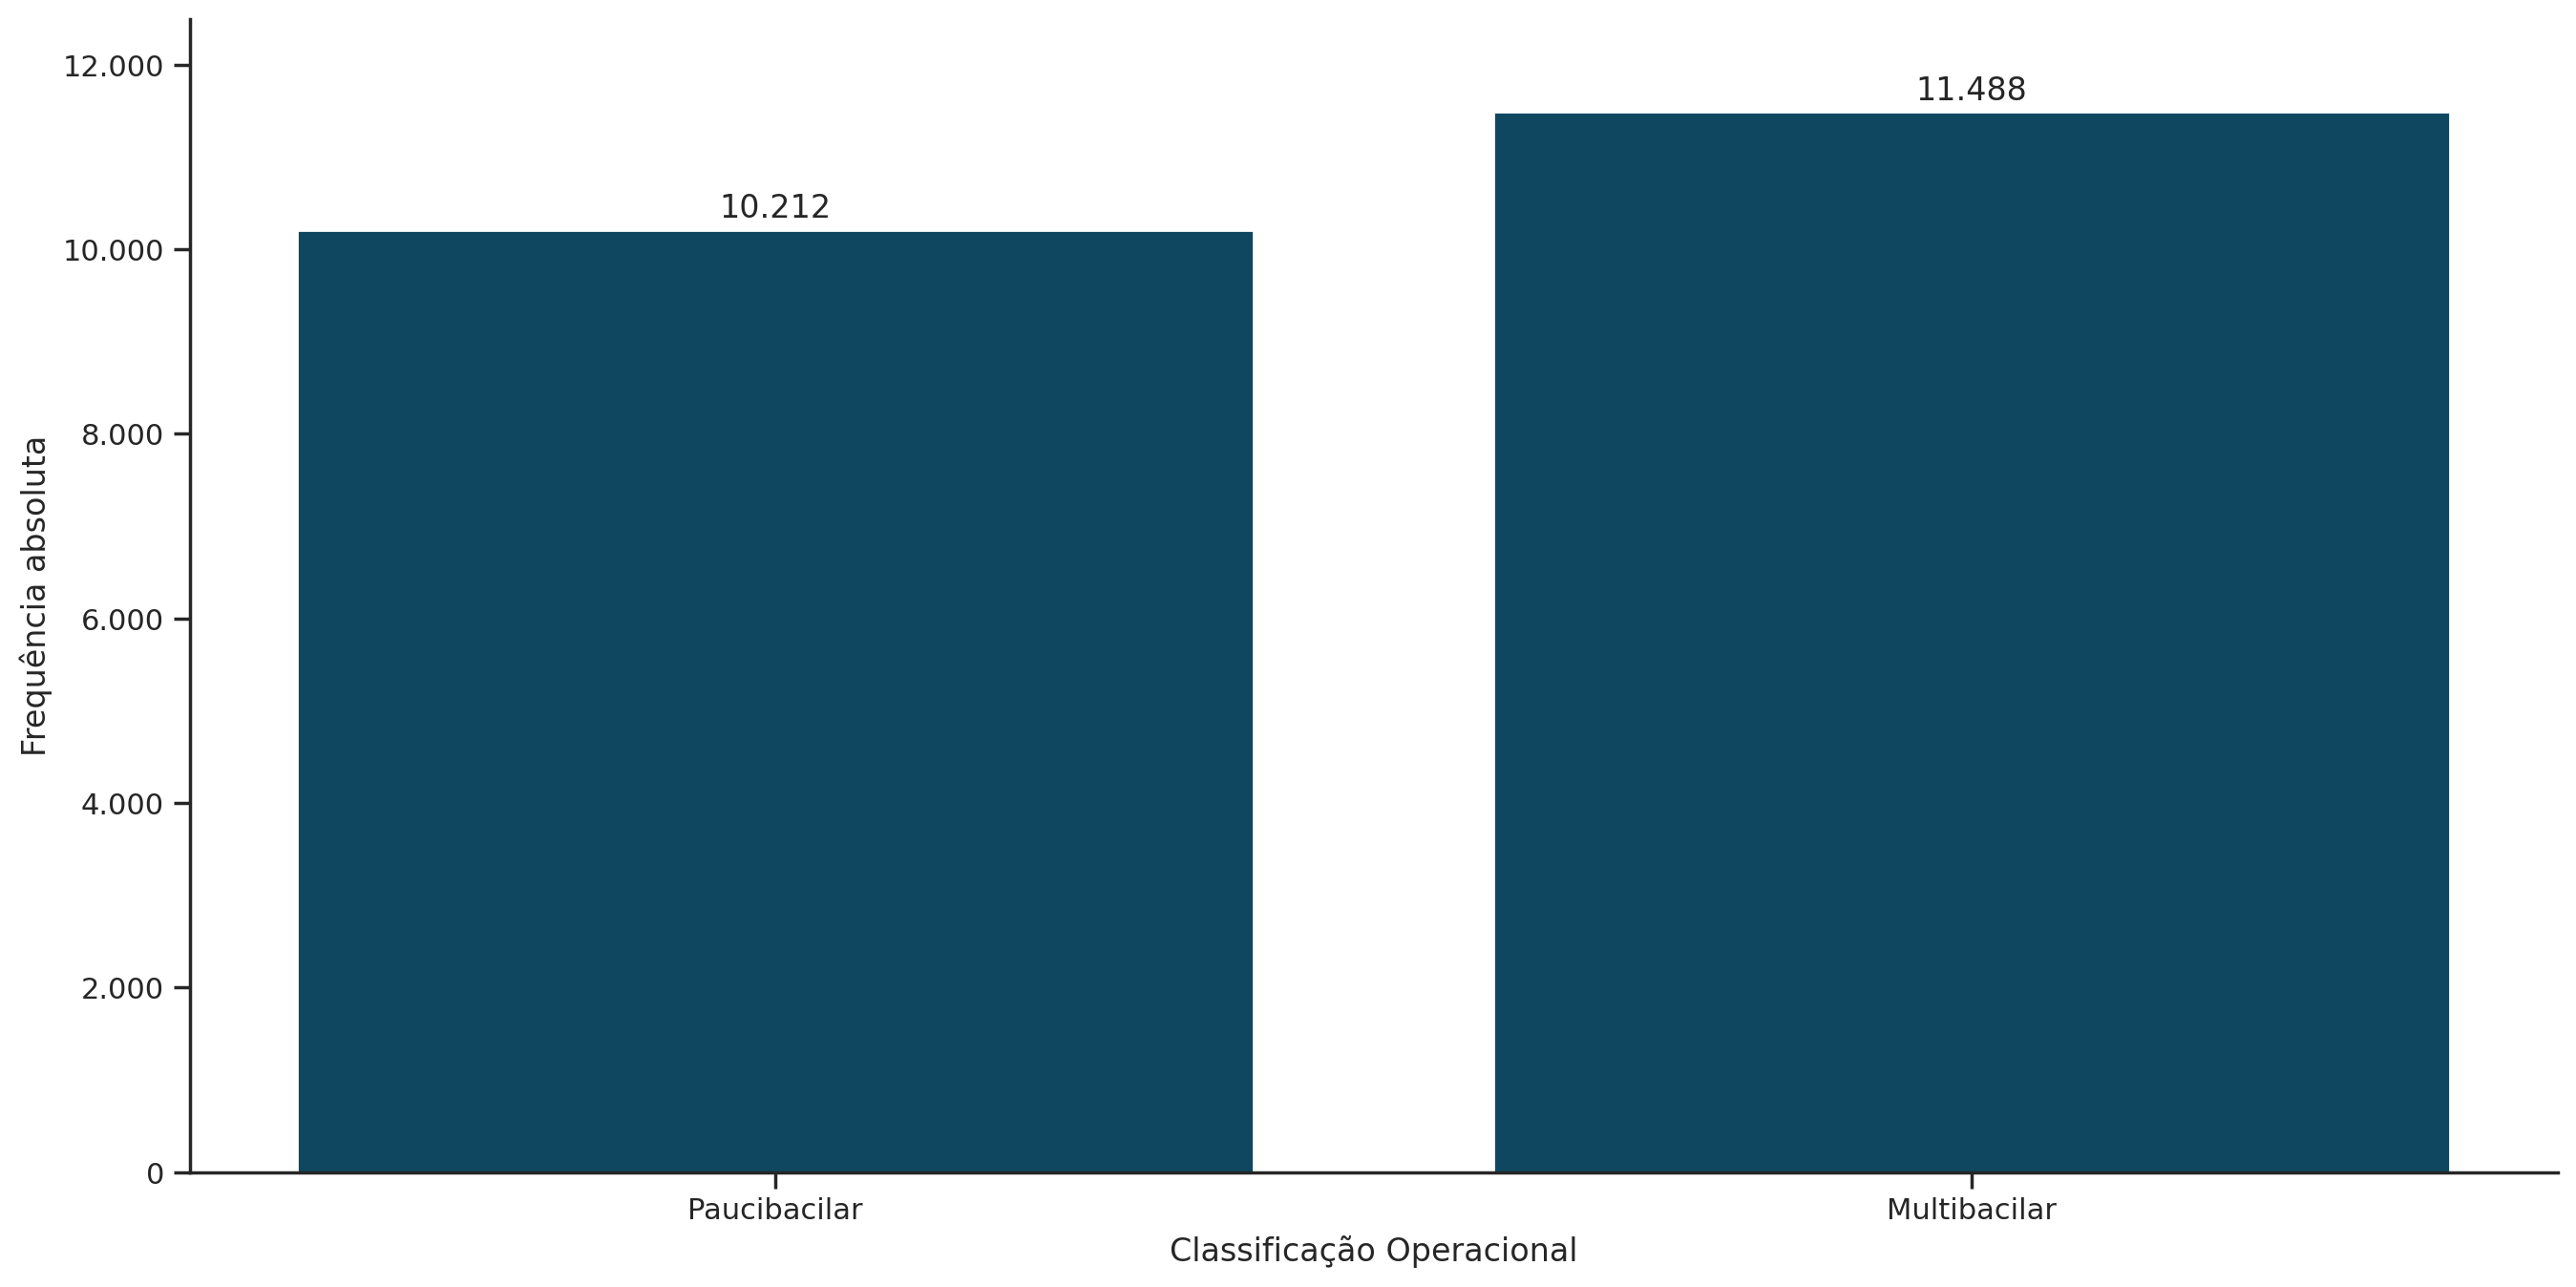

In [92]:
classopera = database['CLASSOPERA'].value_counts()
data = {
    'labels': classopera.keys().to_list(),
    'values': classopera.values,
}
ordering = ['Paucibacilar','Multibacilar']
sexo_values = classopera.values
df = pd.DataFrame({
    'labels': data['labels'], 
    'values': data['values']
})
plt.figure(figsize=(16,8))
ax = sns.barplot(x='labels', y='values', data=df, order=ordering, palette=["#004c6d"])
sns.despine()
ax.set(
    xlabel='Classificação Operacional', 
    ylabel='Frequência absoluta', 
    title=''
)
ax.set_ylim(0, 12500)
for p in ax.patches:
    ax.annotate(format_decimal(p.get_height(), locale='pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
ax.plot()

## Atributo Sexo

[]

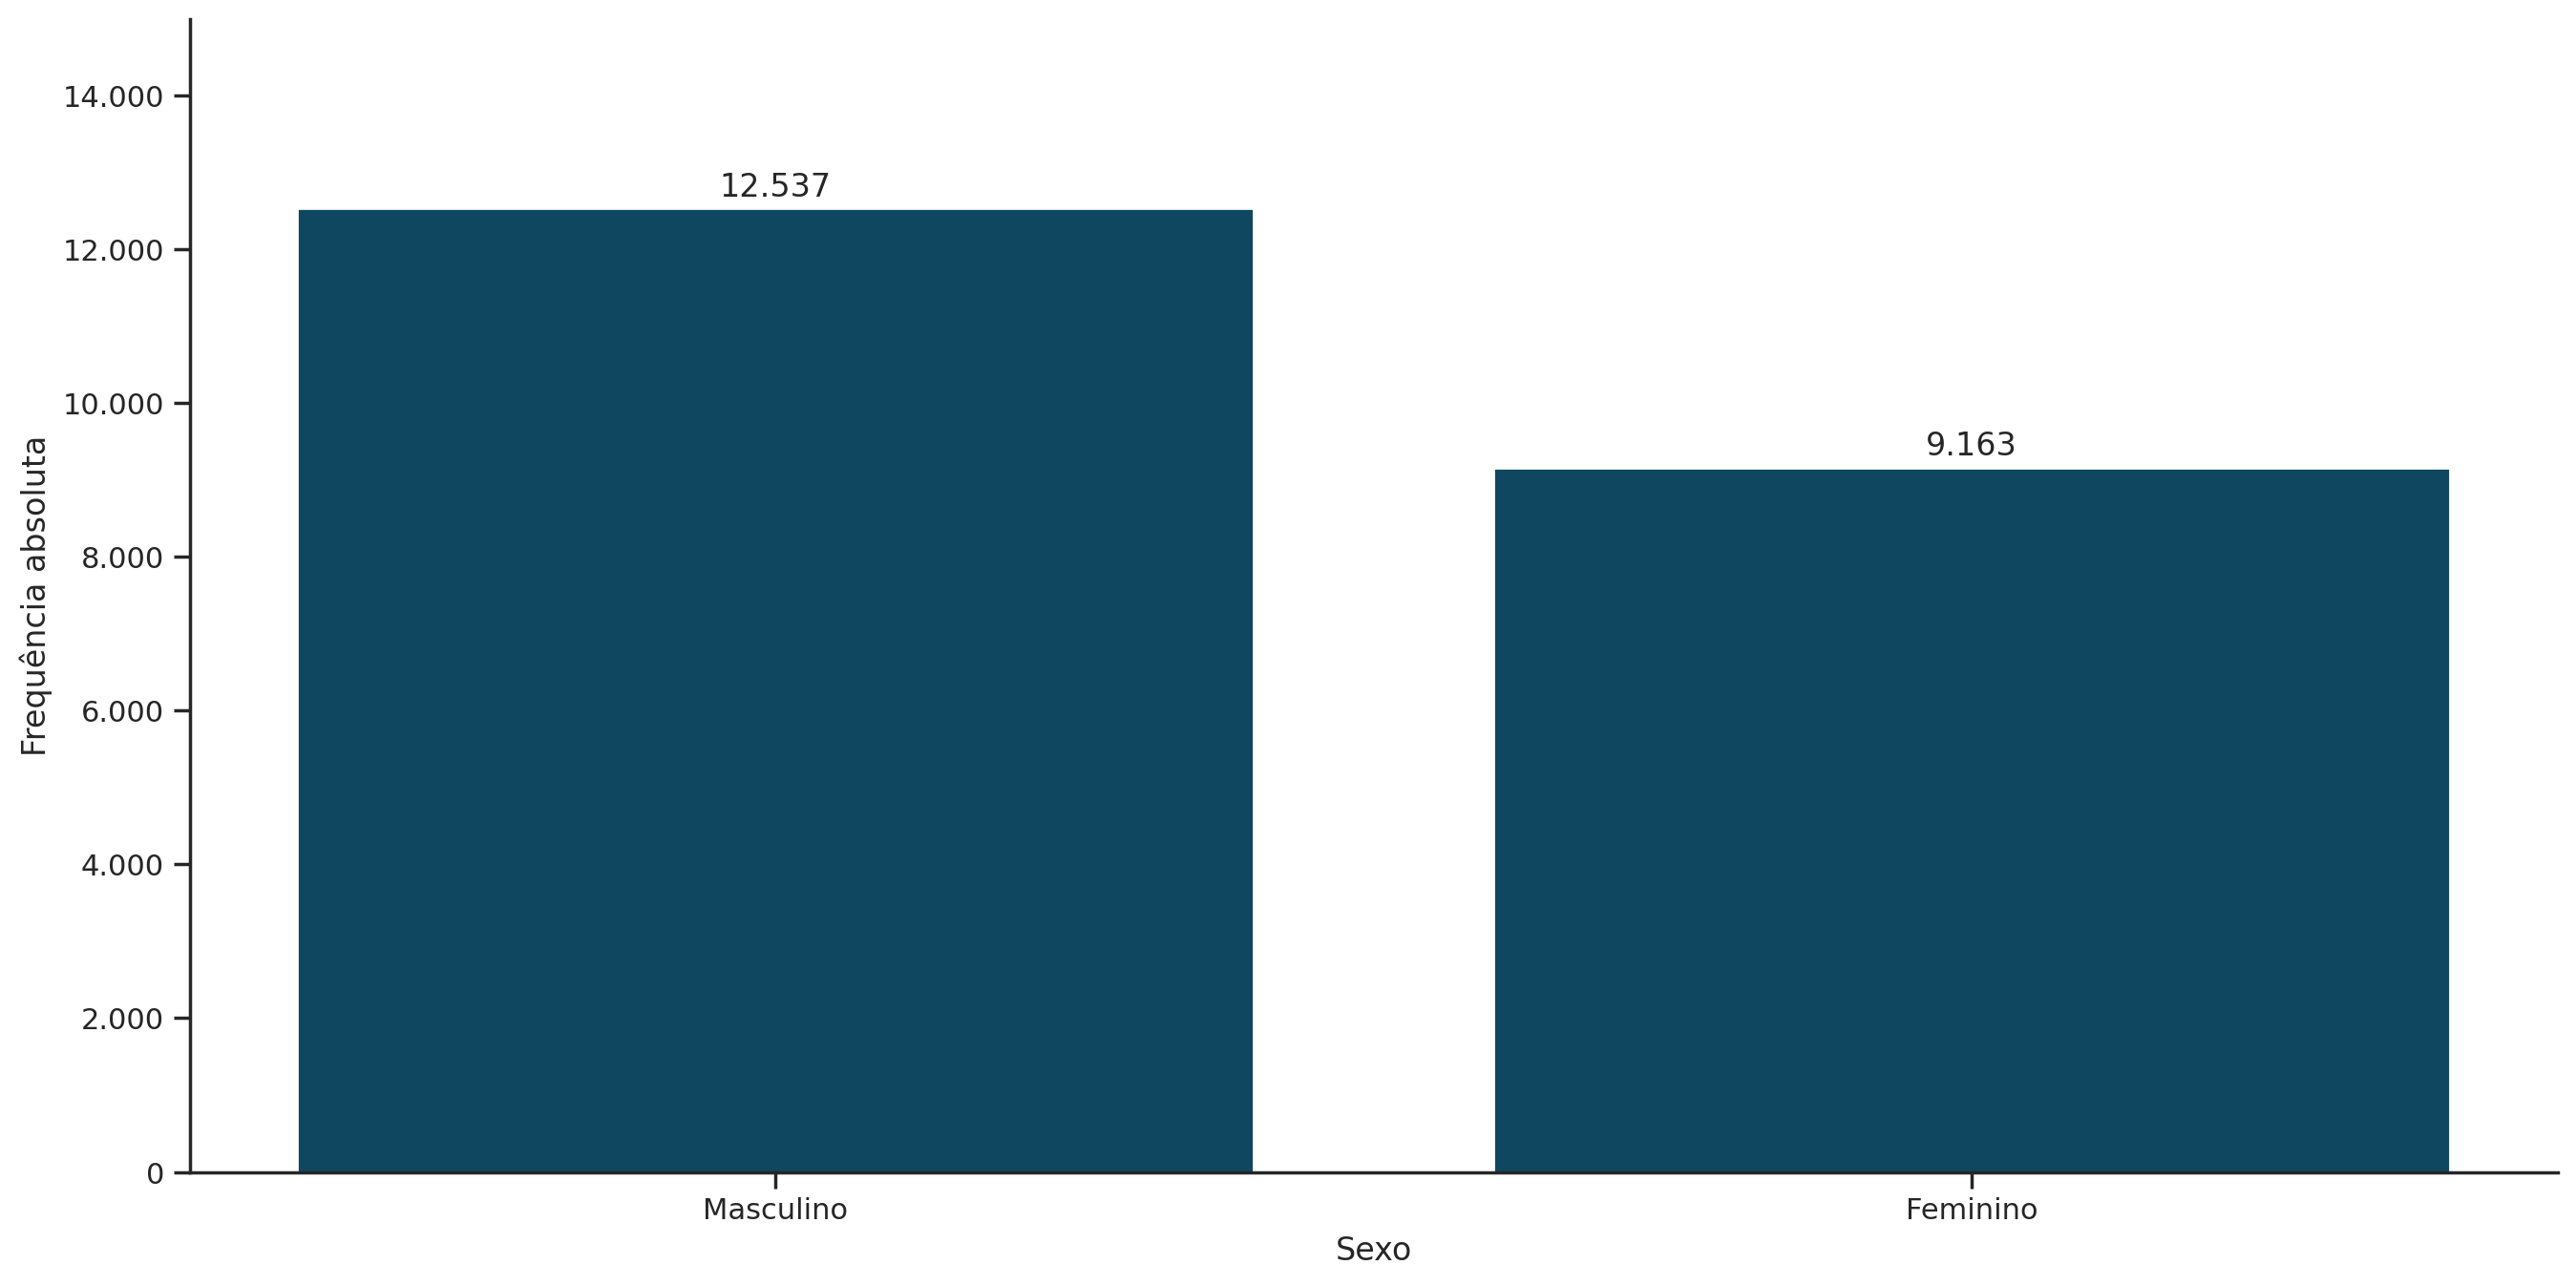

In [19]:
sexo = database['CS_SEXO'].value_counts()
data = {
    'labels': sexo.keys().to_list(),
    'values': sexo.values,
}
ordering = ['Masculino','Feminino']
sexo_values = sexo.values
df = pd.DataFrame(data={'labels': data['labels'], 'values': data['values']})
plt.figure(figsize=(16,8))
ax = sns.barplot(x='labels', y='values', data=df, order=ordering, palette=["#004c6d"])
sns.despine()
ax.set(
    xlabel='Sexo', 
    ylabel='Frequência absoluta', 
    title=''
)
ax.set_ylim(0, 15000)
for p in ax.patches:
    ax.annotate(format_decimal(p.get_height(), locale='pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
ax.plot()

## Atributo Ano da notificação

[]

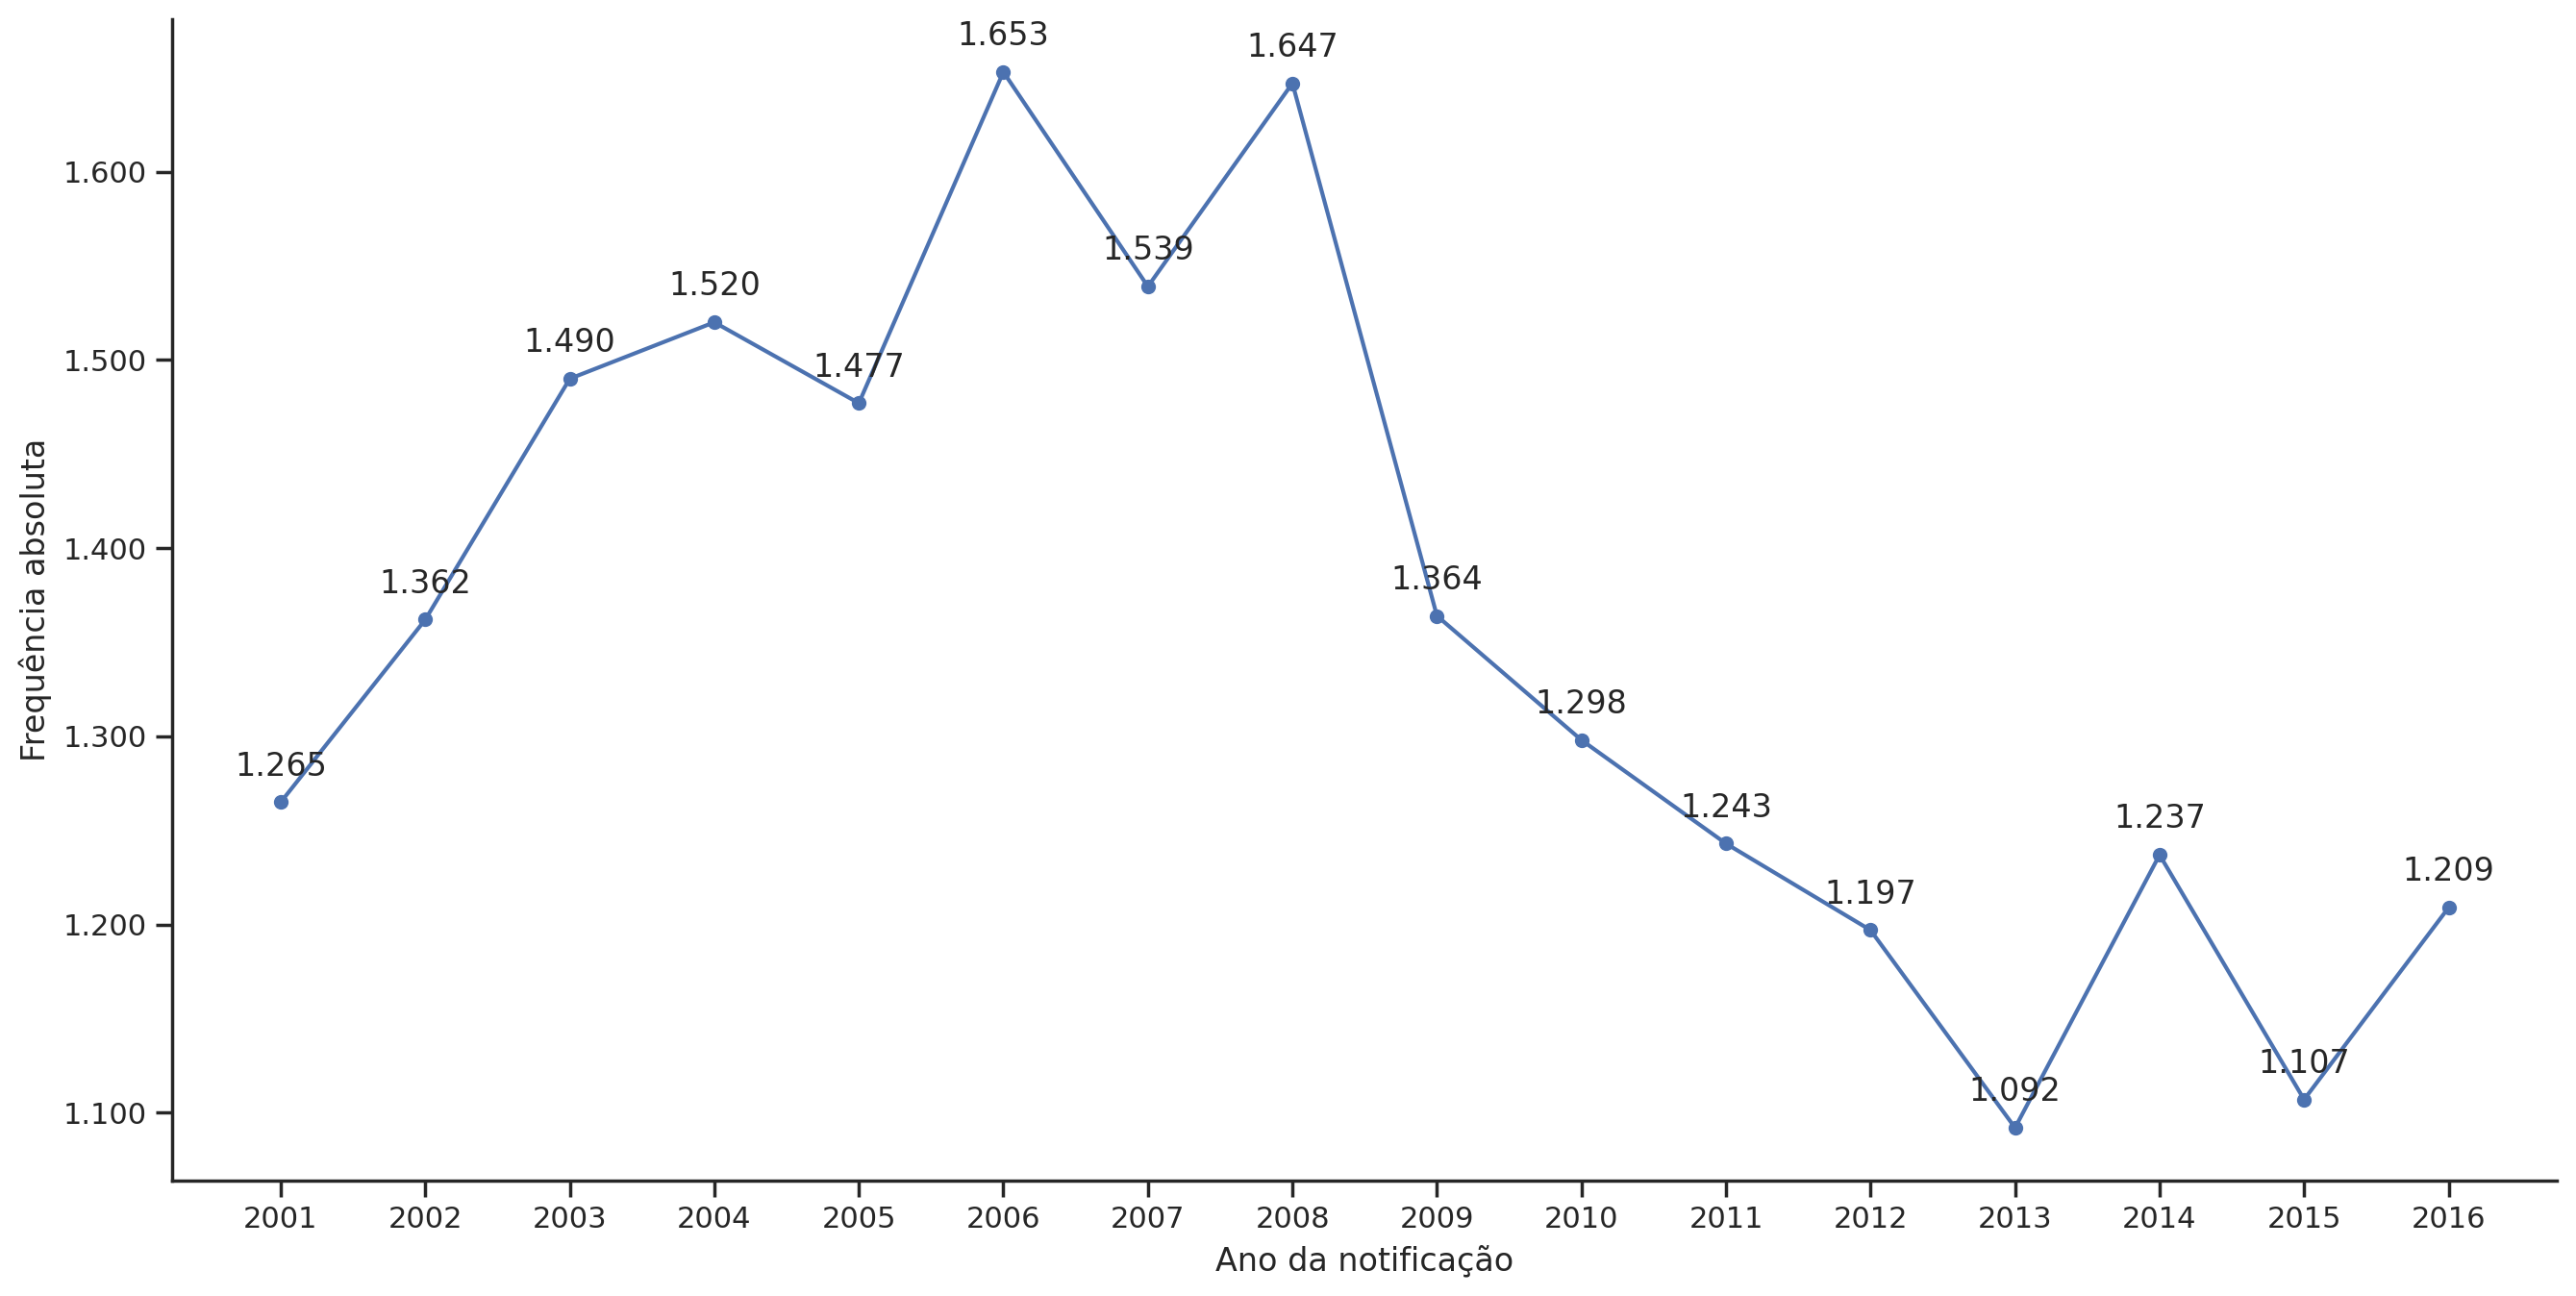

In [52]:
anos = database['NU_ANO'].value_counts(dropna=False).sort_index()
data = {
    'labels': anos.keys().to_list(),
    'values': anos.values,
}
labels = list(anos.keys())
values = anos.values
df = pd.DataFrame(data={'labels': labels, 'values': values})
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='labels', y='values', data=df, palette=["#004c6d"])
sns.scatterplot(data=df, x='labels', y='values')
sns.despine()
ax.set(
    xlabel='Ano da notificação', 
    ylabel='Frequência absoluta', 
    title=''
)
for x,y in zip(df['labels'], df['values']):
    label = "{}".format(format_number(y, 'pt_BR'))
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(0, 10), ha='center')
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
ax.set_xticks(range(2001,2017))
ax.set_xticklabels(range(2001, 2017))
for p in ax.patches:
    ax.annotate(format_number(p.get_height(), 'pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.plot()


## Atributo Raça

[]

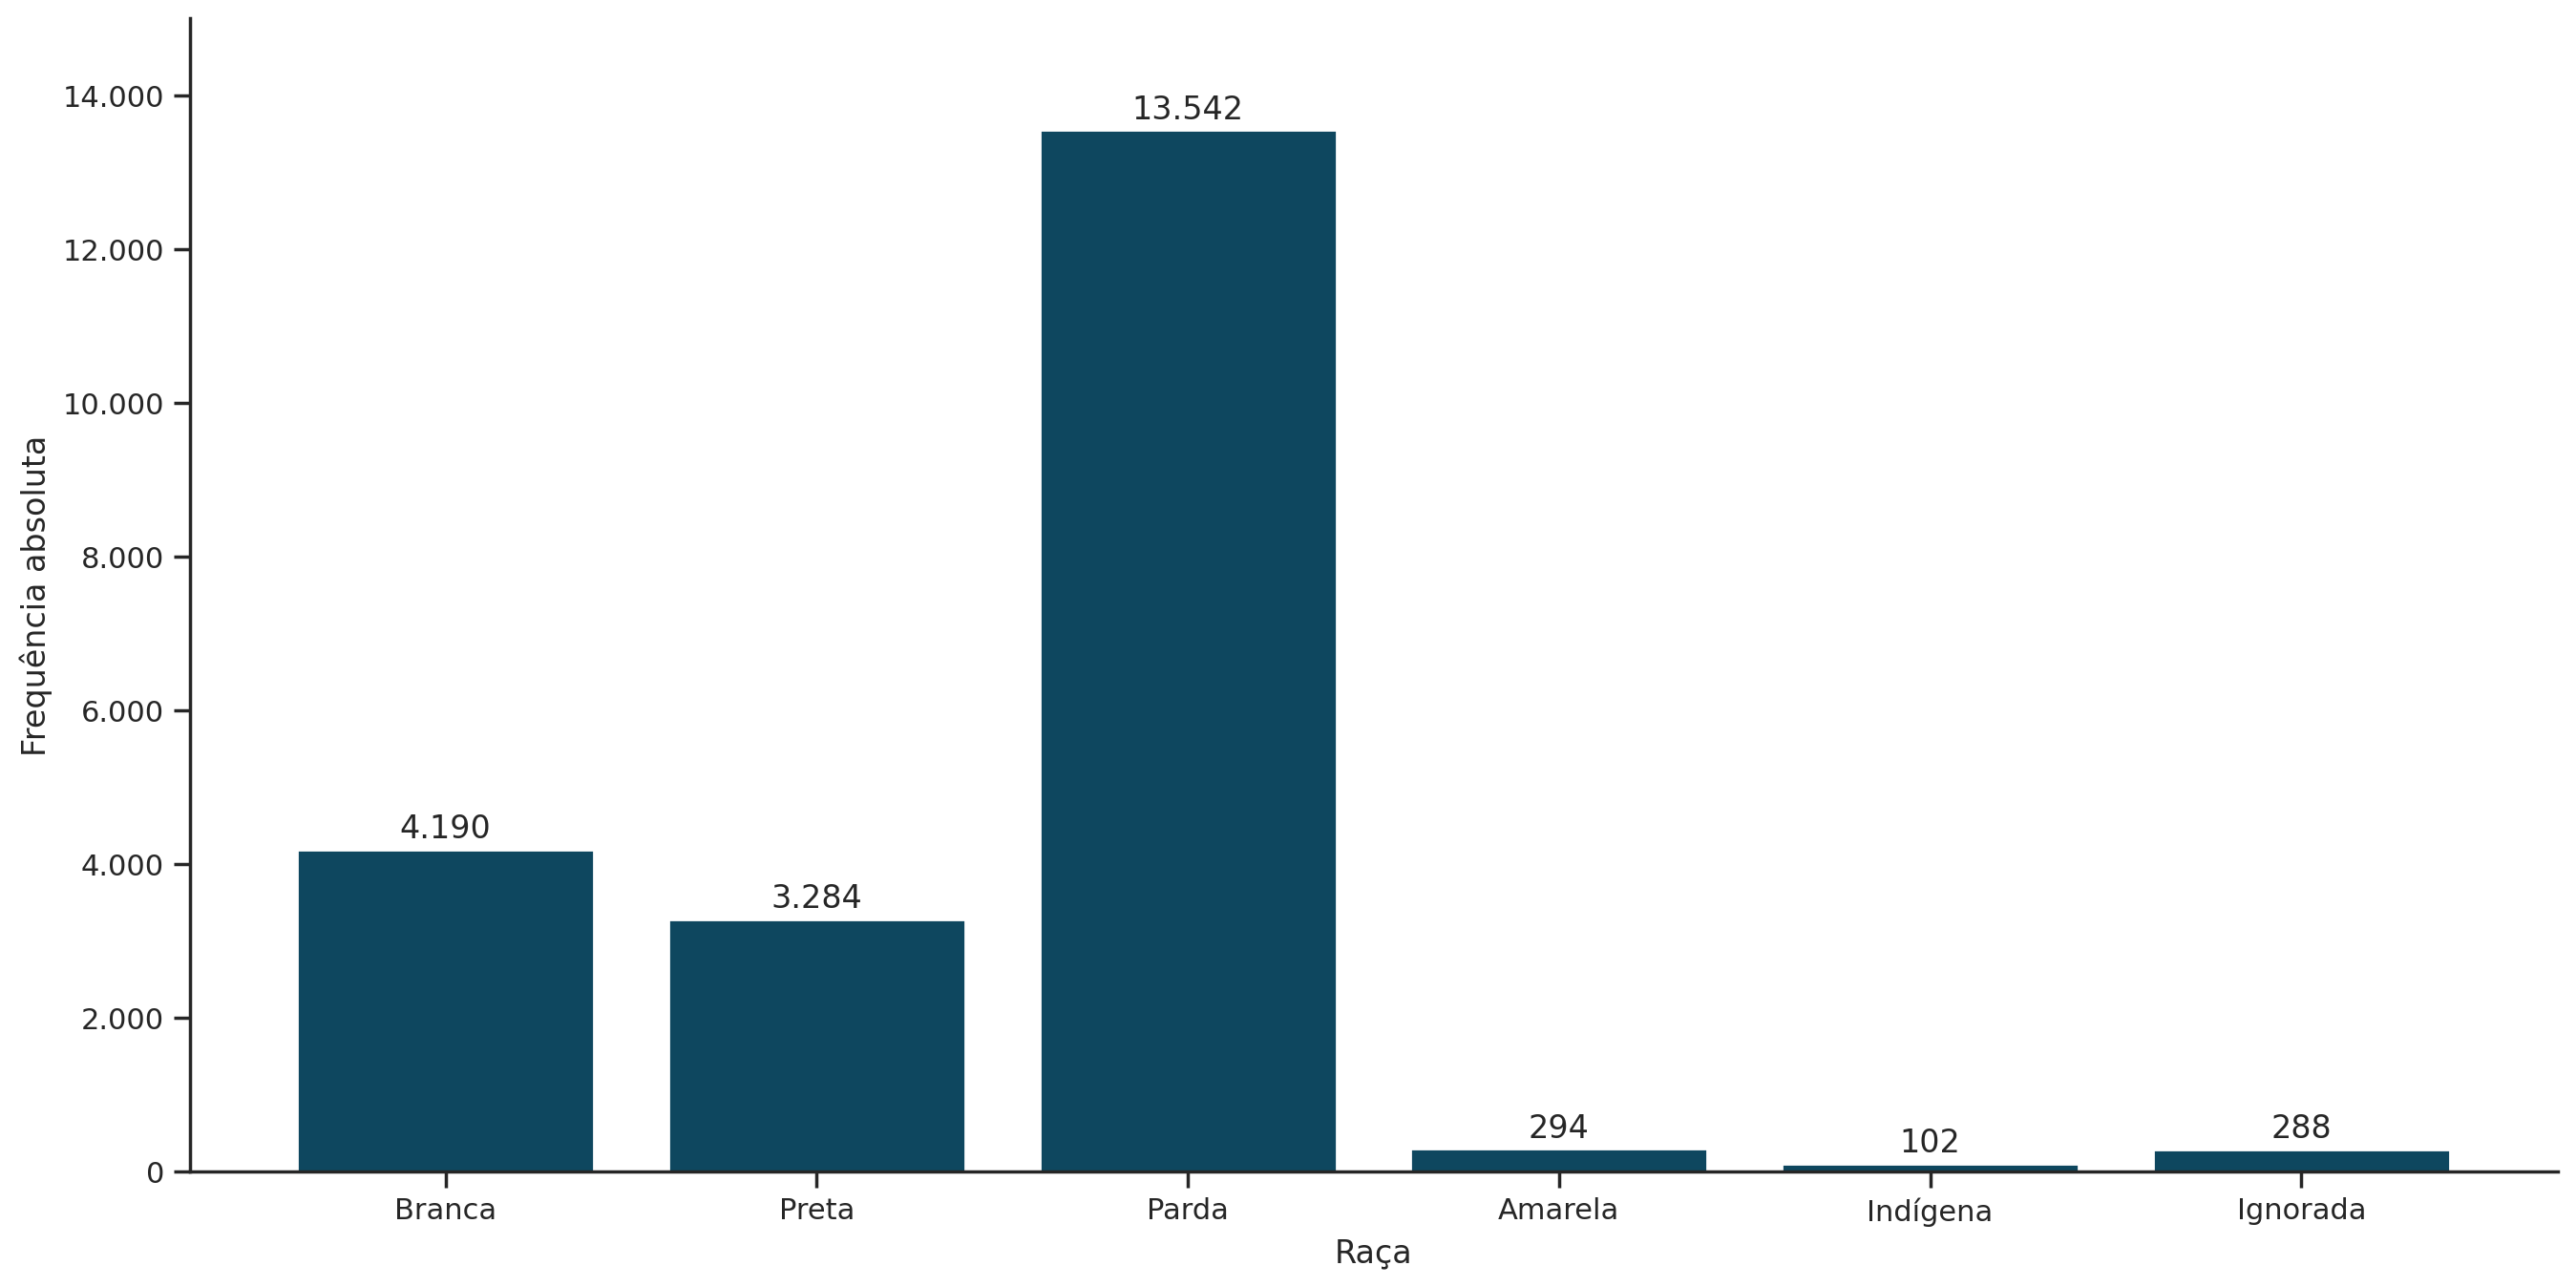

In [47]:
raca = database['CS_RACA'].value_counts(dropna=False).sort_index()
data = pd.DataFrame({
    'labels': raca.keys().to_list(),
    'values': raca.values,
})
labels = ['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Ignorada']
plt.figure(figsize=(16,8))
ax = sns.barplot(
    x='labels', 
    y='values', 
    data=data, 
    palette=["#004c6d"],
    order=labels
)
sns.despine()
ax.set(xlabel='Raça', ylabel='Frequência absoluta', title='')
ax.set_ylim(0, 15000)
for p in ax.patches:
    ax.annotate(format_number(p.get_height(), 'pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
ax.plot()

## Atributo Idade do Paciente

[]

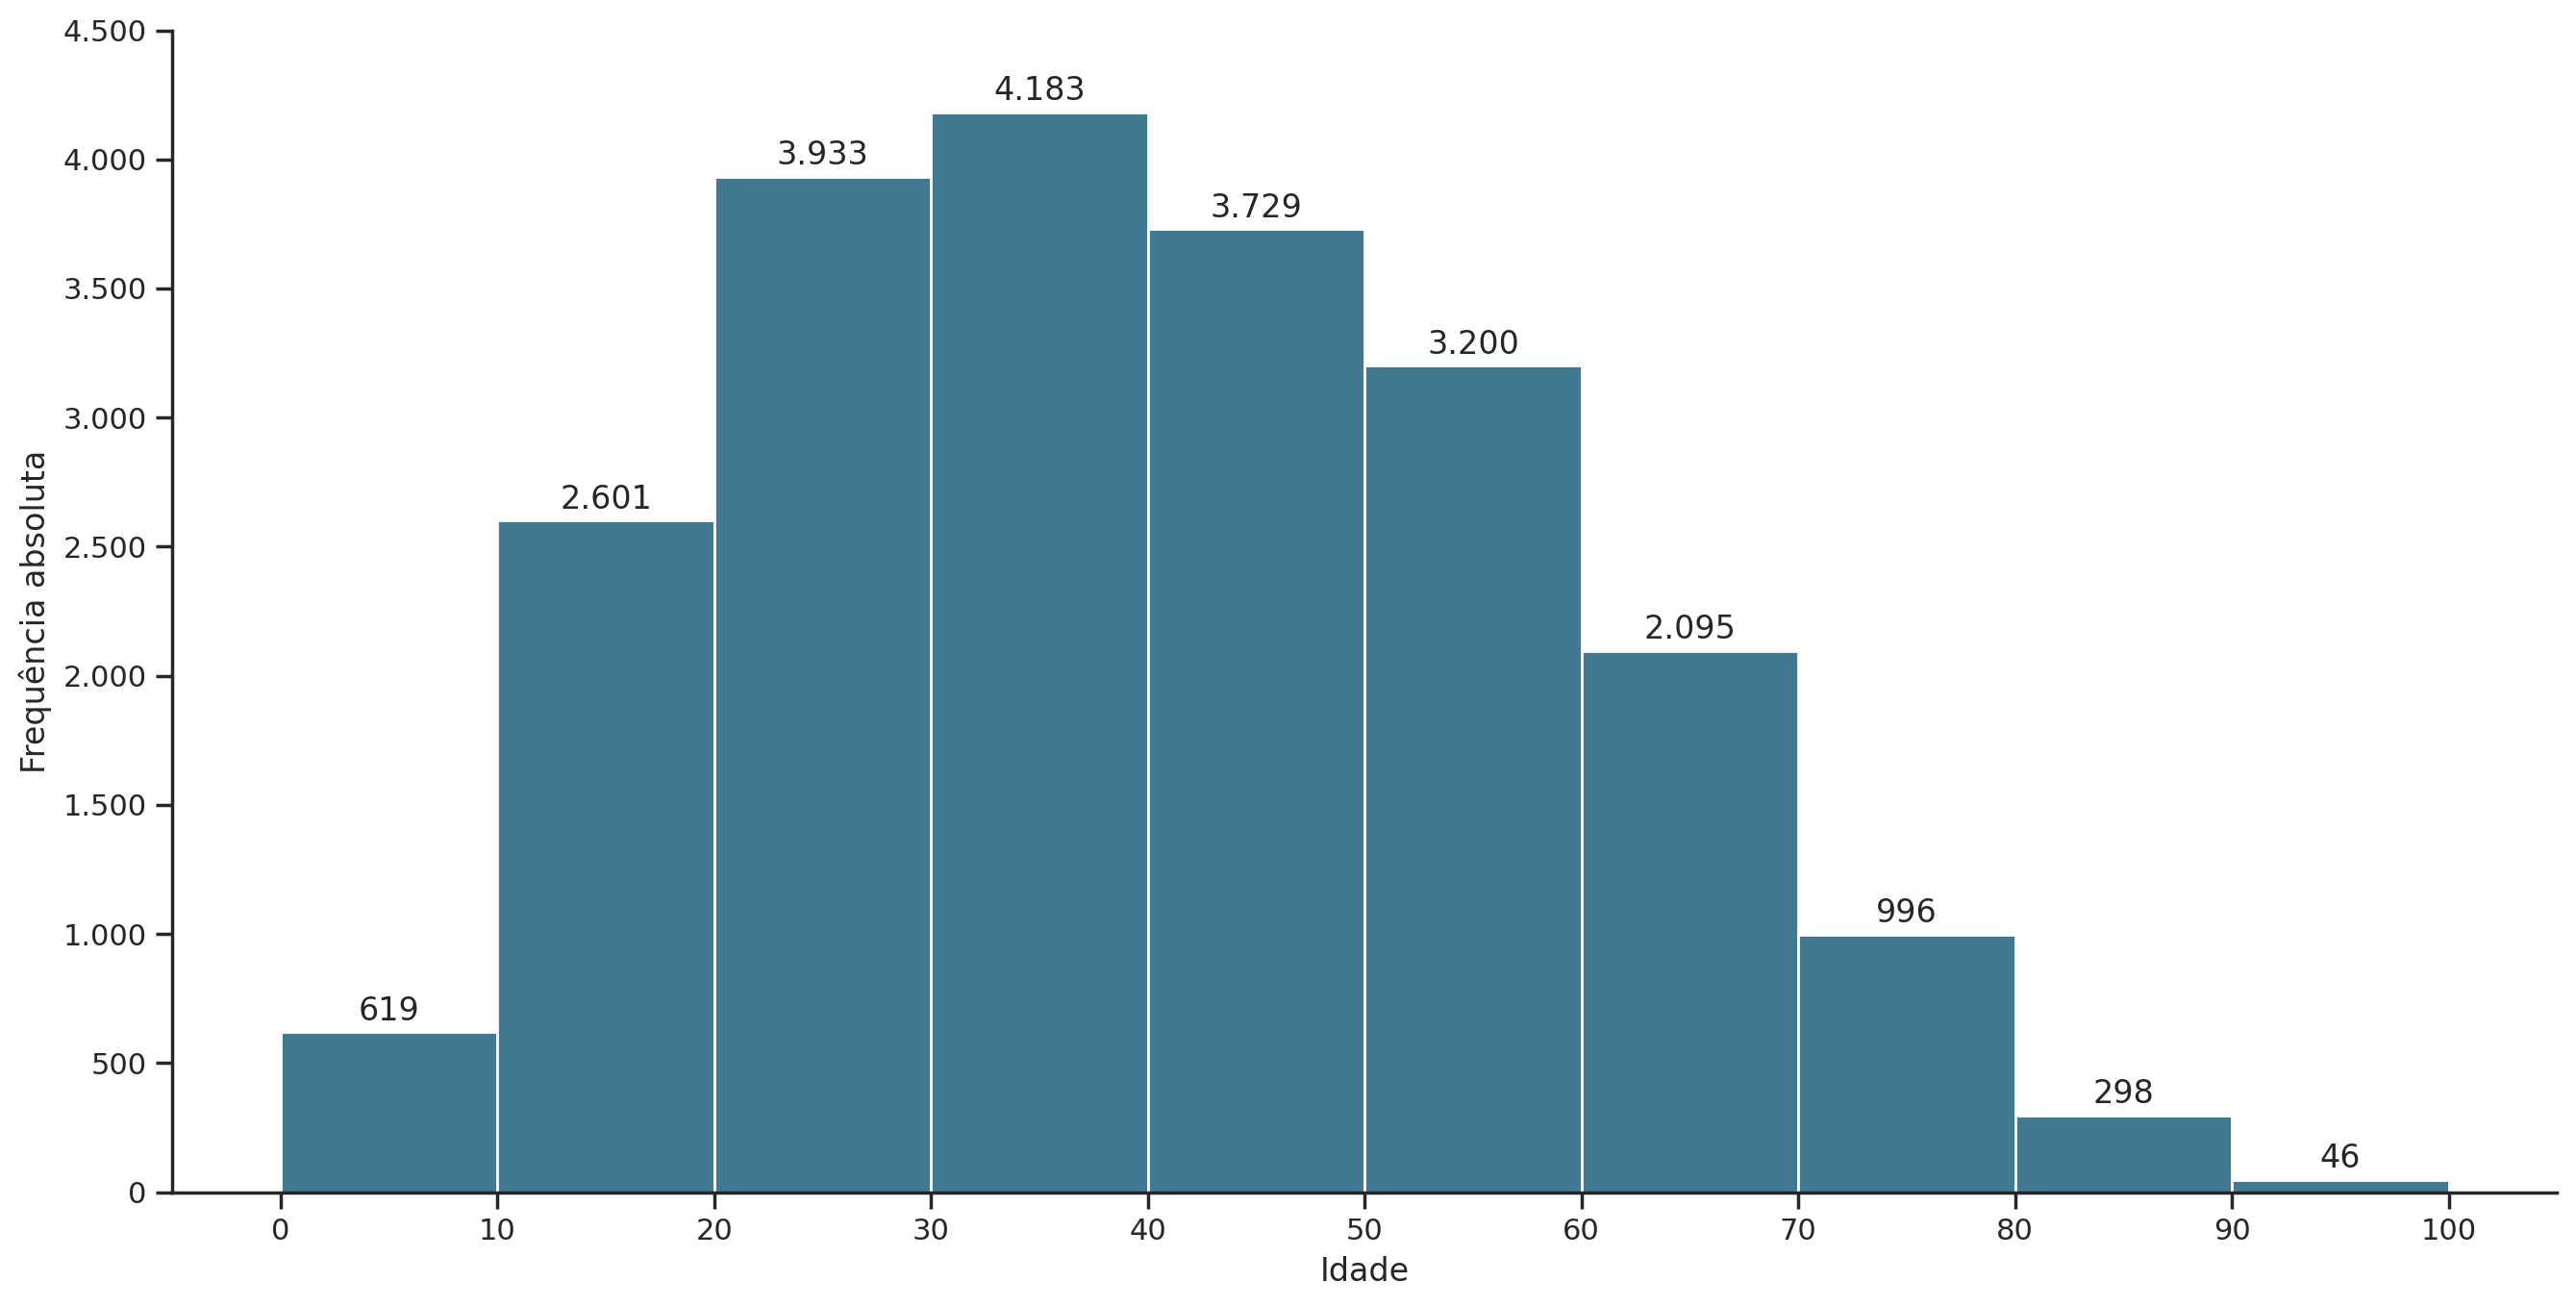

In [48]:
idade = pd.DataFrame(database['NU_IDADE_N'])
plt.figure(figsize=(16,8))
ax = sns.histplot(data=idade,bins=10, binrange=(0, 100), legend=False, palette=["#004c6d"],)
ax.set(
    xlabel='Idade', 
    ylabel='Frequência absoluta',
    ylim=(0,4500),
    xticks=list(range(0, 101, 10))
)
sns.despine()
for p in ax.patches:
    ax.annotate(format_number(p.get_height(), 'pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
ax.plot()

## Atributo Escolaridade

[]

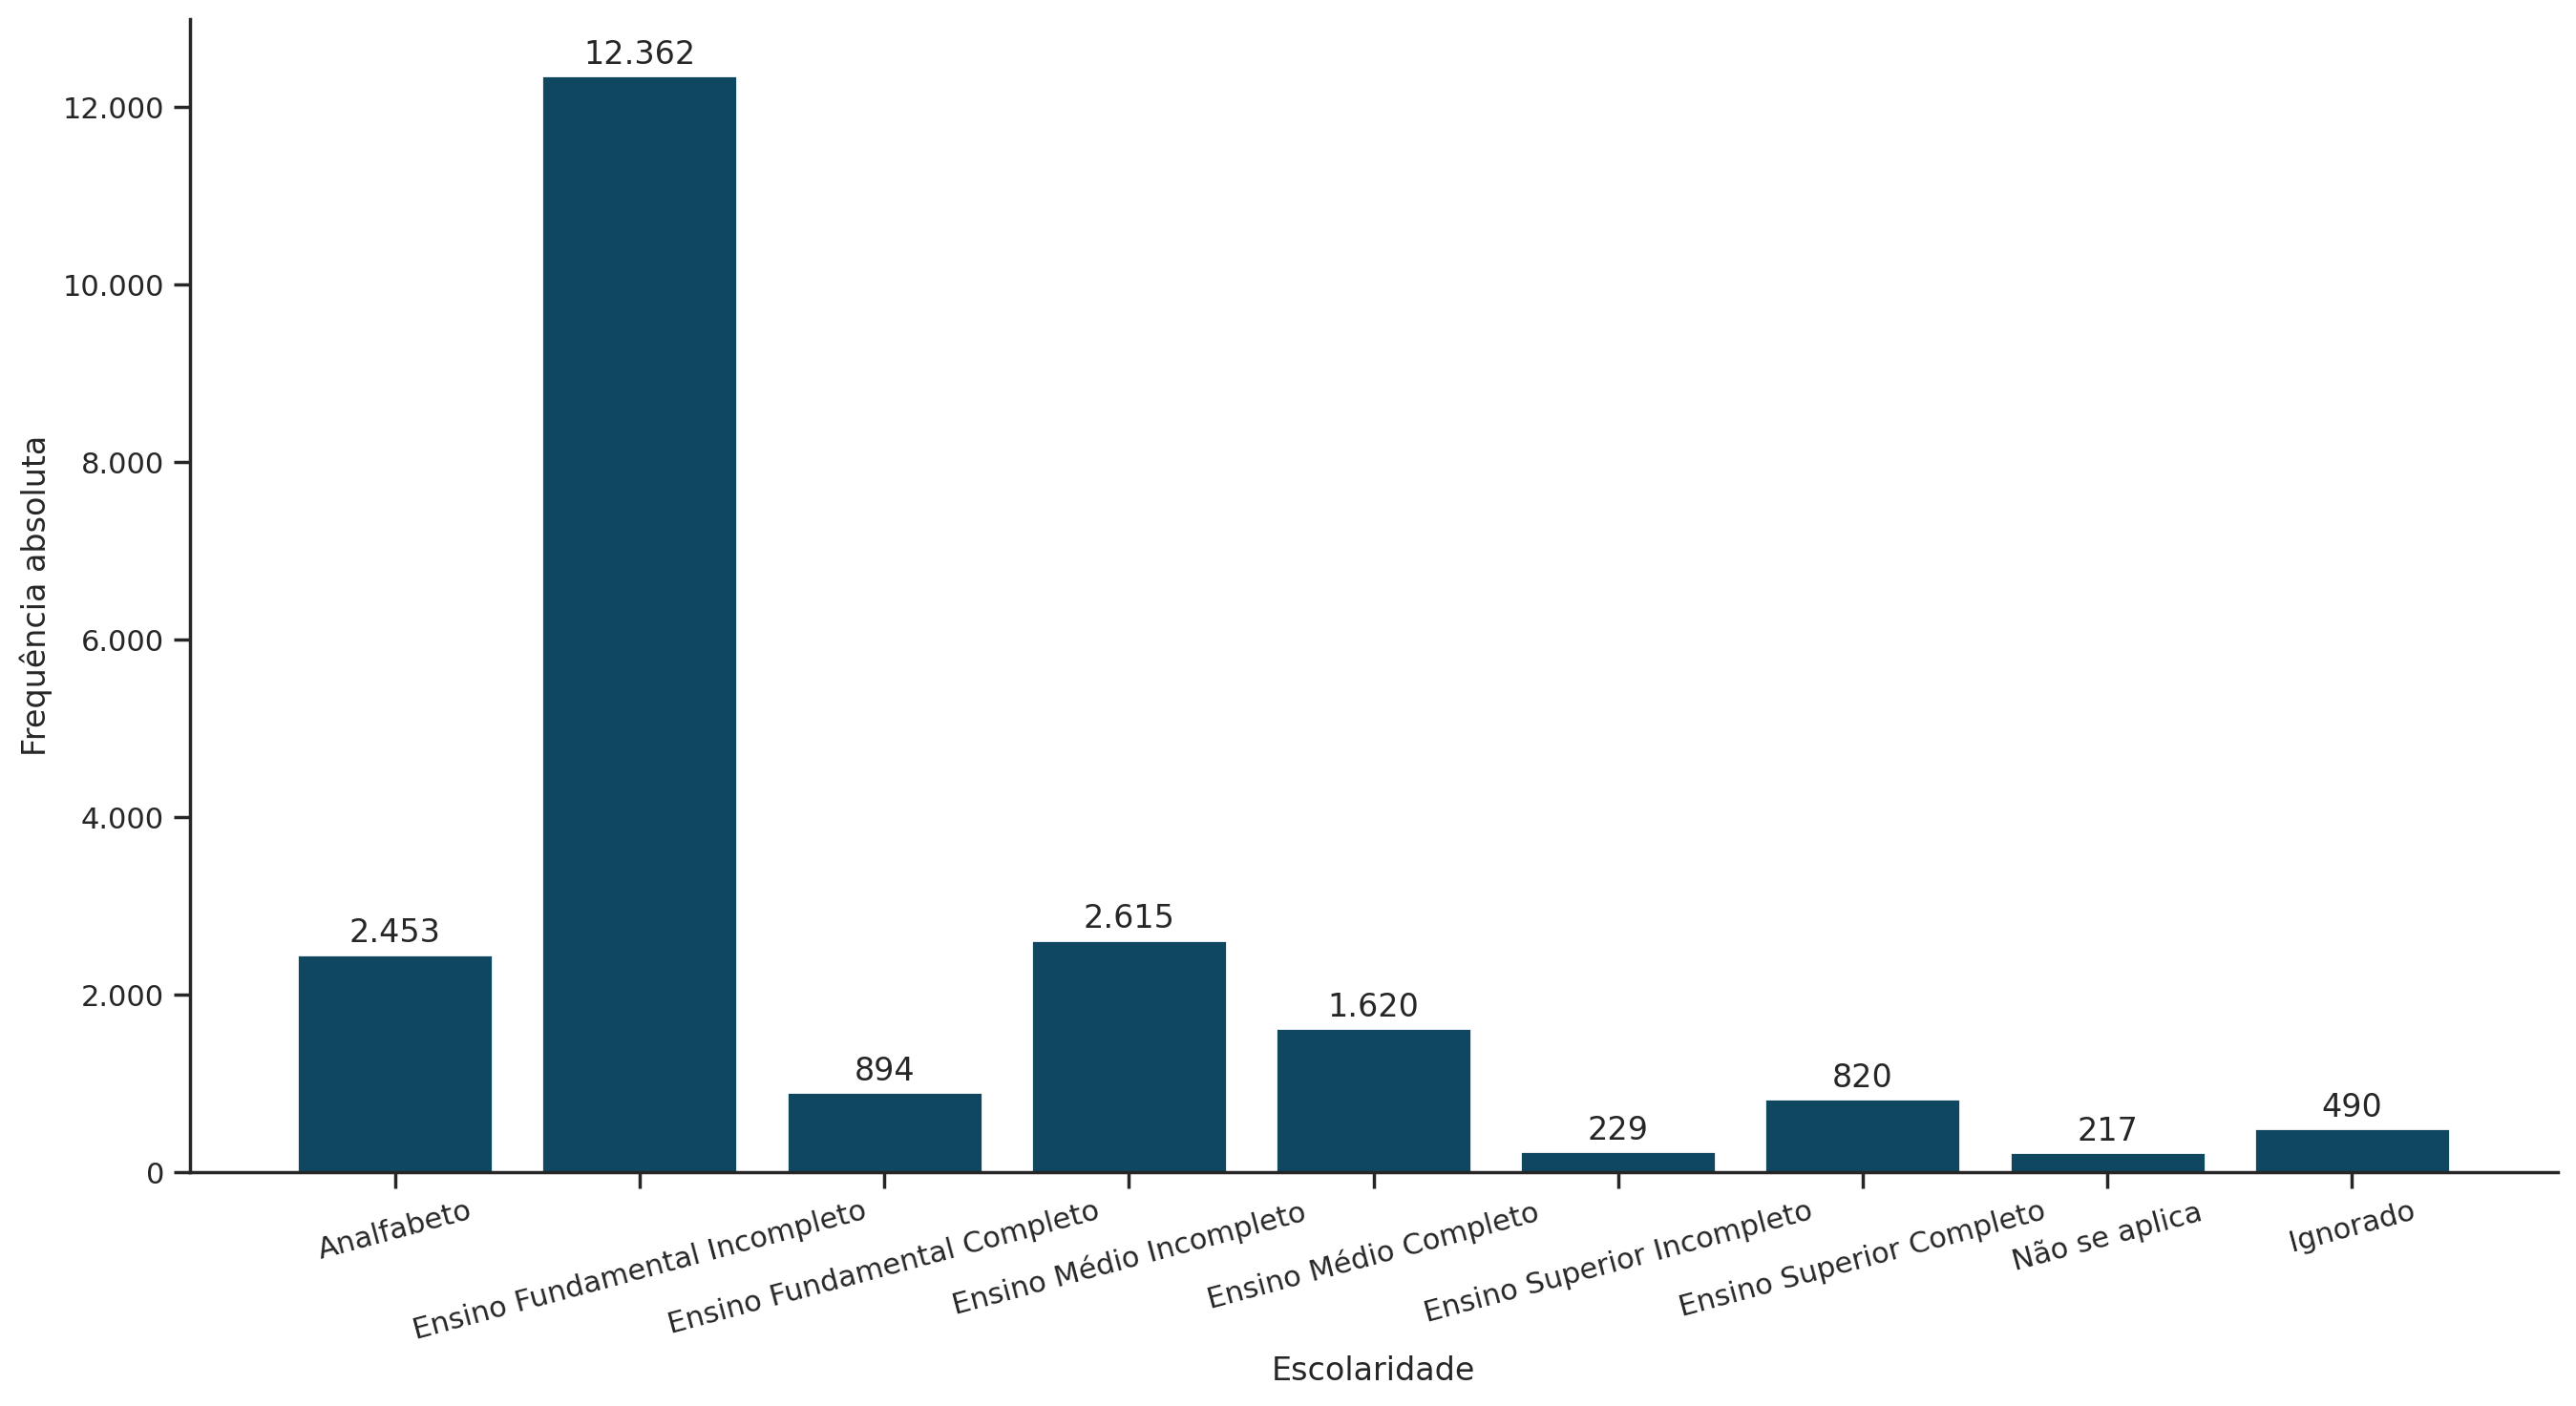

In [59]:
escolaridade = database['CS_ESCOL_N'].value_counts(dropna=False).sort_index()
data = {
    'labels': escolaridade.keys().to_list(),
    'values': escolaridade.values,
}
labels = [
    'Analfabeto',
    'Ensino Fundamental Incompleto', 
    'Ensino Fundamental Completo',
    'Ensino Médio Incompleto', 
    'Ensino Médio Completo',
    'Ensino Superior Incompleto',
    'Ensino Superior Completo',
    'Não se aplica',
    'Ignorado'
]
df = pd.DataFrame(data={'labels': data['labels'], 'values': data['values']})
plt.figure(figsize=(16,8))
ax = sns.barplot(
    x='labels', 
    y='values', 
    data=df, 
    order=labels, 
    palette=["#004c6d"]
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, horizontalalignment='center')
sns.despine()
ax.set(
    xlabel='Escolaridade', 
    ylabel='Frequência absoluta'
)
ax.set_ylim(0, 13000)
for p in ax.patches:
    ax.annotate(format_number(p.get_height(), 'pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
ax.plot()

## Atributo Modo de Entrada

[]

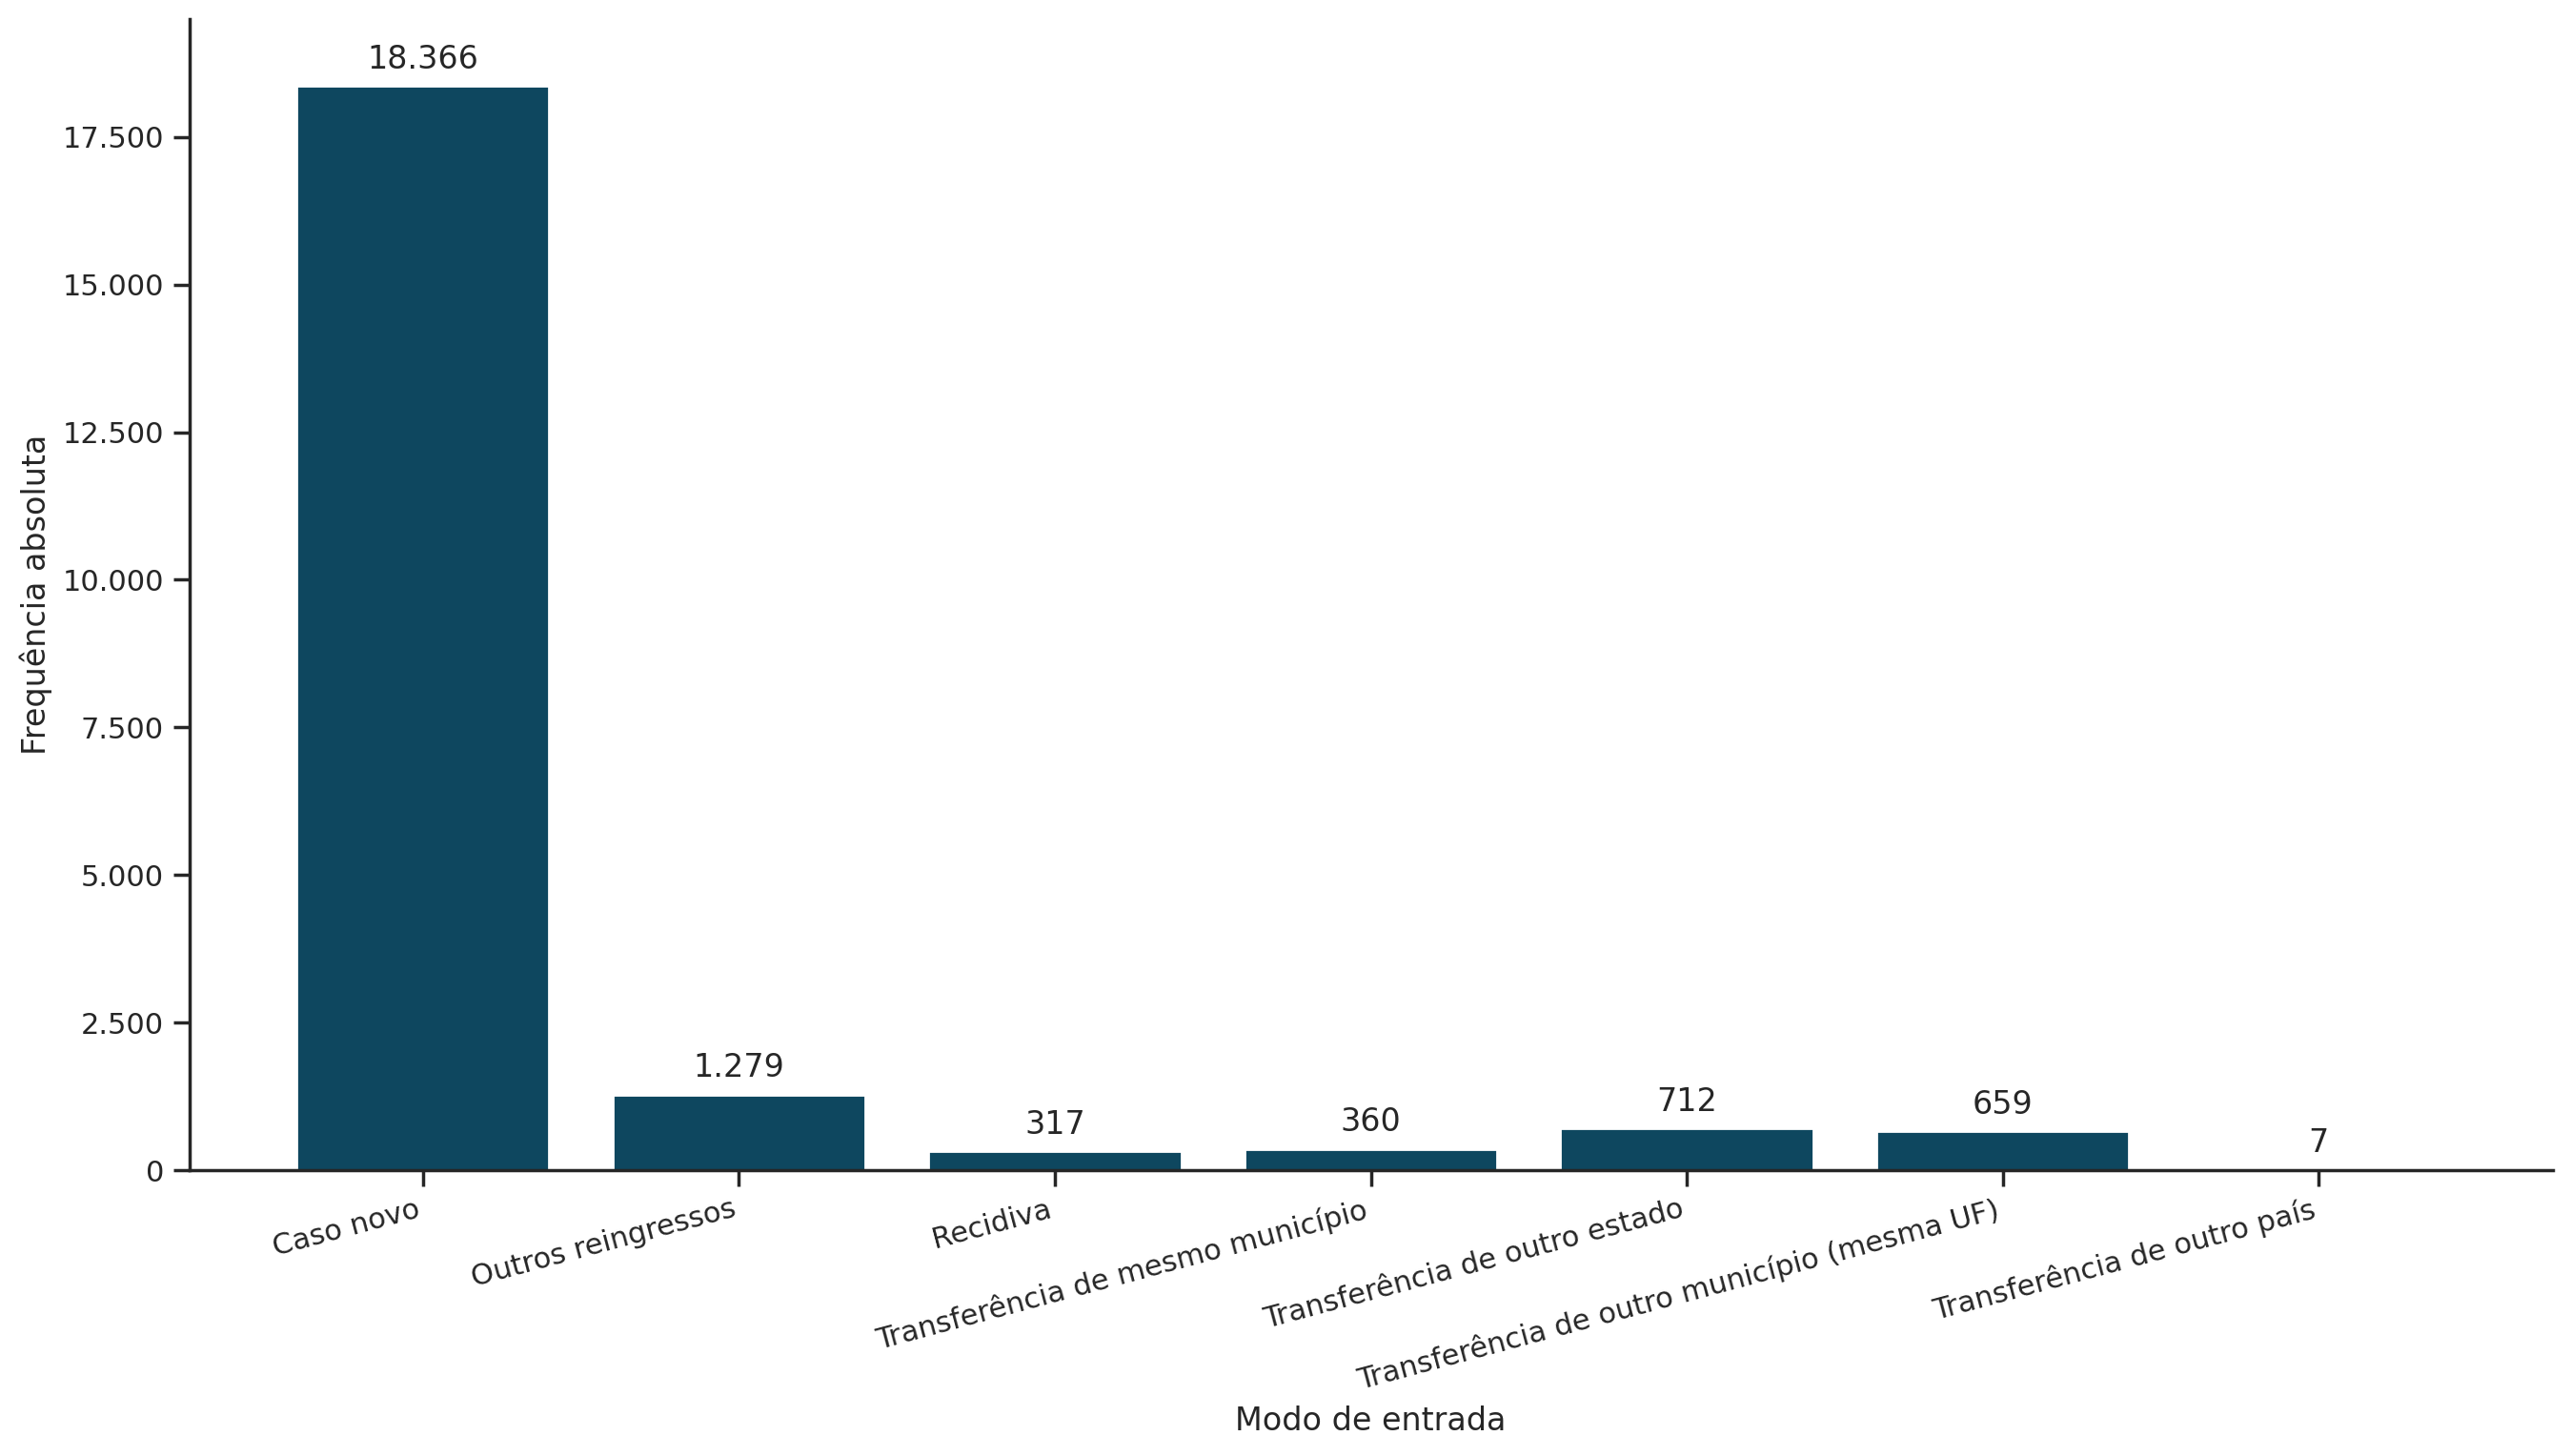

In [63]:
modo_entrada = database['MODOENTR'].value_counts(dropna=False).sort_index()
data = {
    'labels': modo_entrada.keys().tolist(),
    'values': modo_entrada.values,
}
df = pd.DataFrame(data=data)
plt.figure(figsize=(16,8))
ax = sns.barplot(x='labels', y='values', data=df, palette=["#004c6d"])
sns.despine()
ax.set(
    xlabel='Modo de entrada', 
    ylabel='Frequência absoluta', 
    title=''
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, horizontalalignment='right')
ax.set_ylim(0, 19500);
for p in ax.patches:
    ax.annotate(format_number(p.get_height(), 'pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
ax.plot()

## Atributo Município da Residência do Paciente

[]

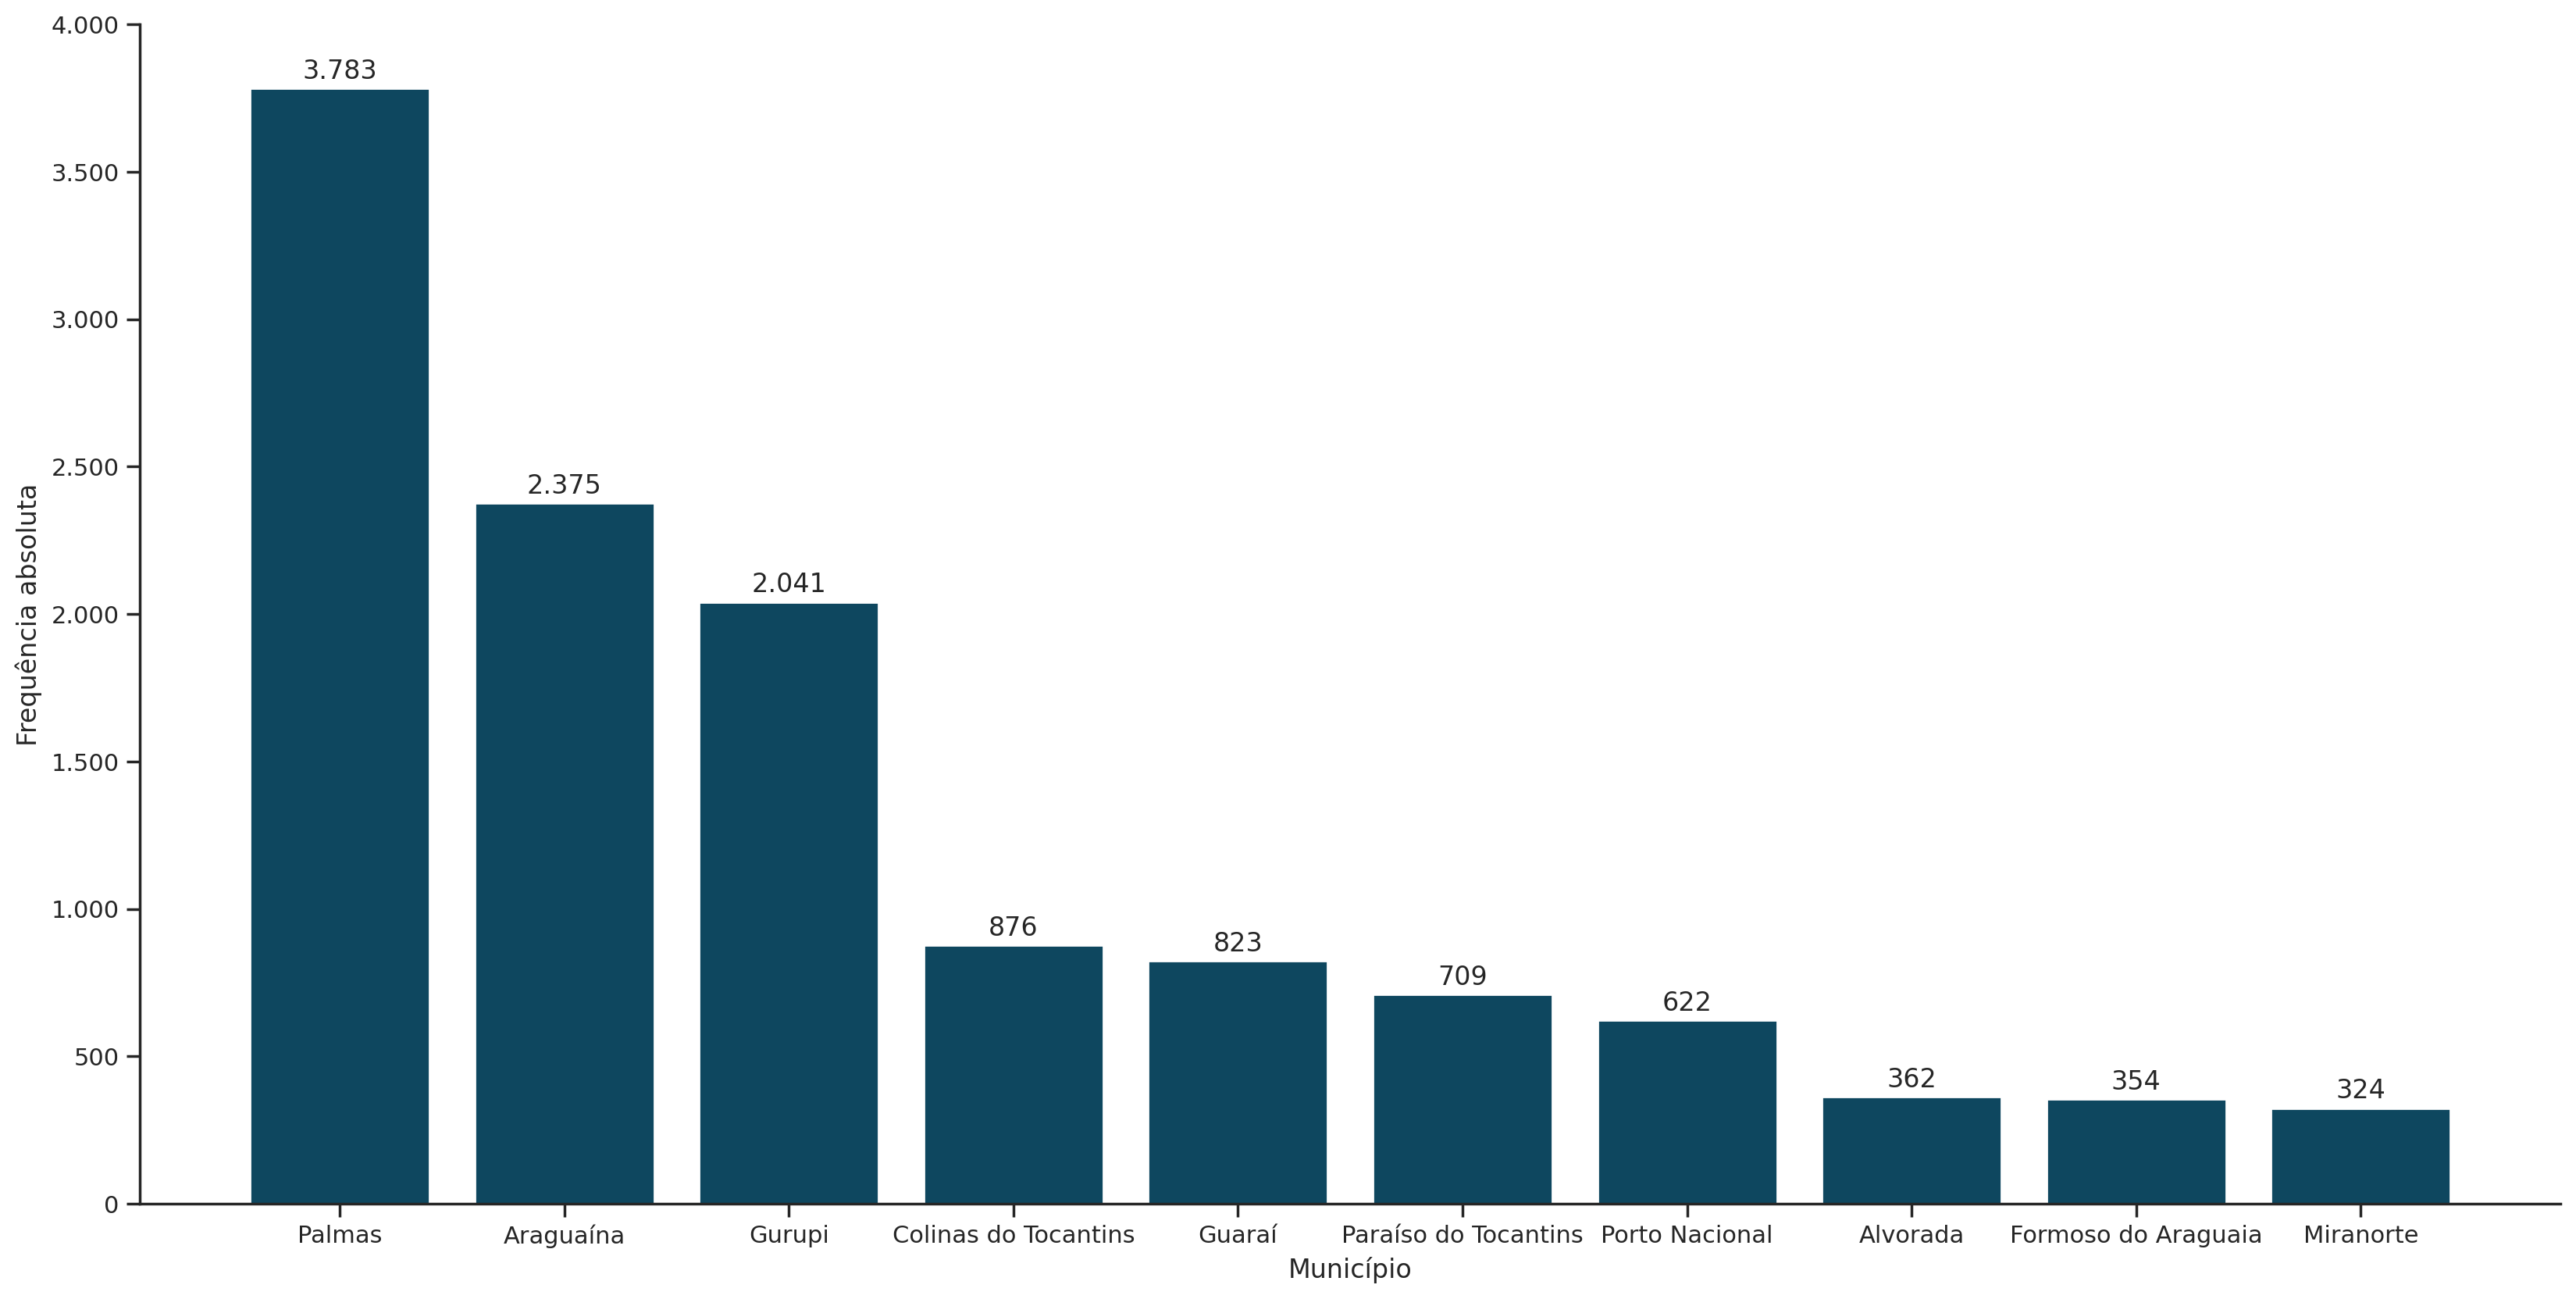

In [90]:
dict_municipios = {}
 
for index, row in municipios_tocantins.iterrows():
    dict_municipios[float(str(row['ibge_code'])[0:-1])] = row['name']

database['ID_MN_RESI'].replace(dict_municipios, inplace=True)
municipio_residencia = database['ID_MN_RESI'].value_counts(dropna=False).sort_values(ascending=False)
municipio_residencia = municipio_residencia.nlargest(n=10)
labels = municipio_residencia.keys()
values = municipio_residencia.values
df = pd.DataFrame(data={'labels': labels, 'values': values})
plt.figure(figsize=(20,10))
ax = sns.barplot(
    x='labels', 
    y='values', 
    data=df, 
    palette=["#004c6d"]
)
sns.despine()
ax.set(
    xlabel='Município', 
    ylabel='Frequência absoluta', 
    title='')
ax.set_ylim(0, 4000)
for p in ax.patches:
    ax.annotate(format_number(p.get_height(), 'pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
ax.plot()

## Atributo Zona

[]

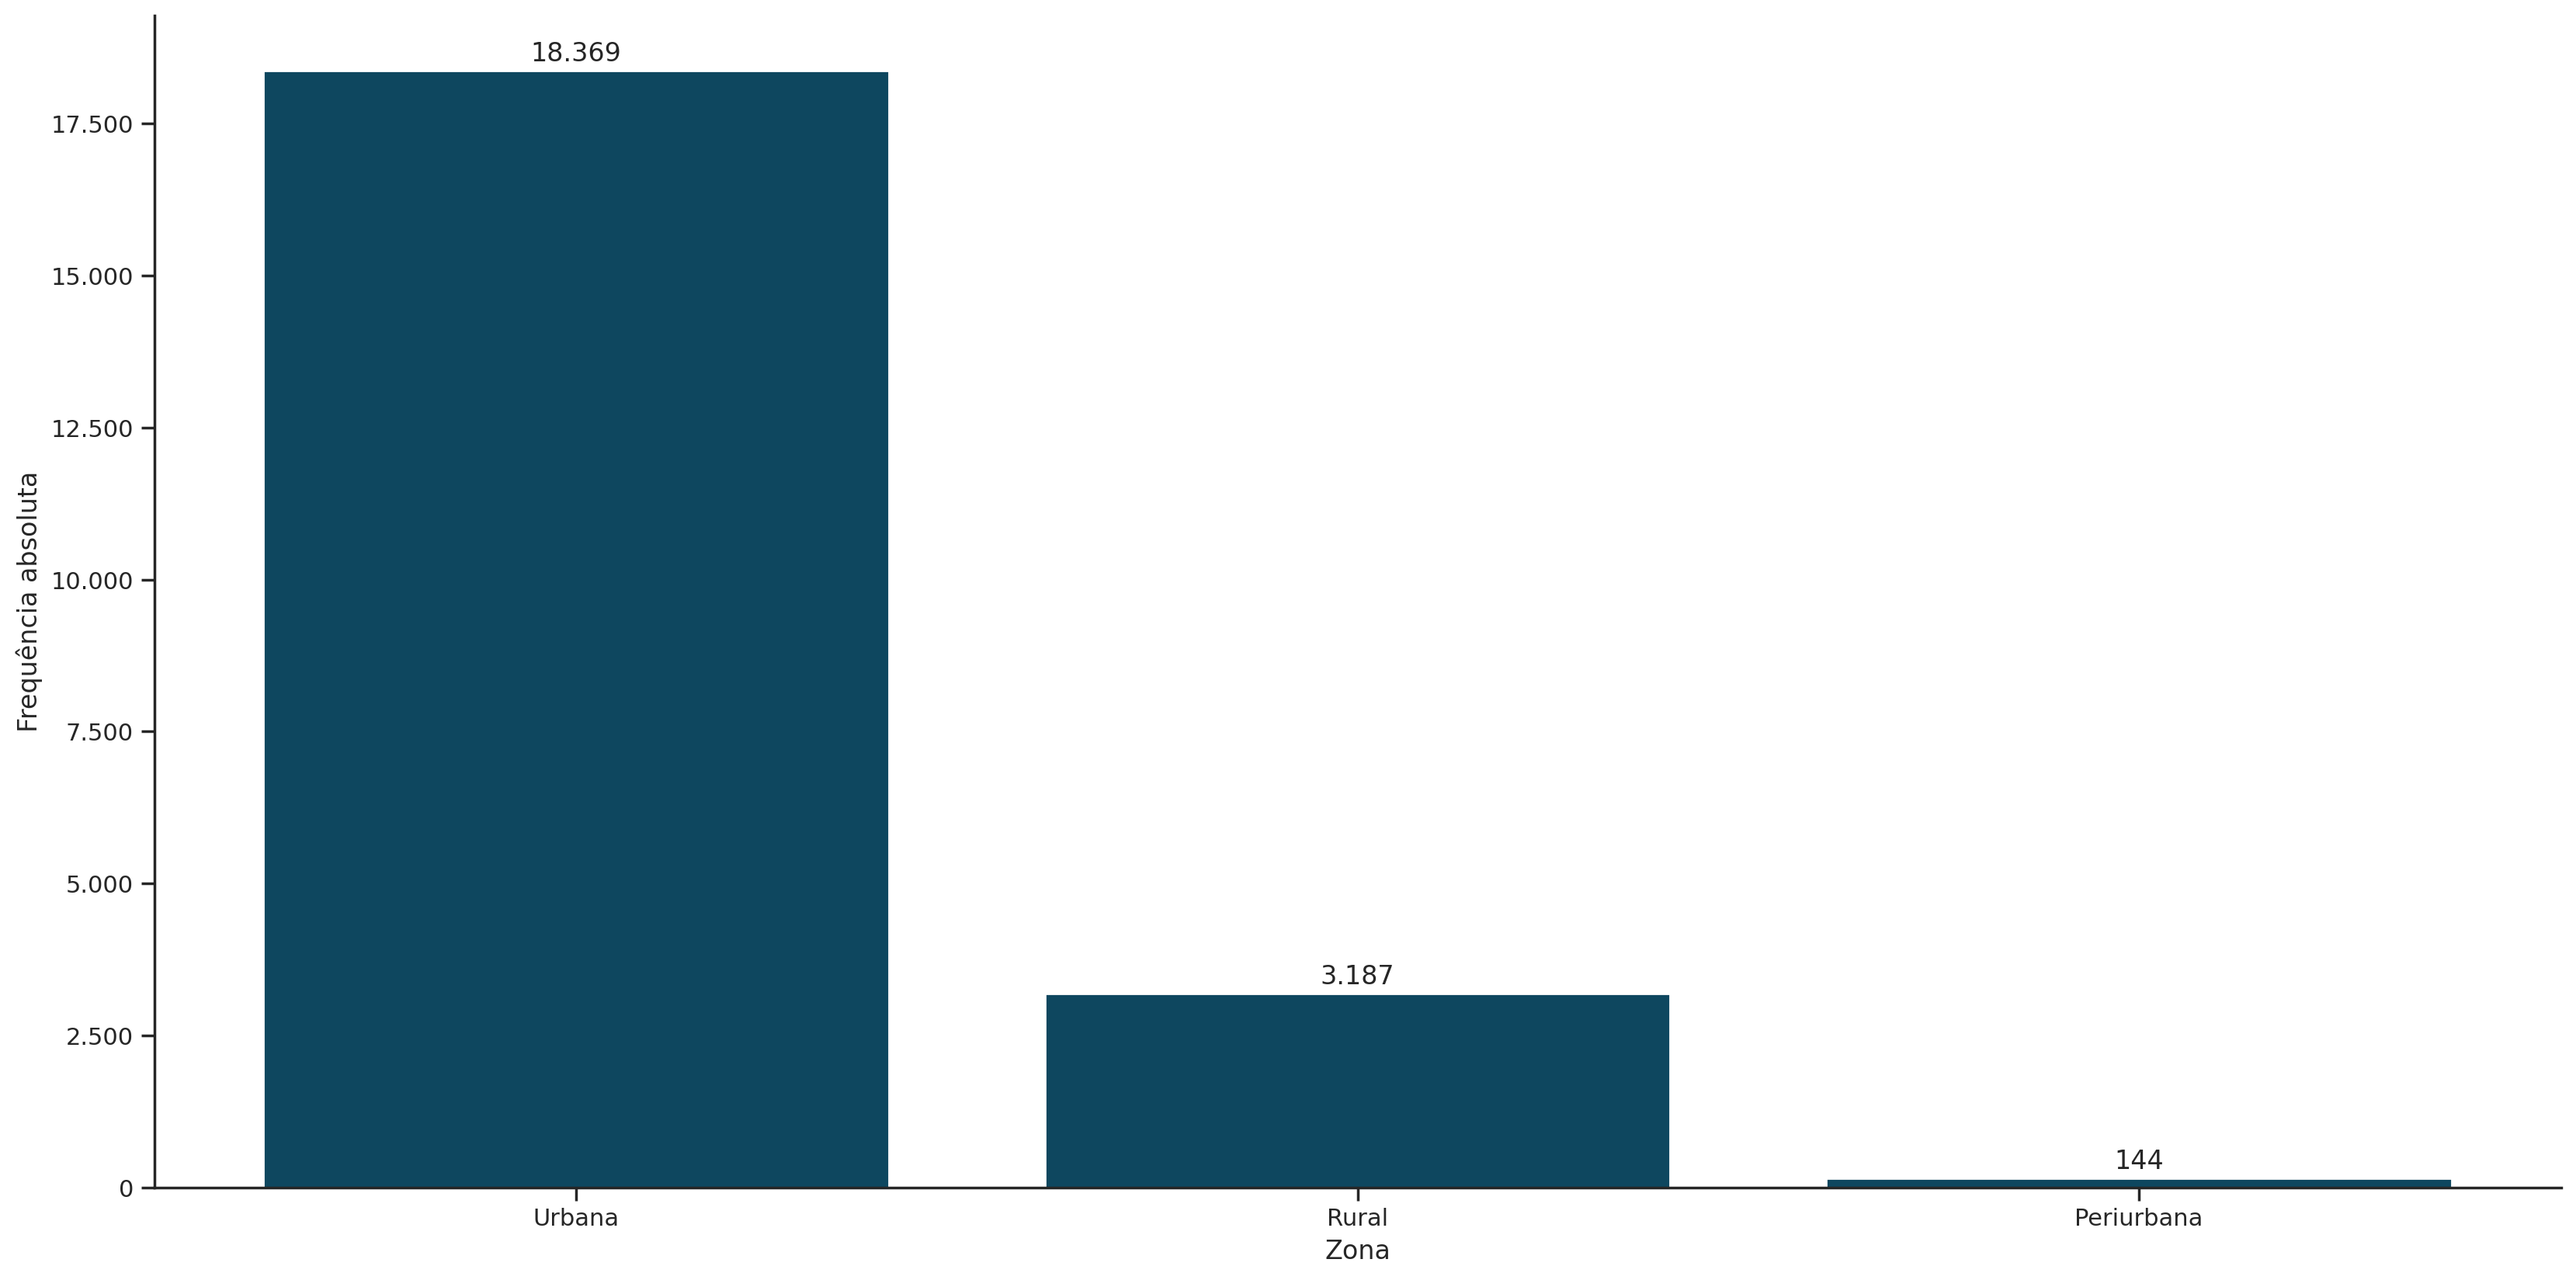

In [91]:
zona = database['CS_ZONA'].value_counts(dropna=False).sort_values(ascending=False)
labels = zona.keys()
values = zona.values
df = pd.DataFrame(data={'labels': labels, 'values': values})

plt.figure(figsize=(20,10))
ax = sns.barplot(x='labels', y='values', data=df, palette=["#004c6d"])
sns.despine()
ax.set(xlabel='Zona', ylabel='Frequência absoluta', title='')
#ax.set_ylim(0, 4000)
for p in ax.patches:
    ax.annotate(format_number(p.get_height(), 'pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
ax.plot() 

## Modo de Saída

[]

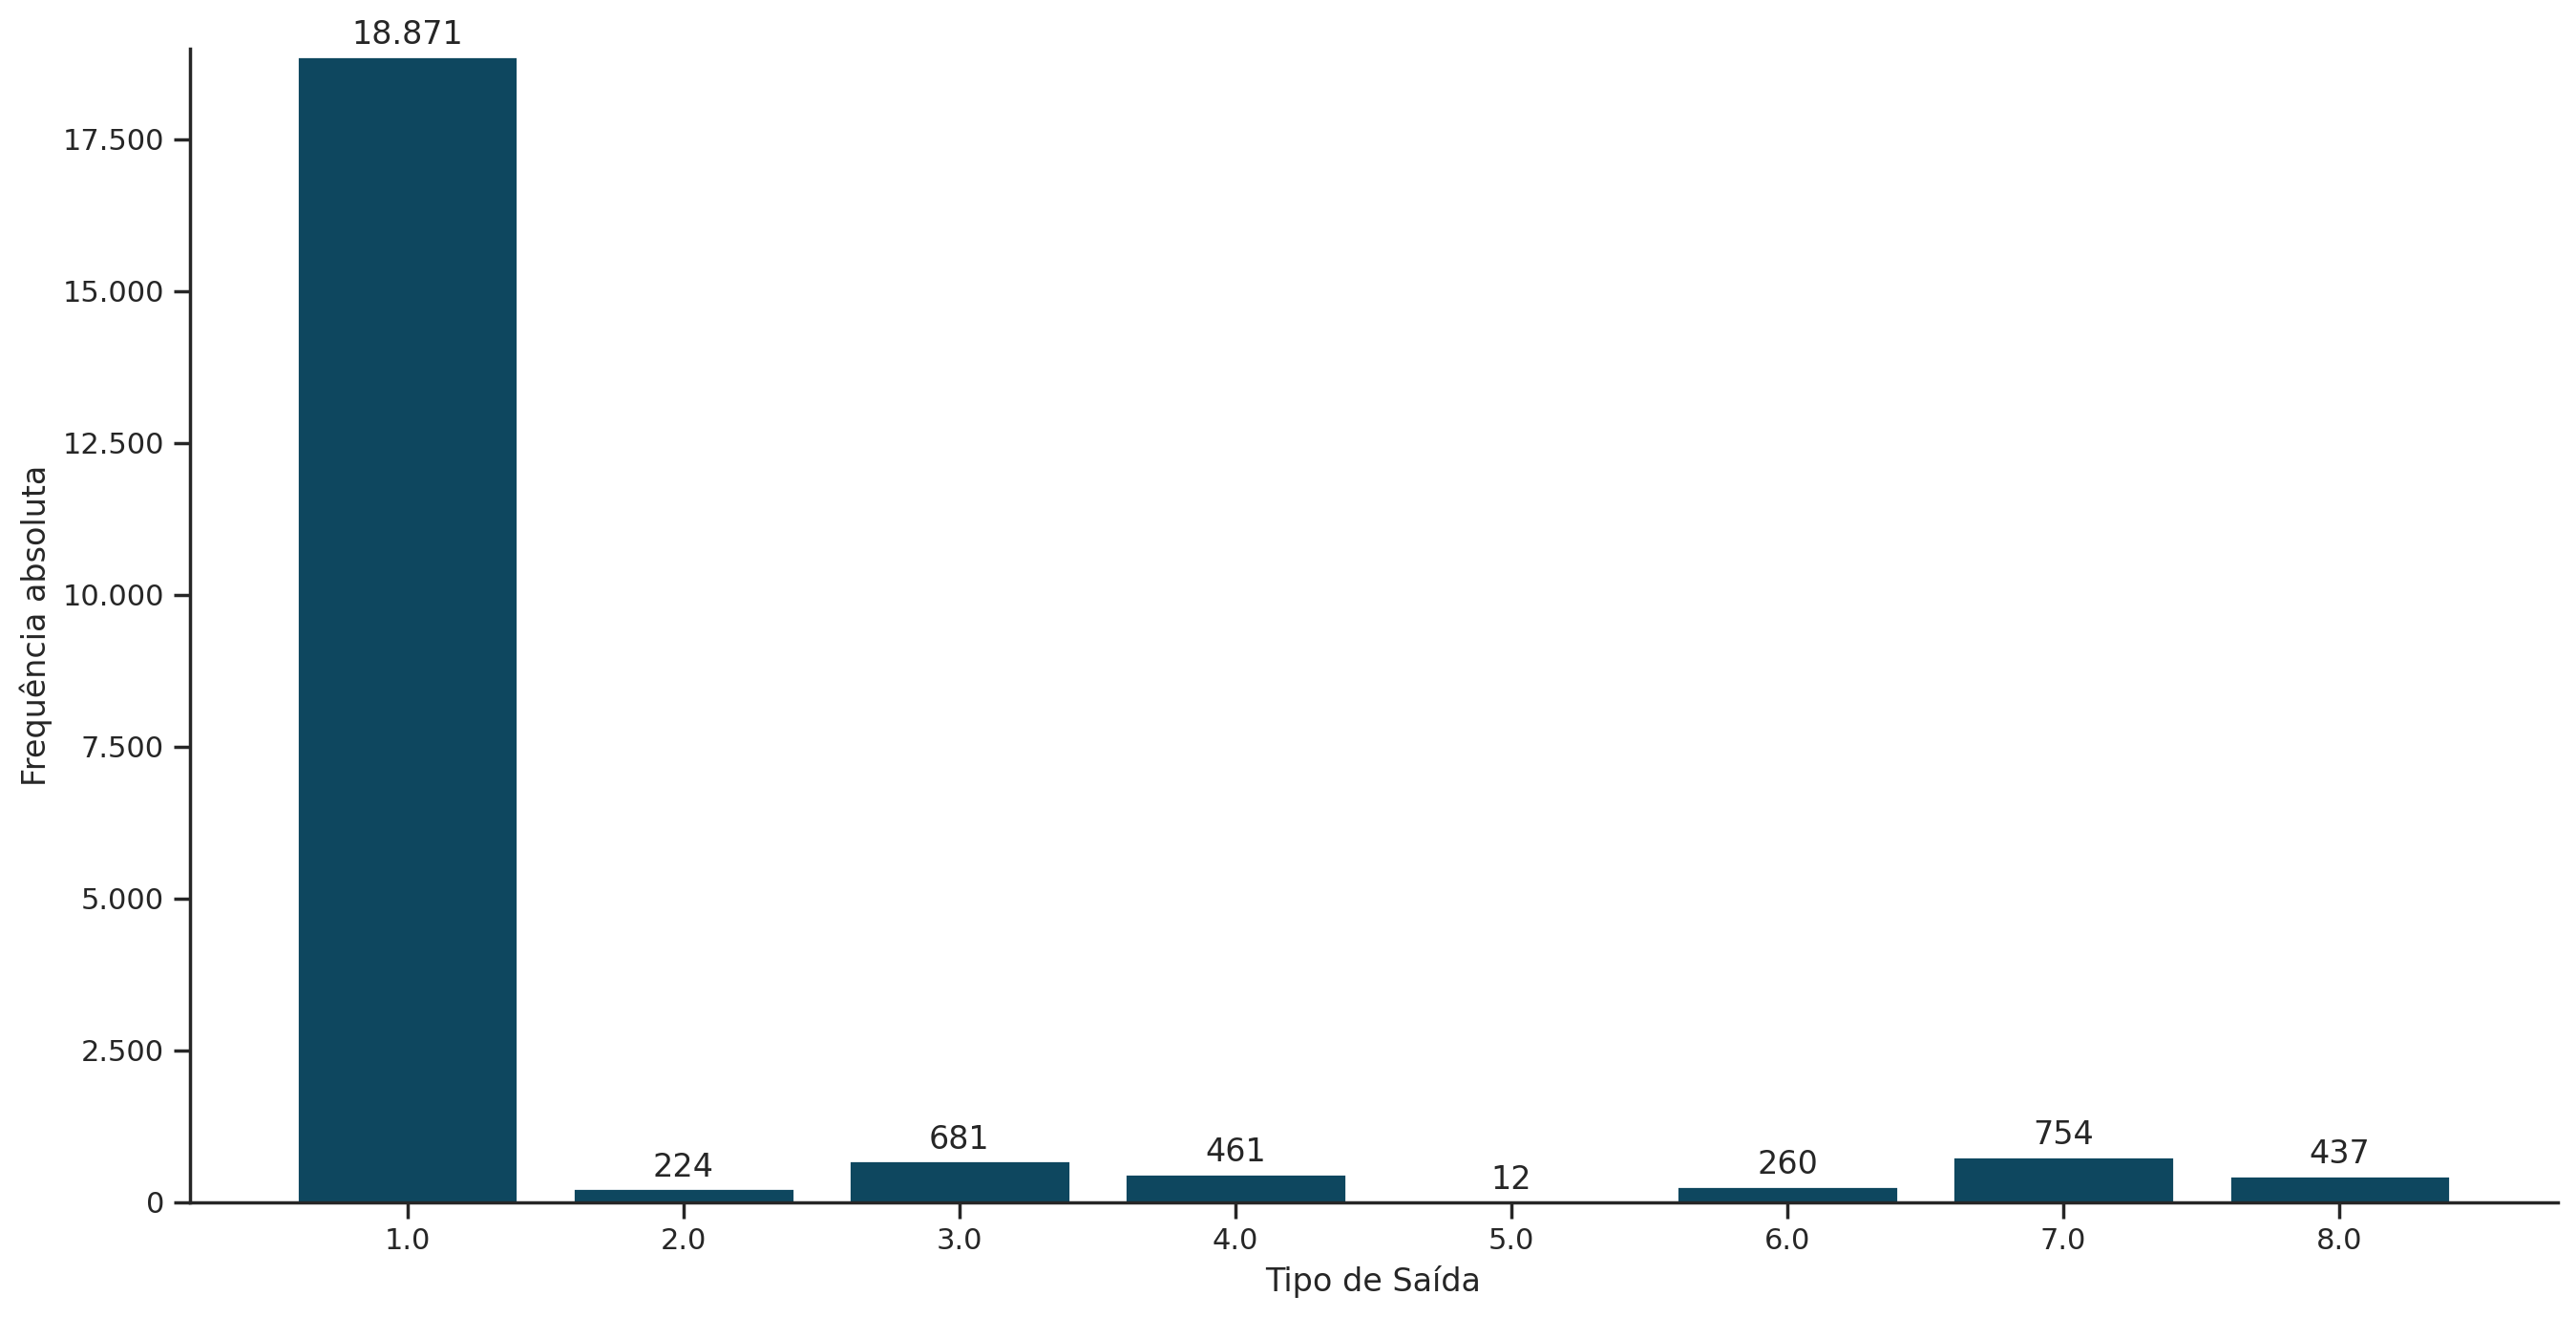

In [64]:
tipo_de_saida = database['TPALTA_N'].value_counts(dropna=False).sort_index()
data = {
    'labels': tipo_de_saida.keys().tolist(),
    'values': tipo_de_saida.values
}
df = pd.DataFrame(data=data)
plt.figure(figsize=(16,8))
ax = sns.barplot(x='labels', y='values', data=df, palette=["#004c6d"])
sns.despine()
ax.set(xlabel='Tipo de Saída', ylabel='Frequência absoluta', title='')
ax.set_ylim(0, 19000)
for p in ax.patches:
    ax.annotate(format_number(p.get_height(), 'pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
ax.plot()

## Número de lesões

[-2.  0.  2.  4.  6.  8. 10. 12.]


[]

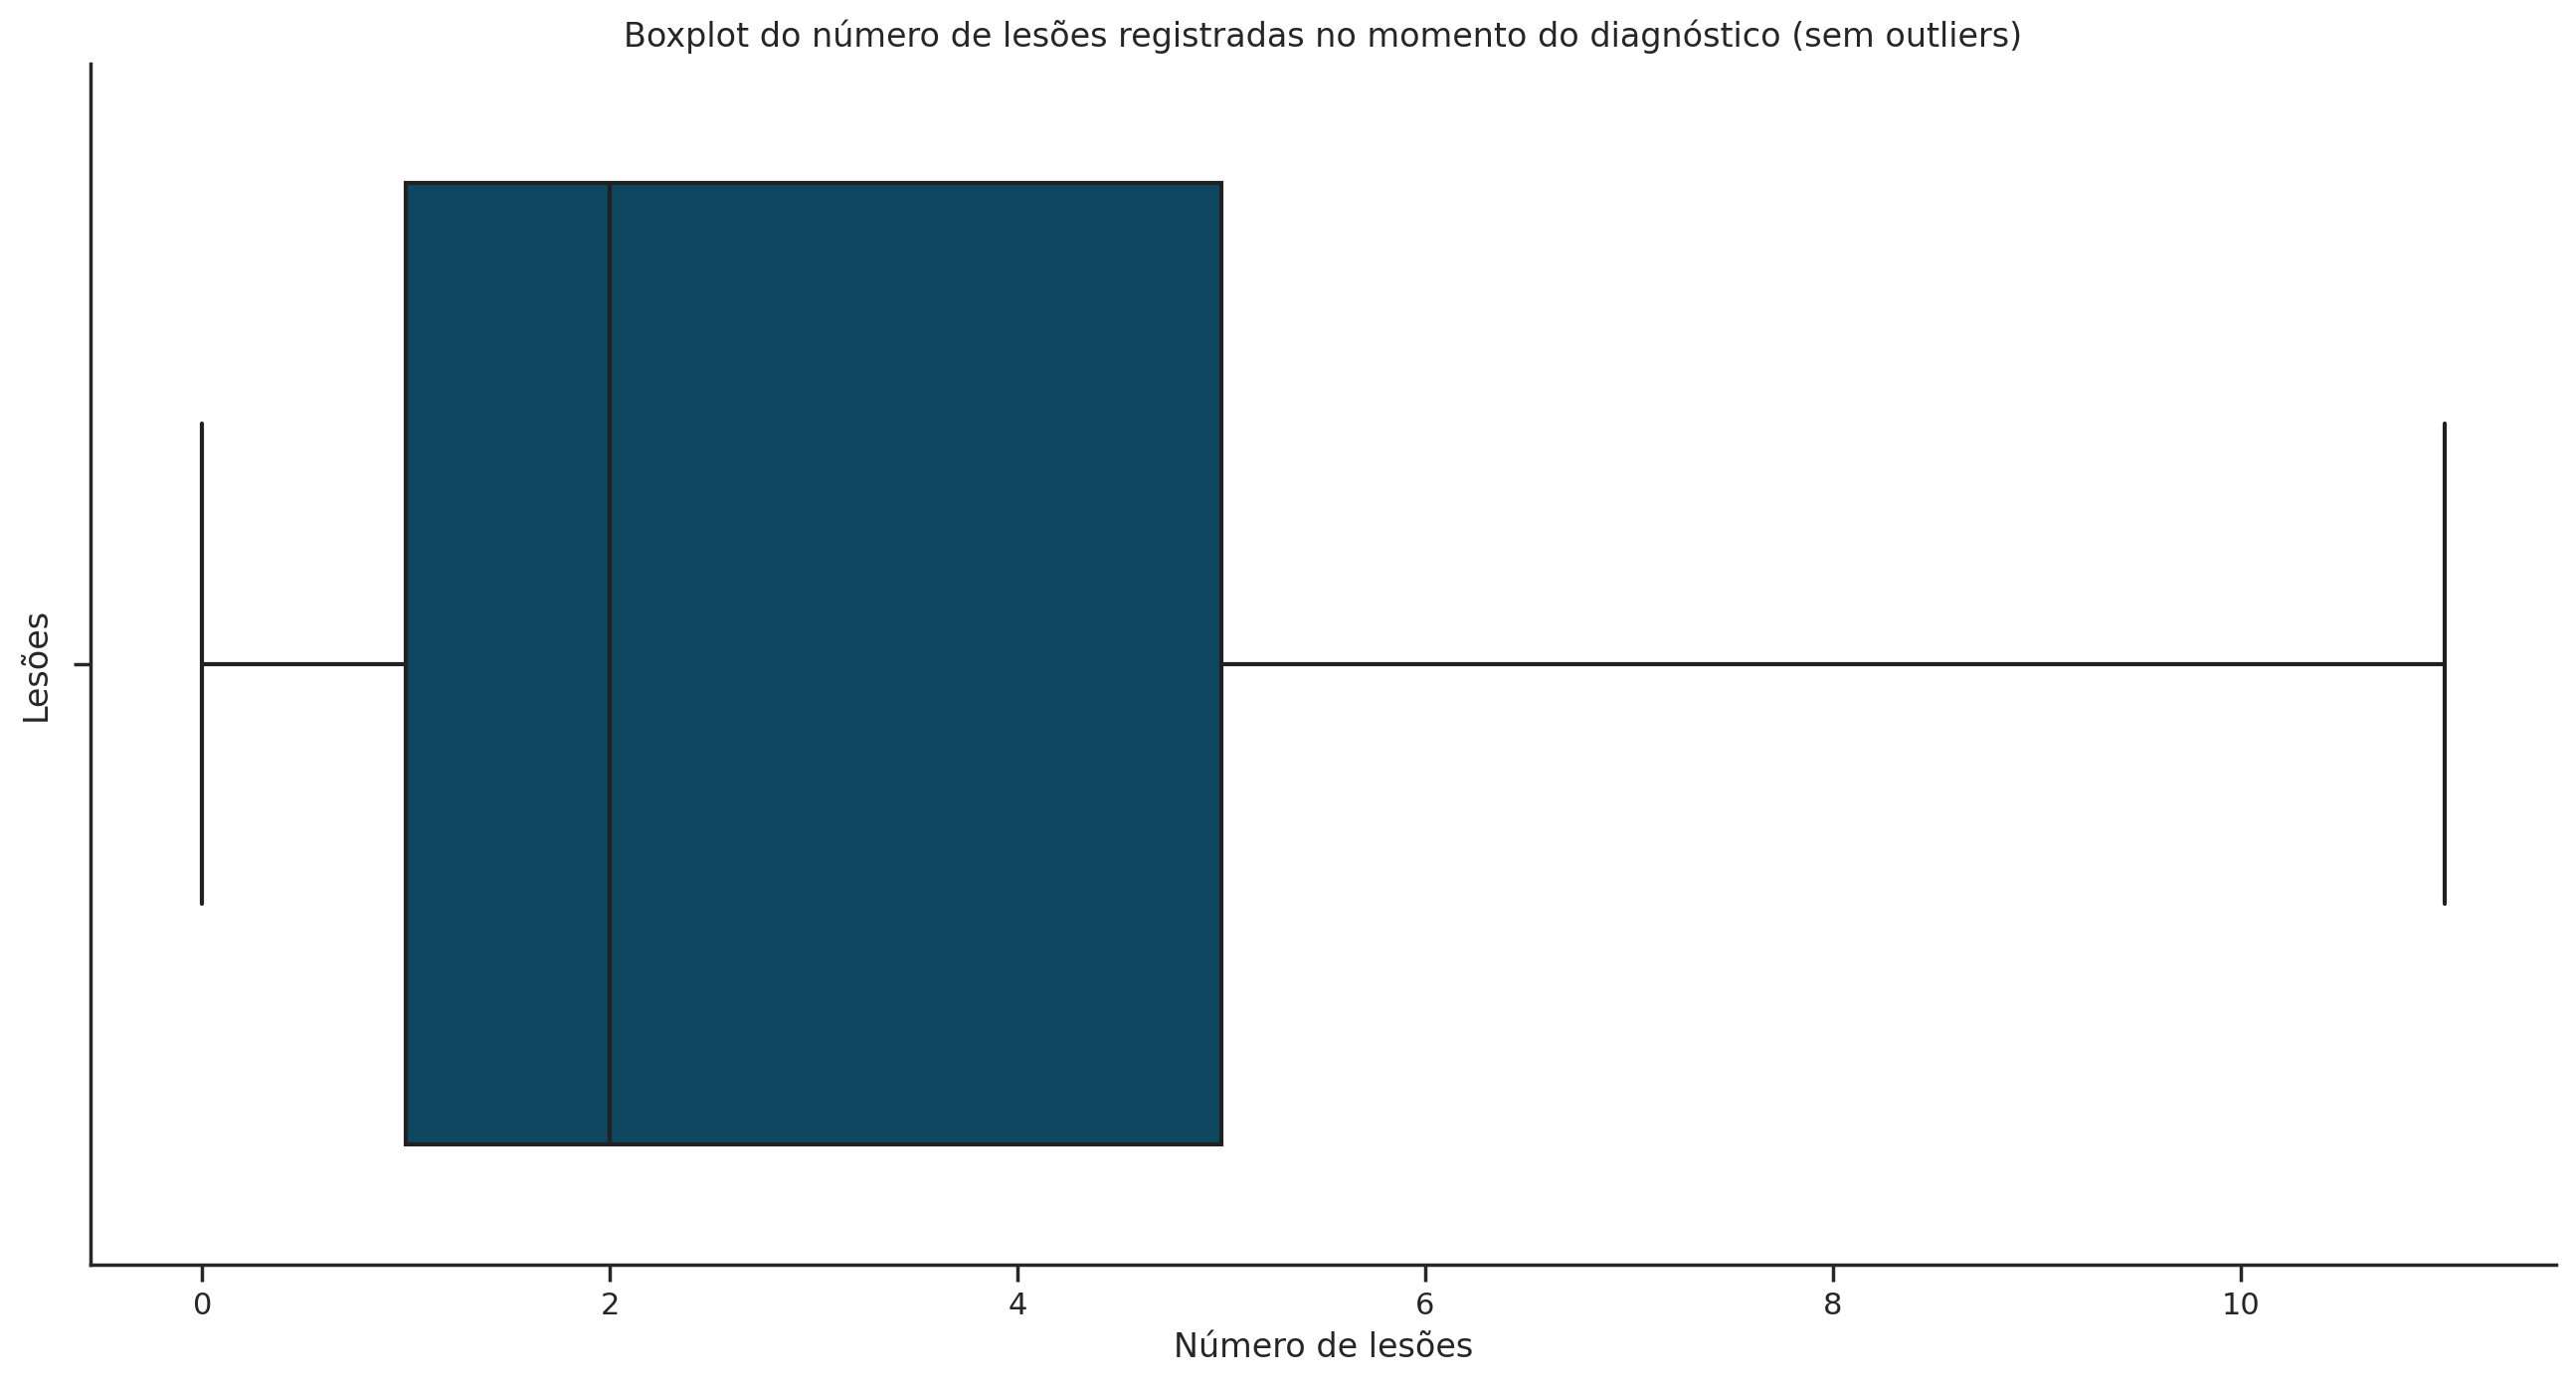

In [26]:
plt.figure(figsize=(16,8))
median = np.median(database['NU_LESOES'])

database[database['NU_LESOES'] > 20 ] = median
ax = sns.boxplot(
    x=database[database['NU_LESOES'] < 12]['NU_LESOES'], 
    palette=["#004c6d"]
)
print(ax.get_xticks())
sns.despine()
ax.set(title='Boxplot do número de lesões registradas no momento do diagnóstico (sem outliers)', xlabel='Número de lesões', ylabel='Lesões')
ax.plot()

### Número de contatos registrados

[]

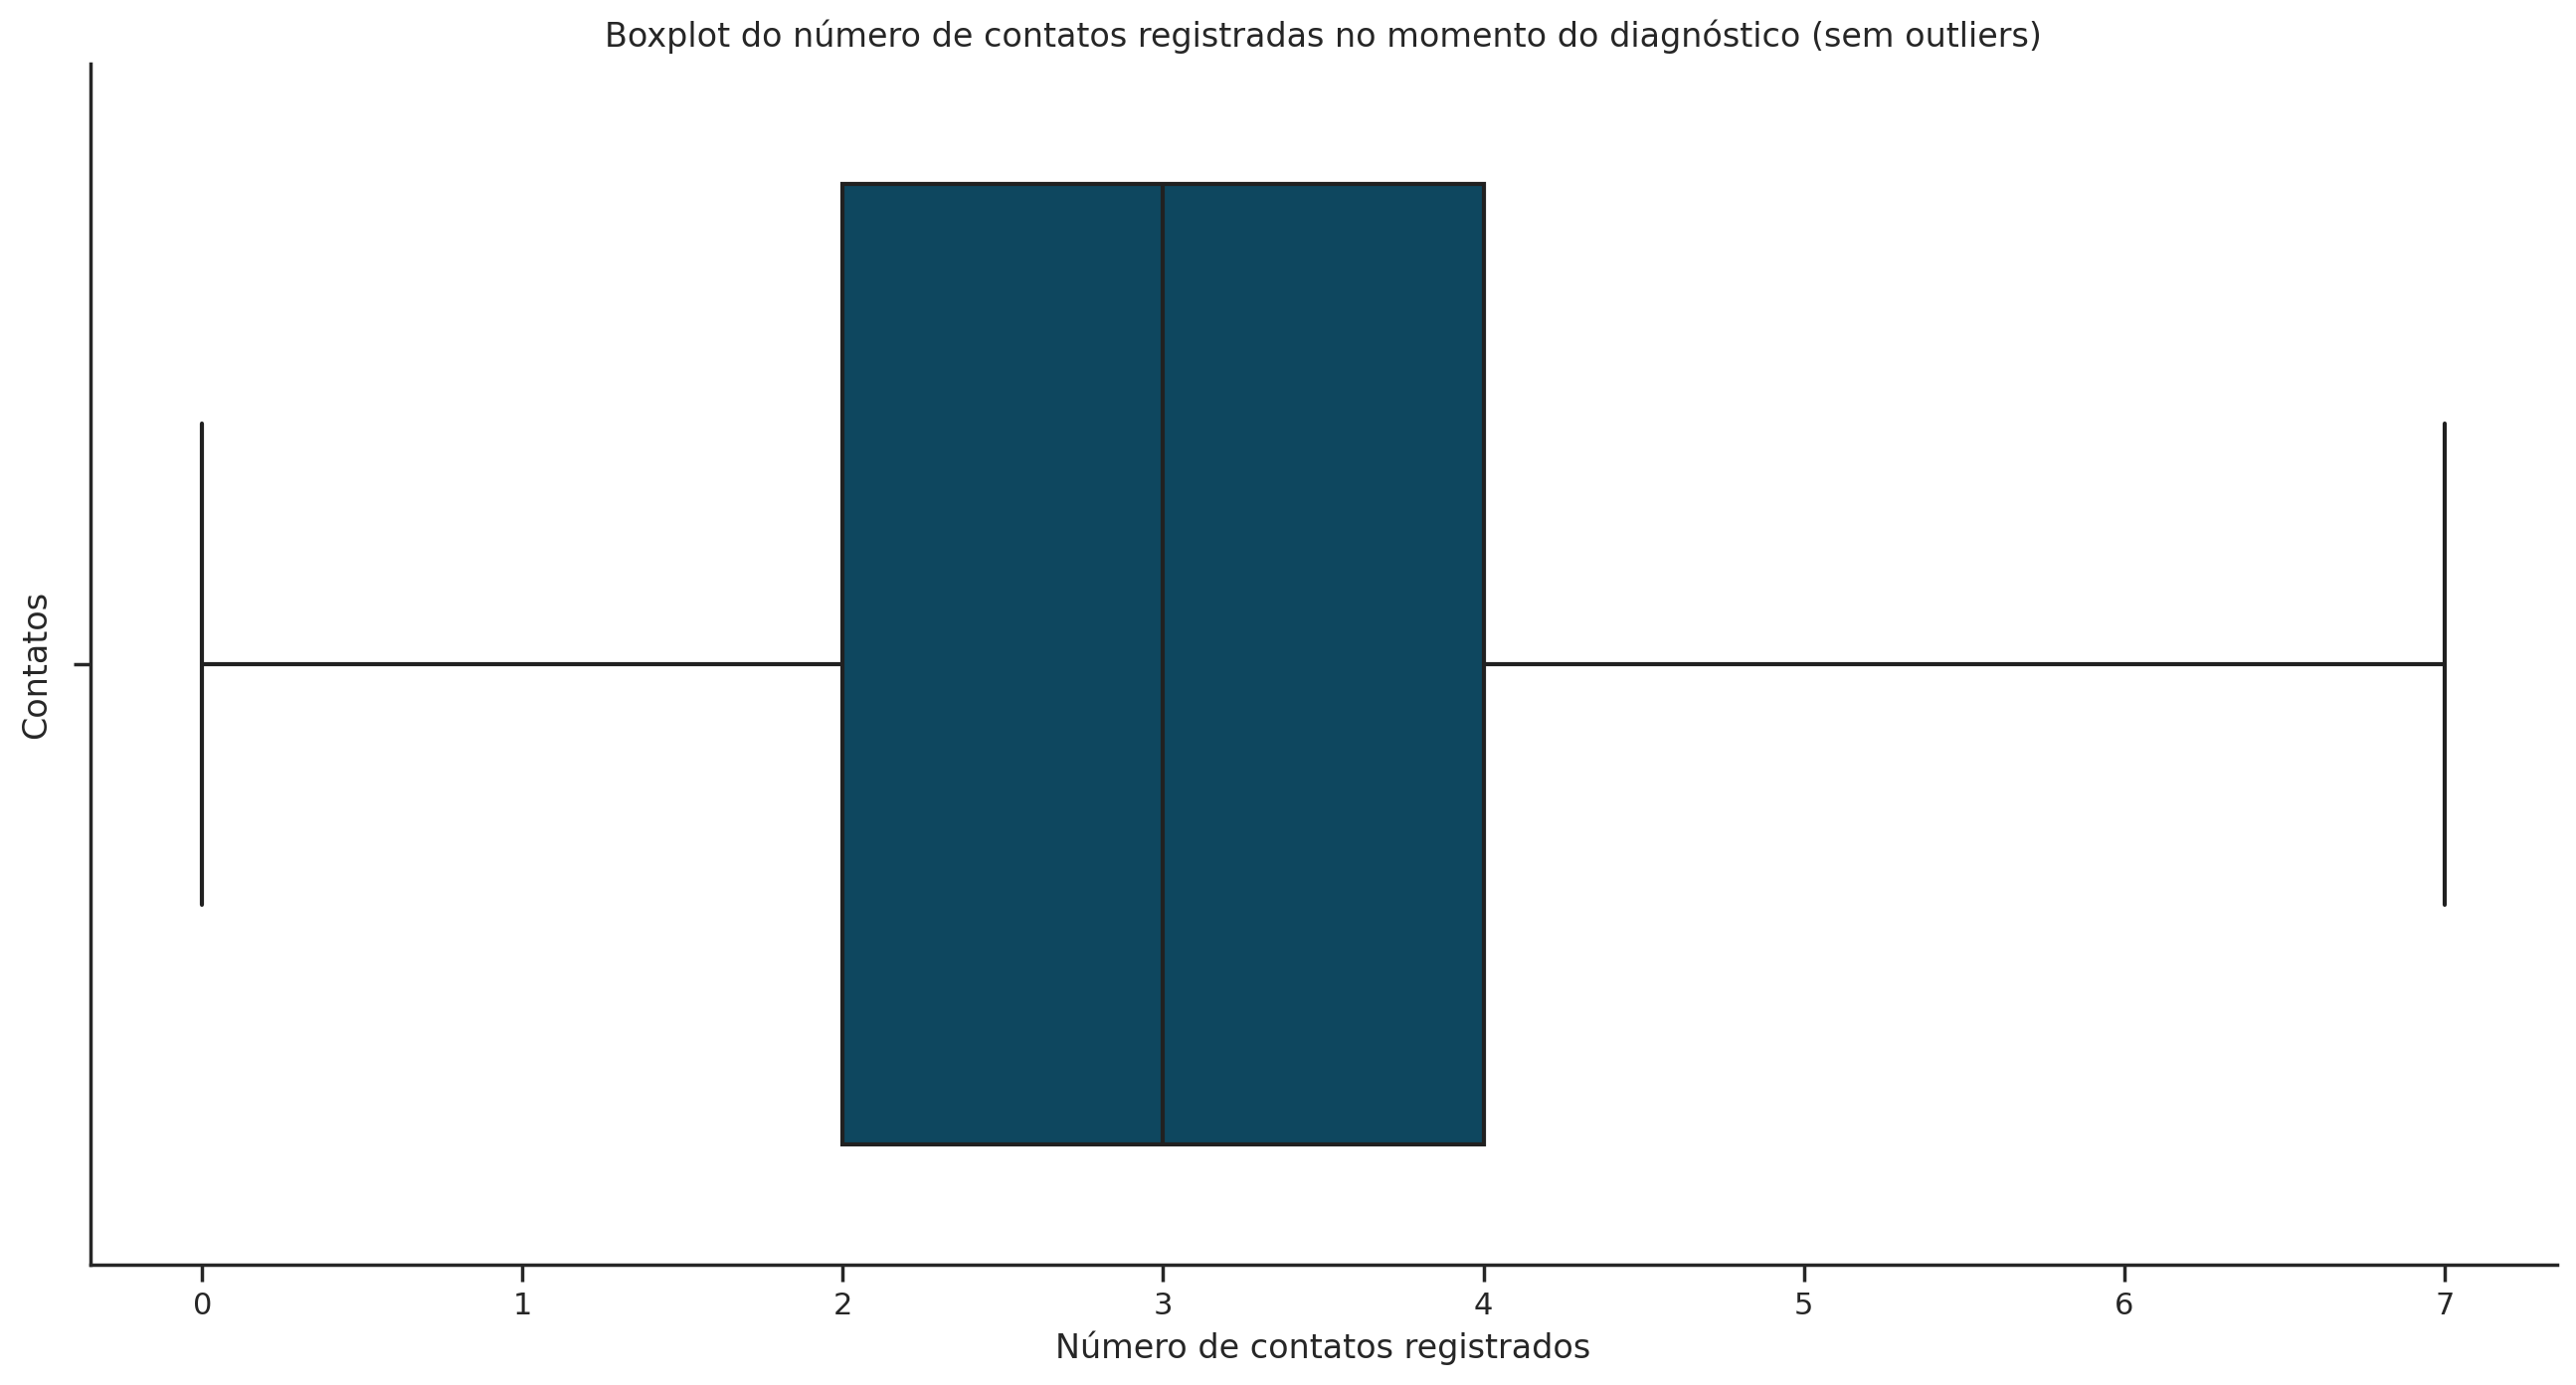

In [27]:
plt.figure(figsize=(16,8))
median = np.median(database['CONTREG'])
database[database['CONTREG'] > 10 ] = median
ax = sns.boxplot(x=database[database['CONTREG'] < 8]['CONTREG'], data=database, palette=["#004c6d"])
sns.despine()
ax.set(title='Boxplot do número de contatos registradas no momento do diagnóstico (sem outliers)', xlabel='Número de contatos registrados', ylabel='Contatos')
ax.plot()

## Casos em Menores de 15 anos

[]

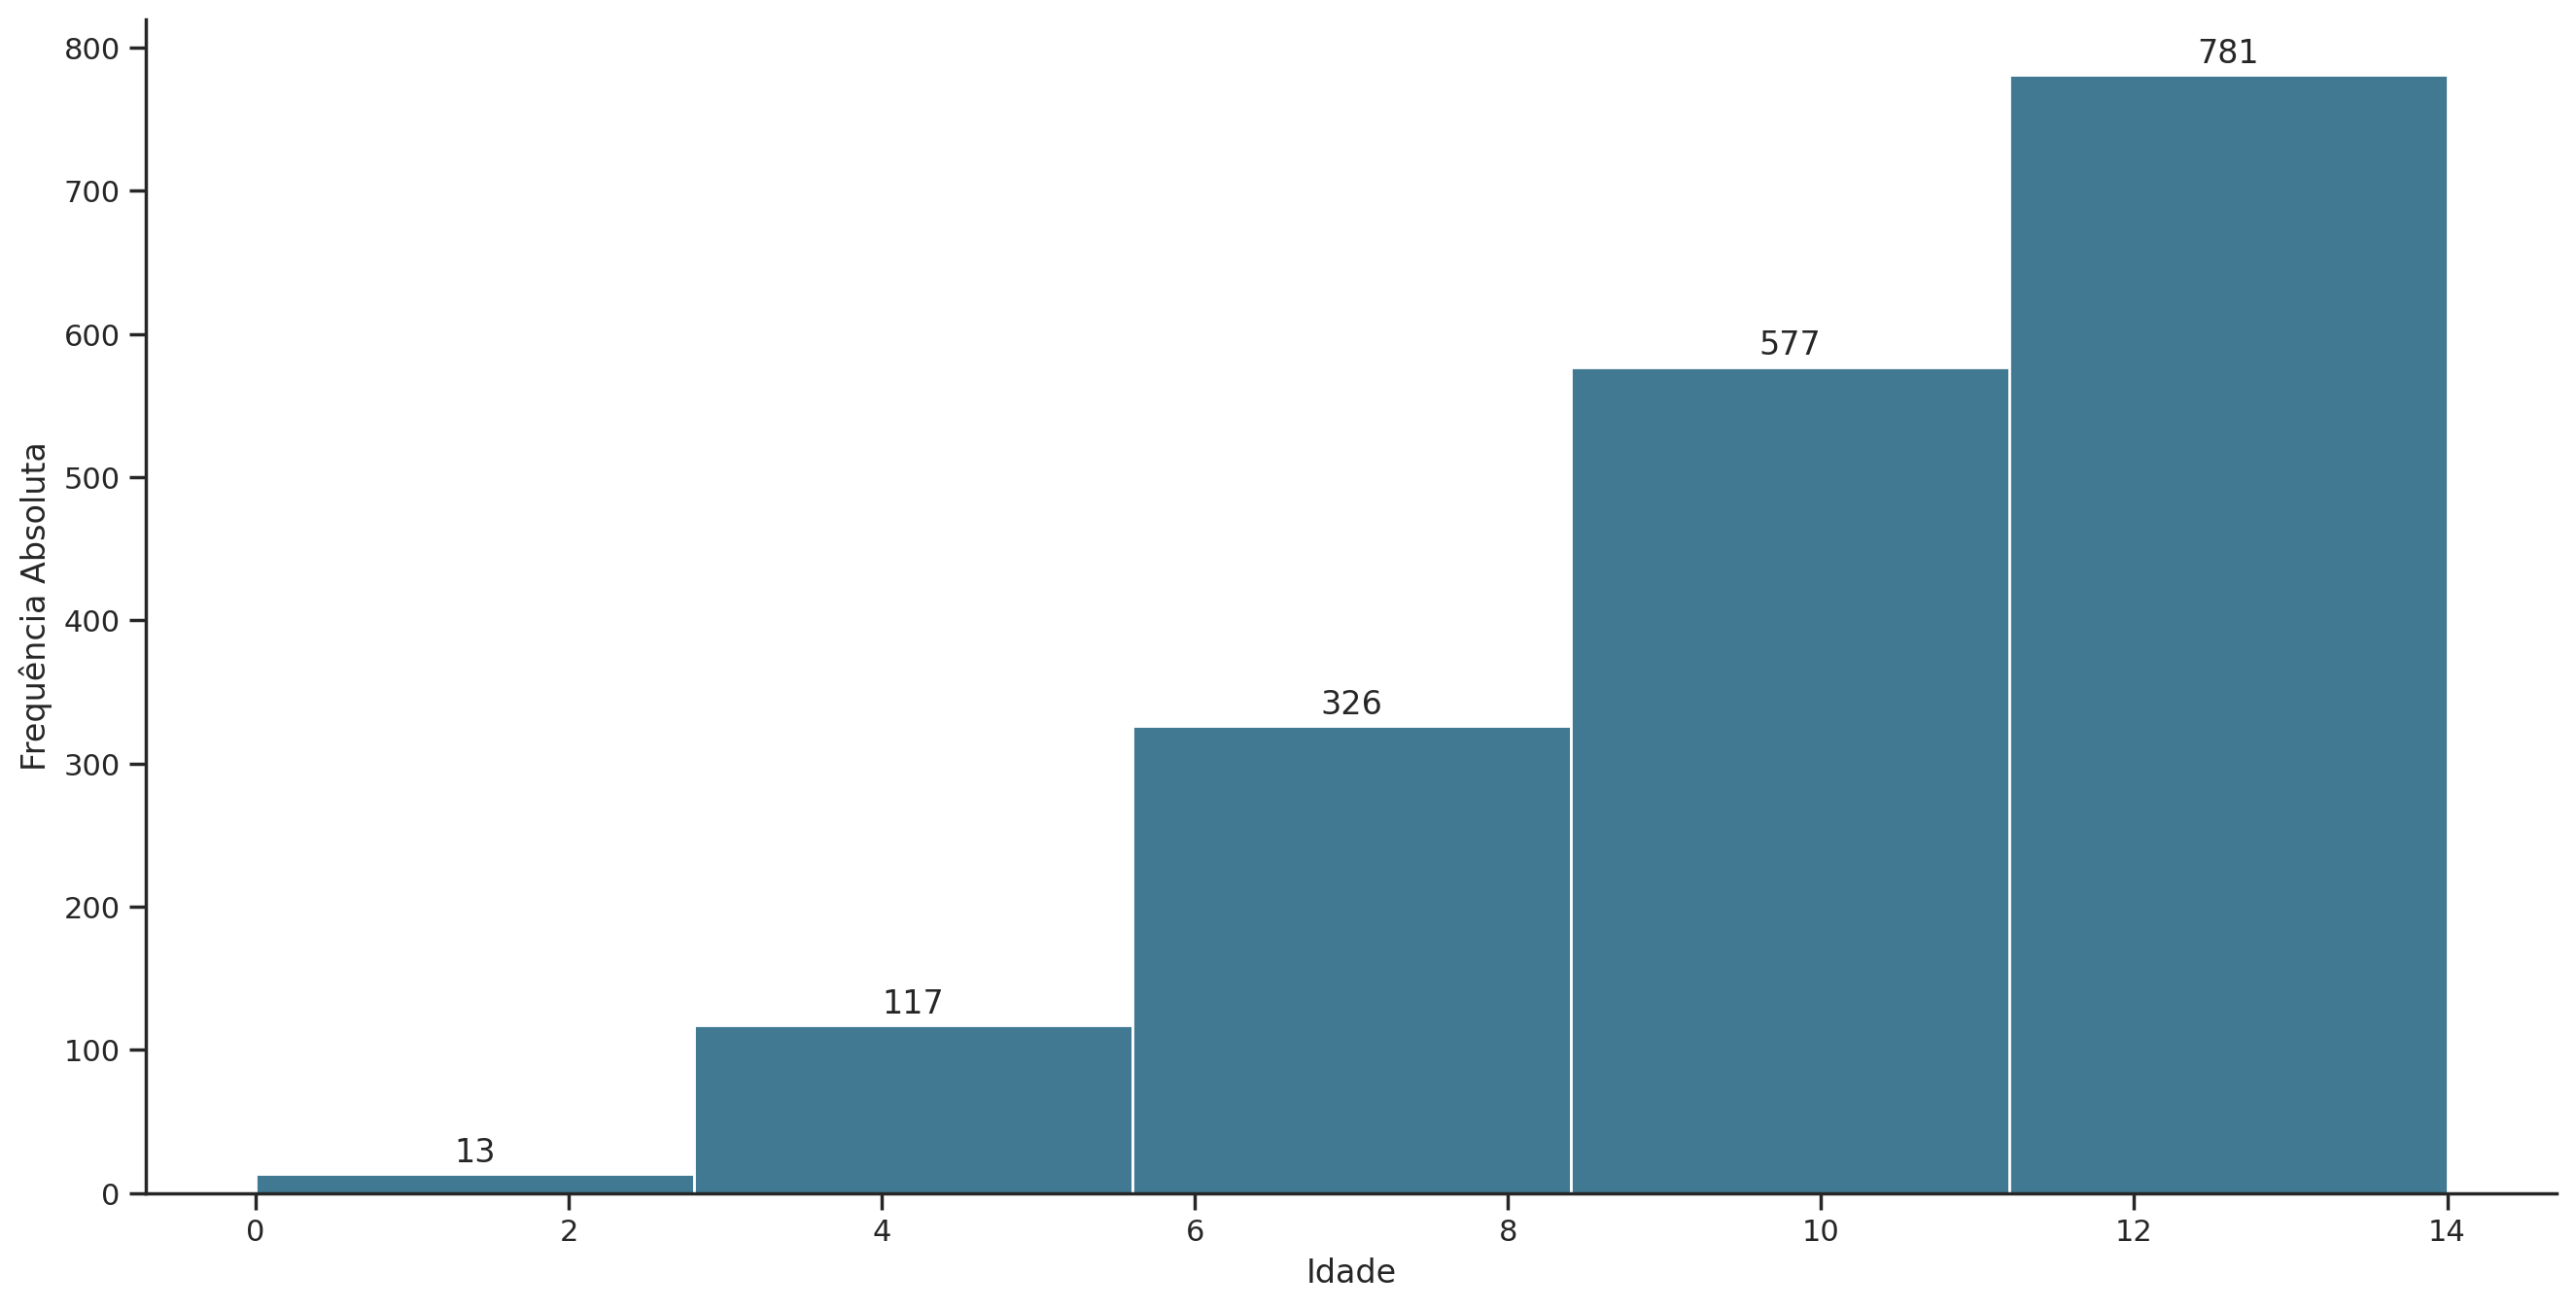

In [27]:
def item_to_str(item):
    if item:
        return str(item)
    else:
        return ''
database_idade_ate15 = database[database['NU_IDADE_N'] < 15]['NU_IDADE_N']
idade_ate15 = pd.DataFrame(database_idade_ate15)
plt.figure(figsize=(16,8))
ax = sns.histplot(data=idade_ate15,bins=5, binrange=(0,14), legend=False, palette=["#004c6d"])
ax.set(title='', xlabel='Idade', ylabel='Frequência Absoluta')
sns.despine()
for p in ax.patches:
    ax.annotate(format_number(p.get_height(), 'pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
#ax.set_xticks(range(0,15, 1))
#ax.set_xticklabels(range(0, 15,1))
ax.plot()

## Casos de menores de 15 anos no período de 2001 a 2016

[]

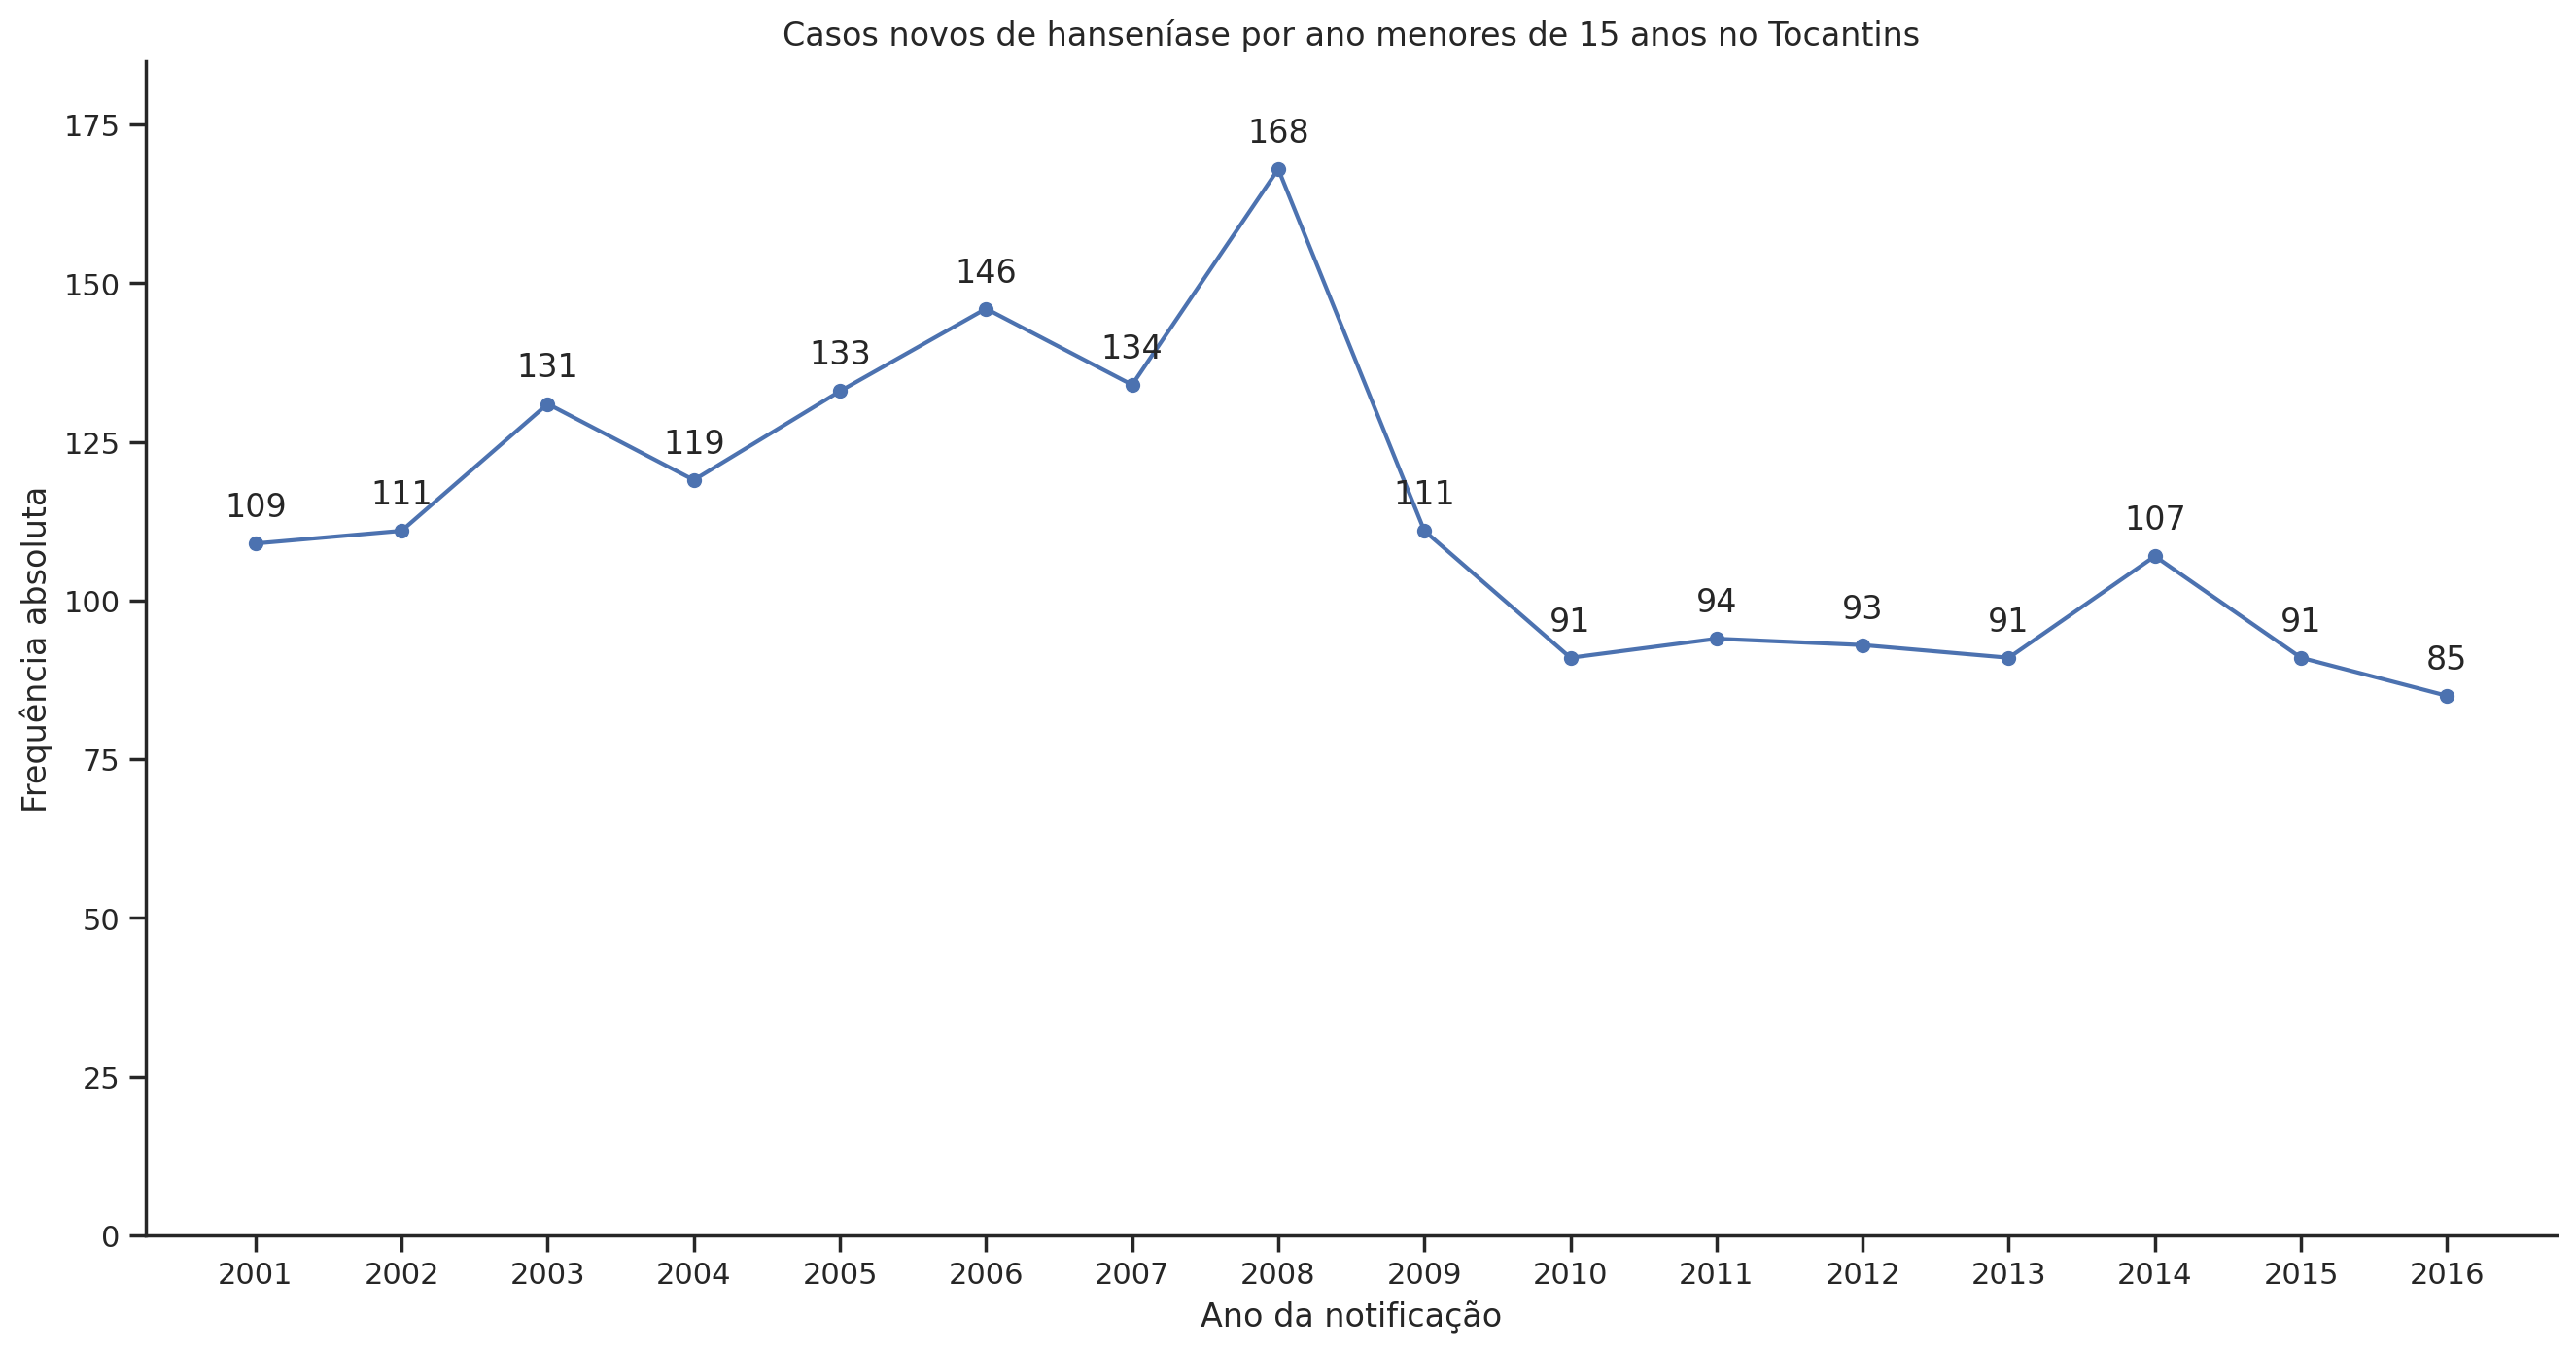

In [93]:
less_15_year = database[database['NU_IDADE_N'] < 15] 
data = less_15_year['NU_ANO'].value_counts().sort_index() 
labels = list(data.keys())
values = data.values
dataframe = pd.DataFrame(data={'labels': labels, 'values': values})
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='labels', y='values', data=dataframe, palette=["#004c6d"])
sns.scatterplot(data=dataframe, x='labels', y='values')
sns.despine()
for x,y in zip(dataframe['labels'], dataframe['values']):
    label = "{}".format(y)
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(0, 10), ha='center')
ax.set(
    xlabel='Ano da notificação', 
    ylabel='Frequência absoluta', 
    title='Casos novos de hanseníase por ano menores de 15 anos no Tocantins',
    ylim=(0, 185),
)
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
for x, y in zip(list(dataframe.labels), list(dataframe.values)):
    #label = "%.2f" % (y)
    #plt.annotate(label, (x,y), textcoords='offset points', xytext=(0, 10), ha='center')
    pass
ax.set_xticks(range(2001,2017))
ax.set_xticklabels(range(2001, 2017, 1))
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
ax.plot()

## 4.2 Análise Bidimensional

### 4.1 - Análise entres as variáveis classificação operacional e sexo

[]

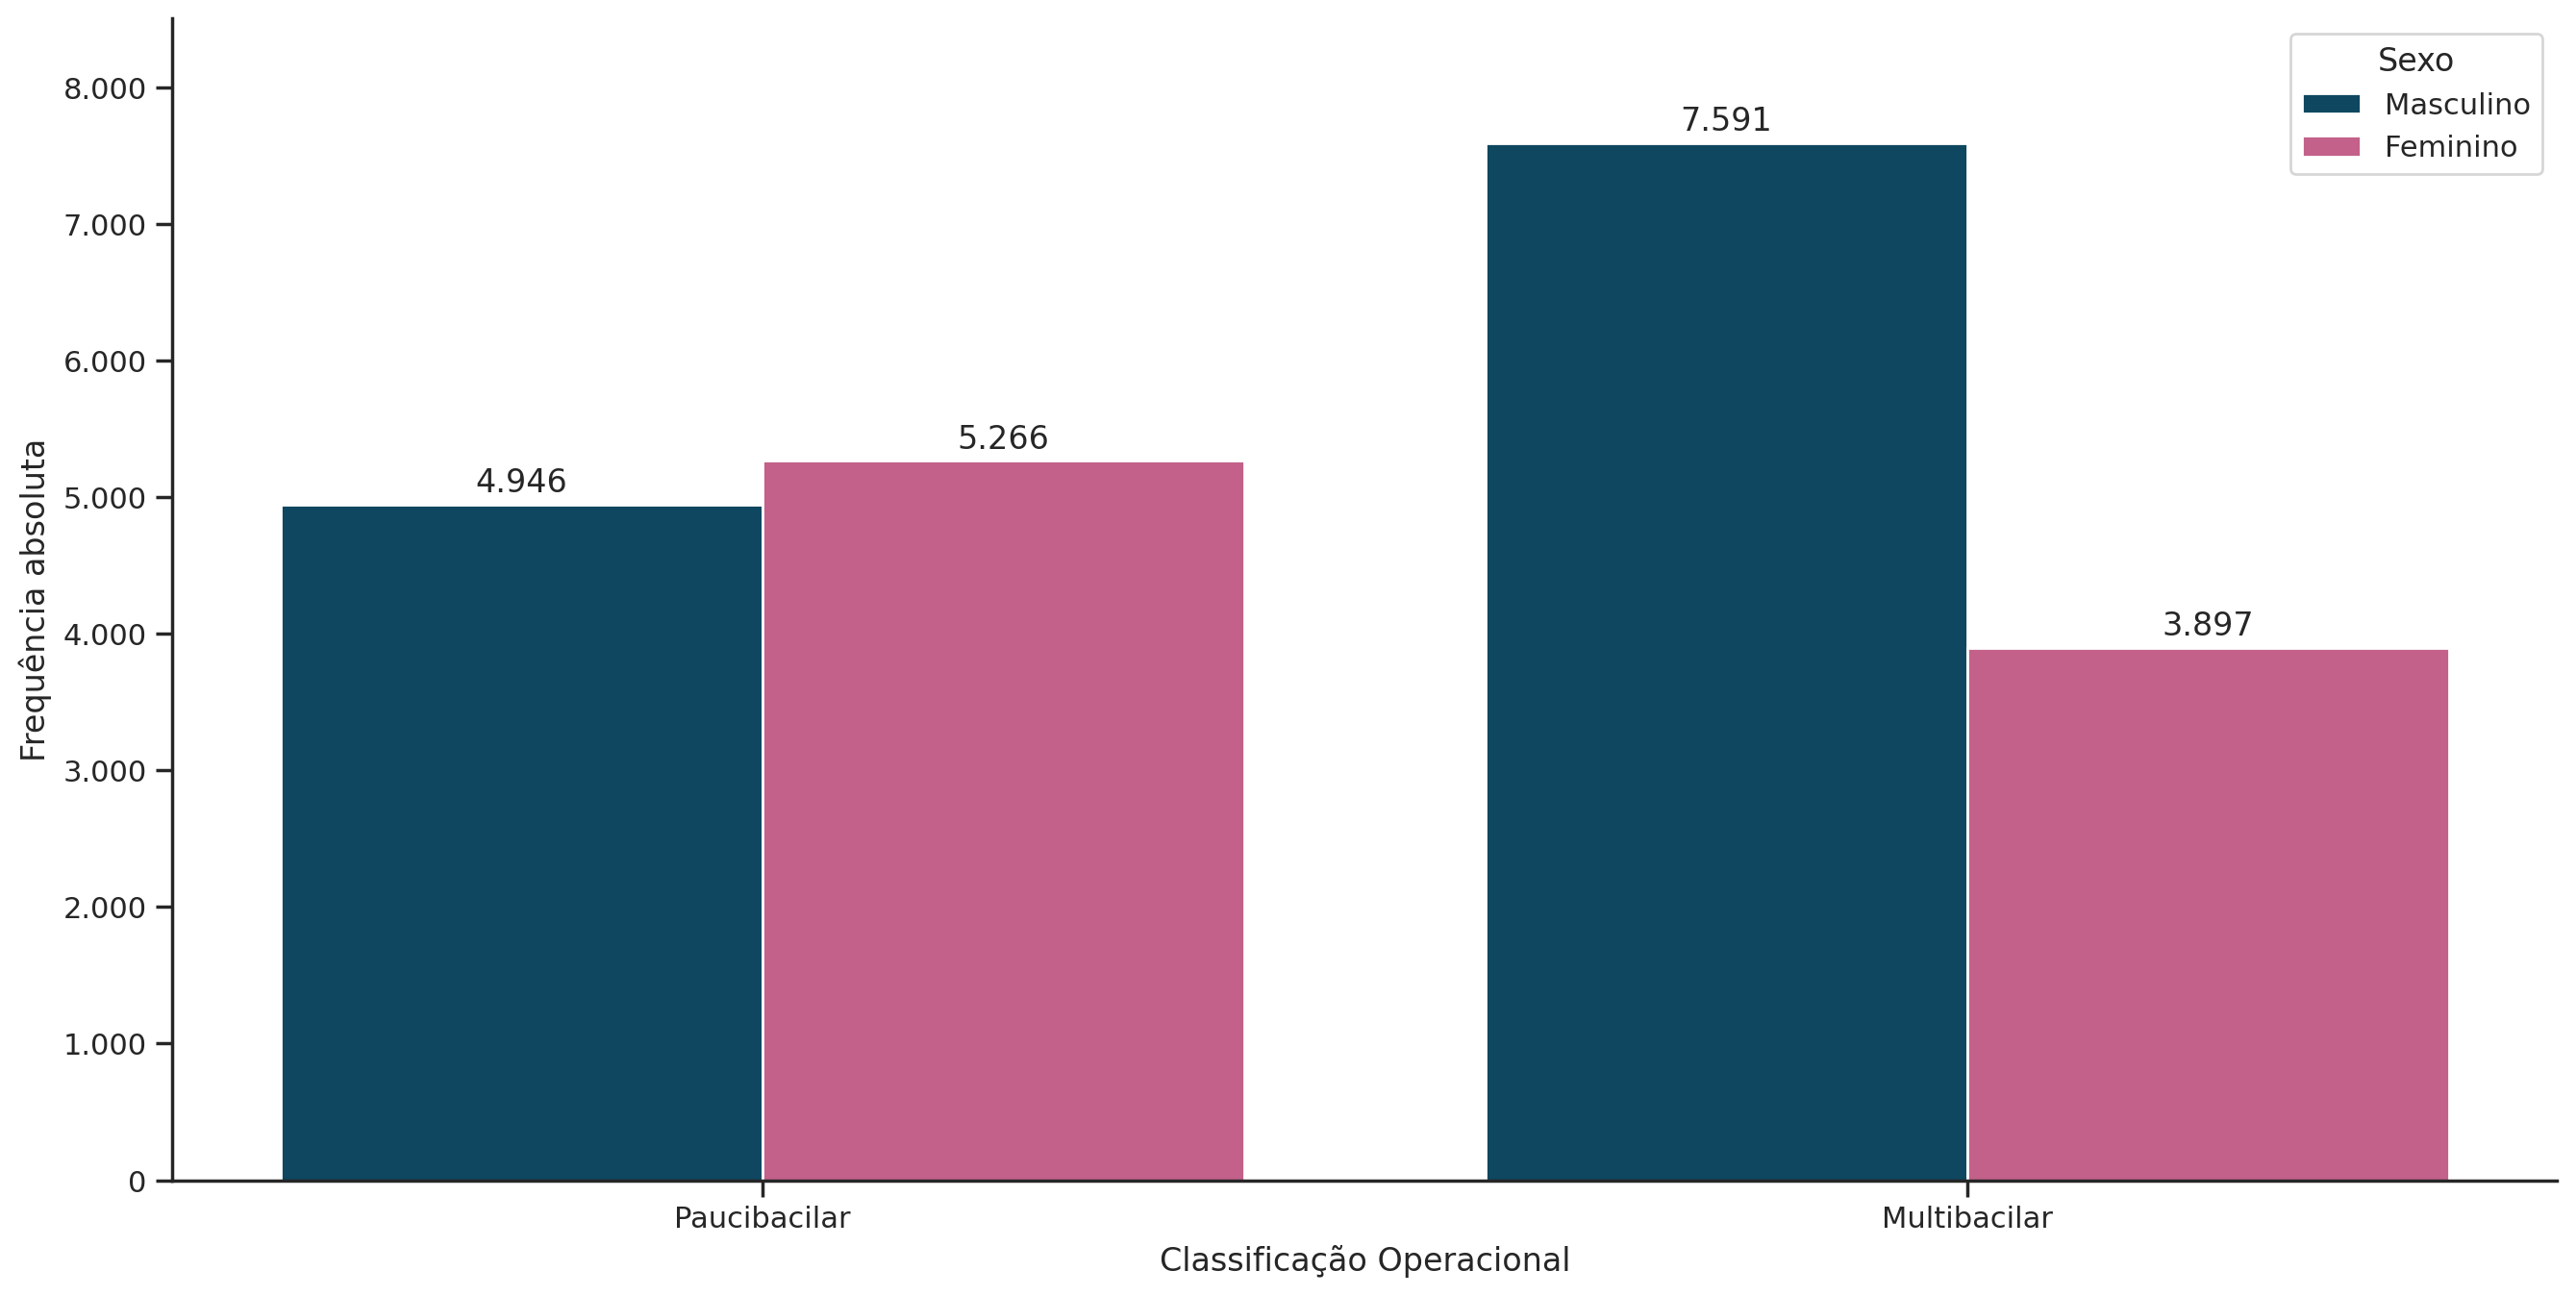

In [6]:
df = database[['CLASSOPERA', 'CS_SEXO']].value_counts().reset_index()
df.columns = ['CLASSOPERA', 'CS_SEXO', 'COUNTS']
data = pd.DataFrame({
    'Sexo': df['CS_SEXO'],
    'Classificação Operacional': df['CLASSOPERA'],
    'Counts': df['COUNTS'],
})

plt.figure(figsize=(16,8))
ax = sns.barplot(
    x='Classificação Operacional', 
    y='Counts', 
    hue='Sexo', 
    data=data, 
    order=['Paucibacilar', 'Multibacilar'],
    palette=["#004c6d", "#d45087"]
)
sns.despine()
ax.set(xlabel='Classificação Operacional', ylabel='Frequência absoluta', title='', ylim=(0, 8500))
for p in ax.patches:
    ax.annotate(format_number(p.get_height(), 'pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
ax.plot()

### 4.2 Análise entre as variáveis classificação operacional e raça

[]

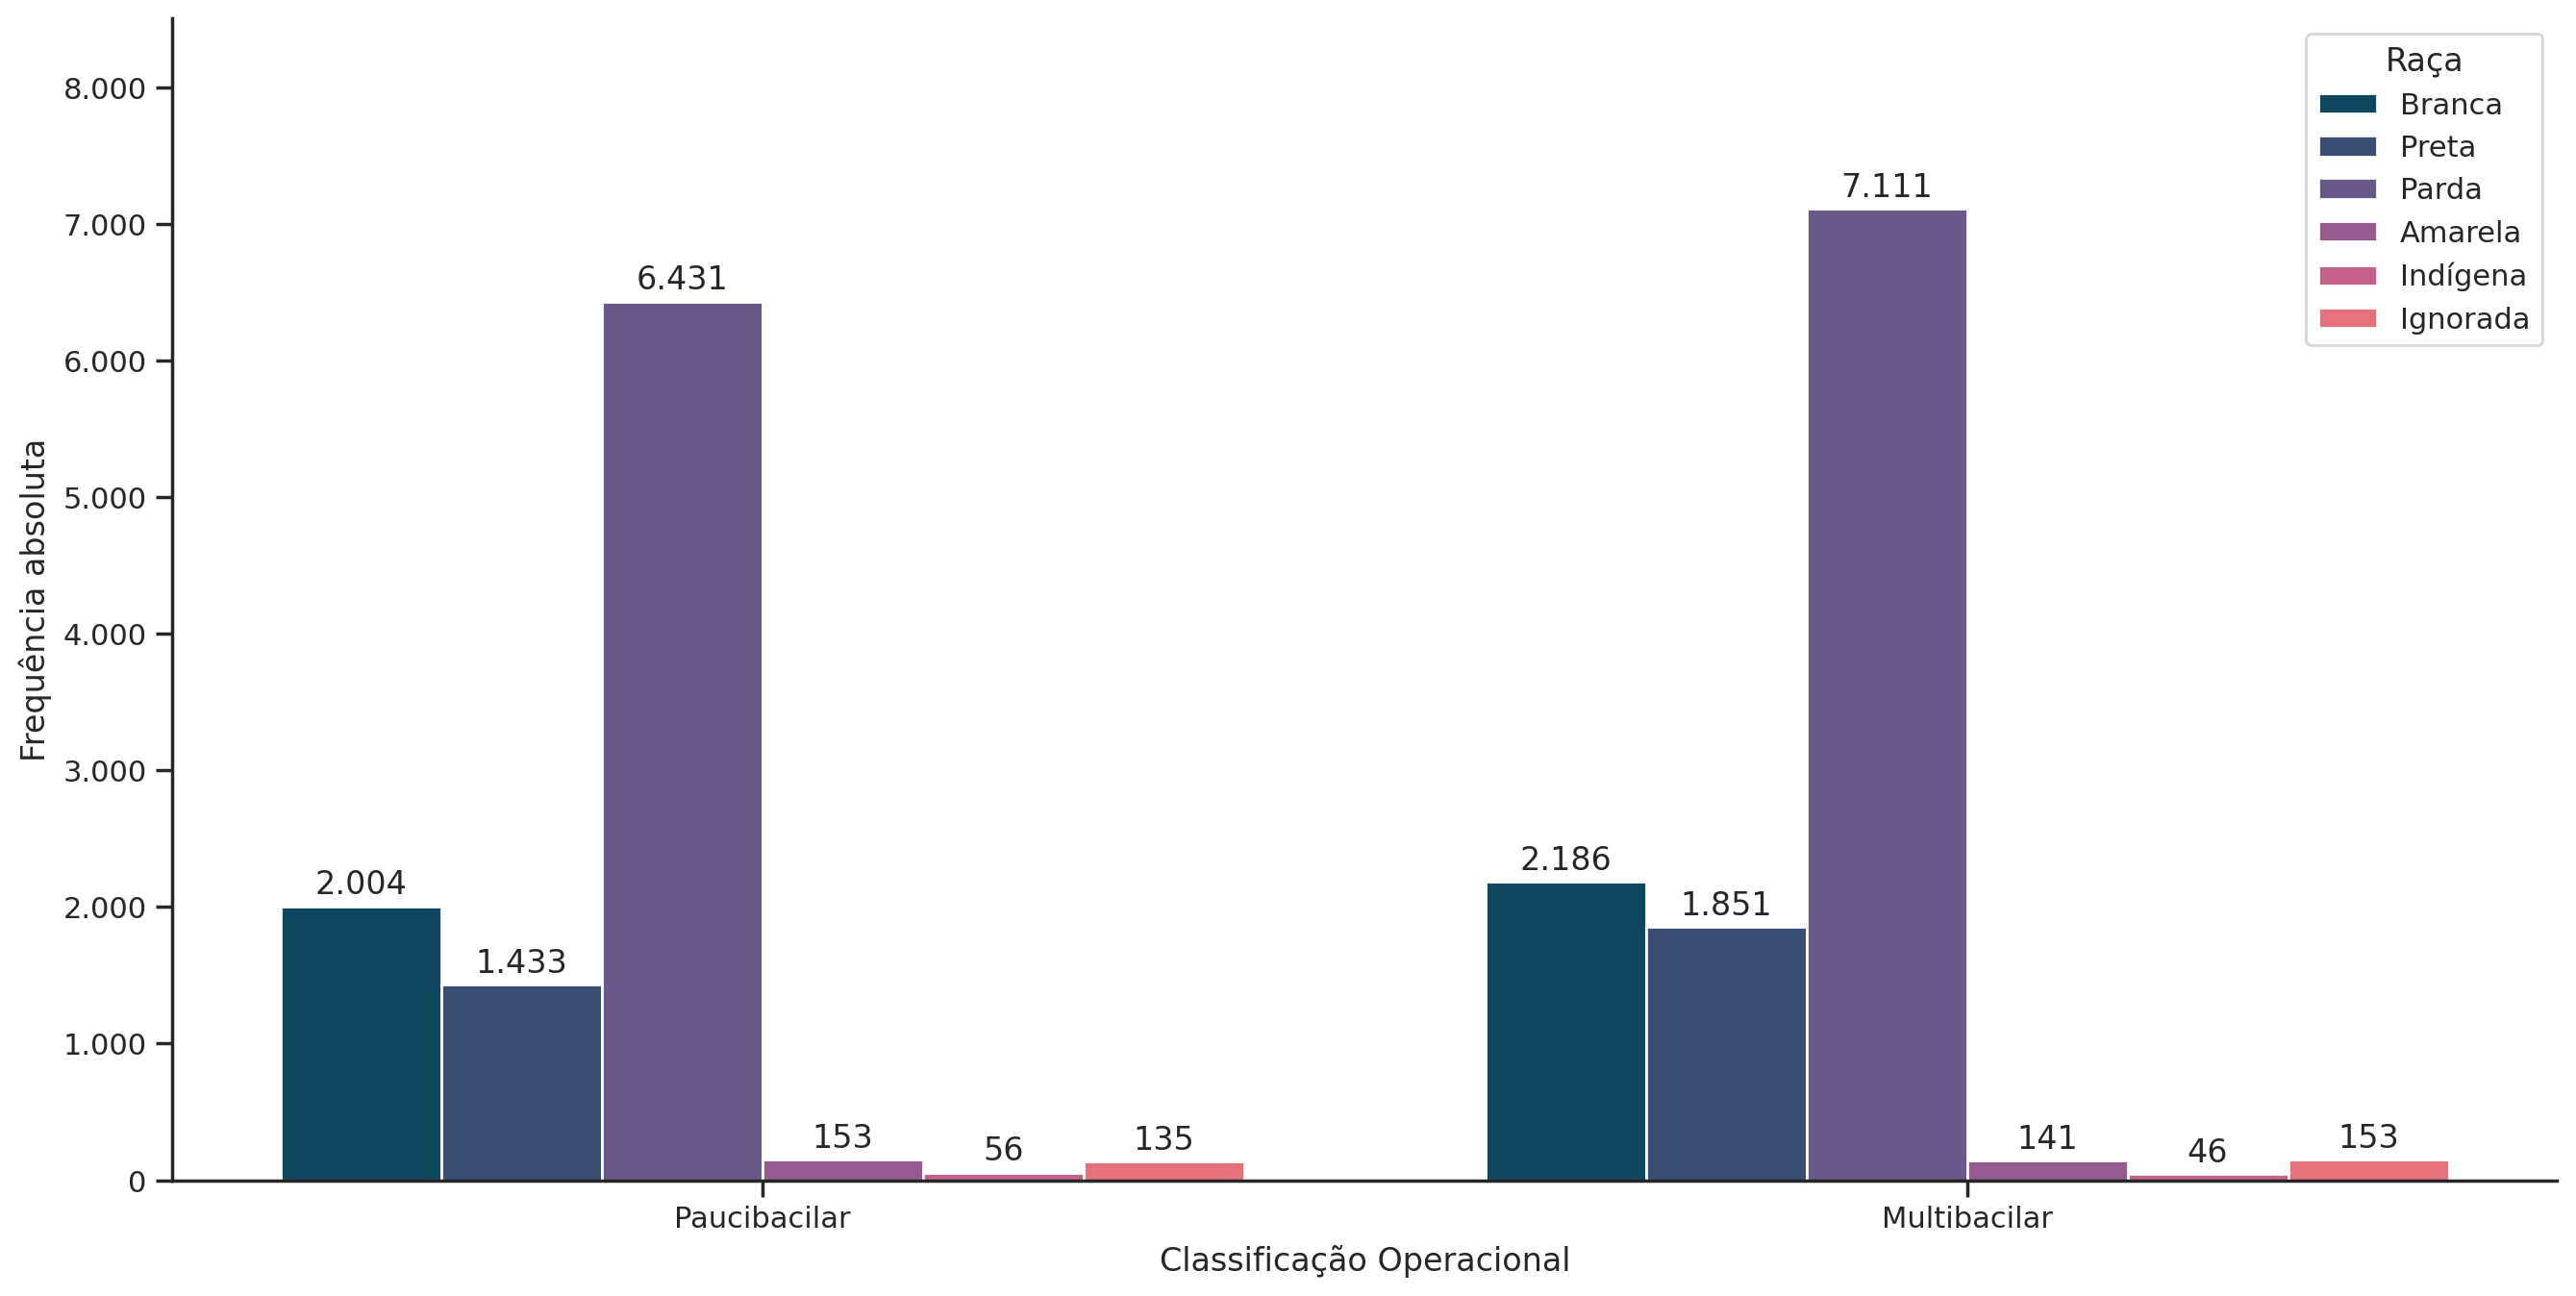

In [7]:
df = database[['CLASSOPERA', 'CS_RACA']].value_counts().reset_index()
df.columns = ['CLASSOPERA', 'CS_RACA', 'COUNTS']
data = {
    'Raça': df['CS_RACA'],
    'Classificação Operacional': df['CLASSOPERA'],
    'Count': df['COUNTS'],
}
d = pd.DataFrame(data)
plt.figure(figsize=(16,8))
ax = sns.barplot(
    x='Classificação Operacional', 
    y='Count', 
    hue='Raça', 
    data=d, 
    order=['Paucibacilar', 'Multibacilar'],
    hue_order=['Branca', "Preta", "Parda", "Amarela", "Indígena", "Ignorada"],
    palette=["#004c6d", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a"]
)

sns.despine()
ax.set(xlabel='Classificação Operacional', ylabel='Frequência absoluta', title='', ylim=(0, 8500), label='a')
for p in ax.patches:
    ax.annotate(format_number(p.get_height(), 'pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
ax.plot()

### 4.3 Análise entre as variáveis classificação operacional e escolaridade

[]

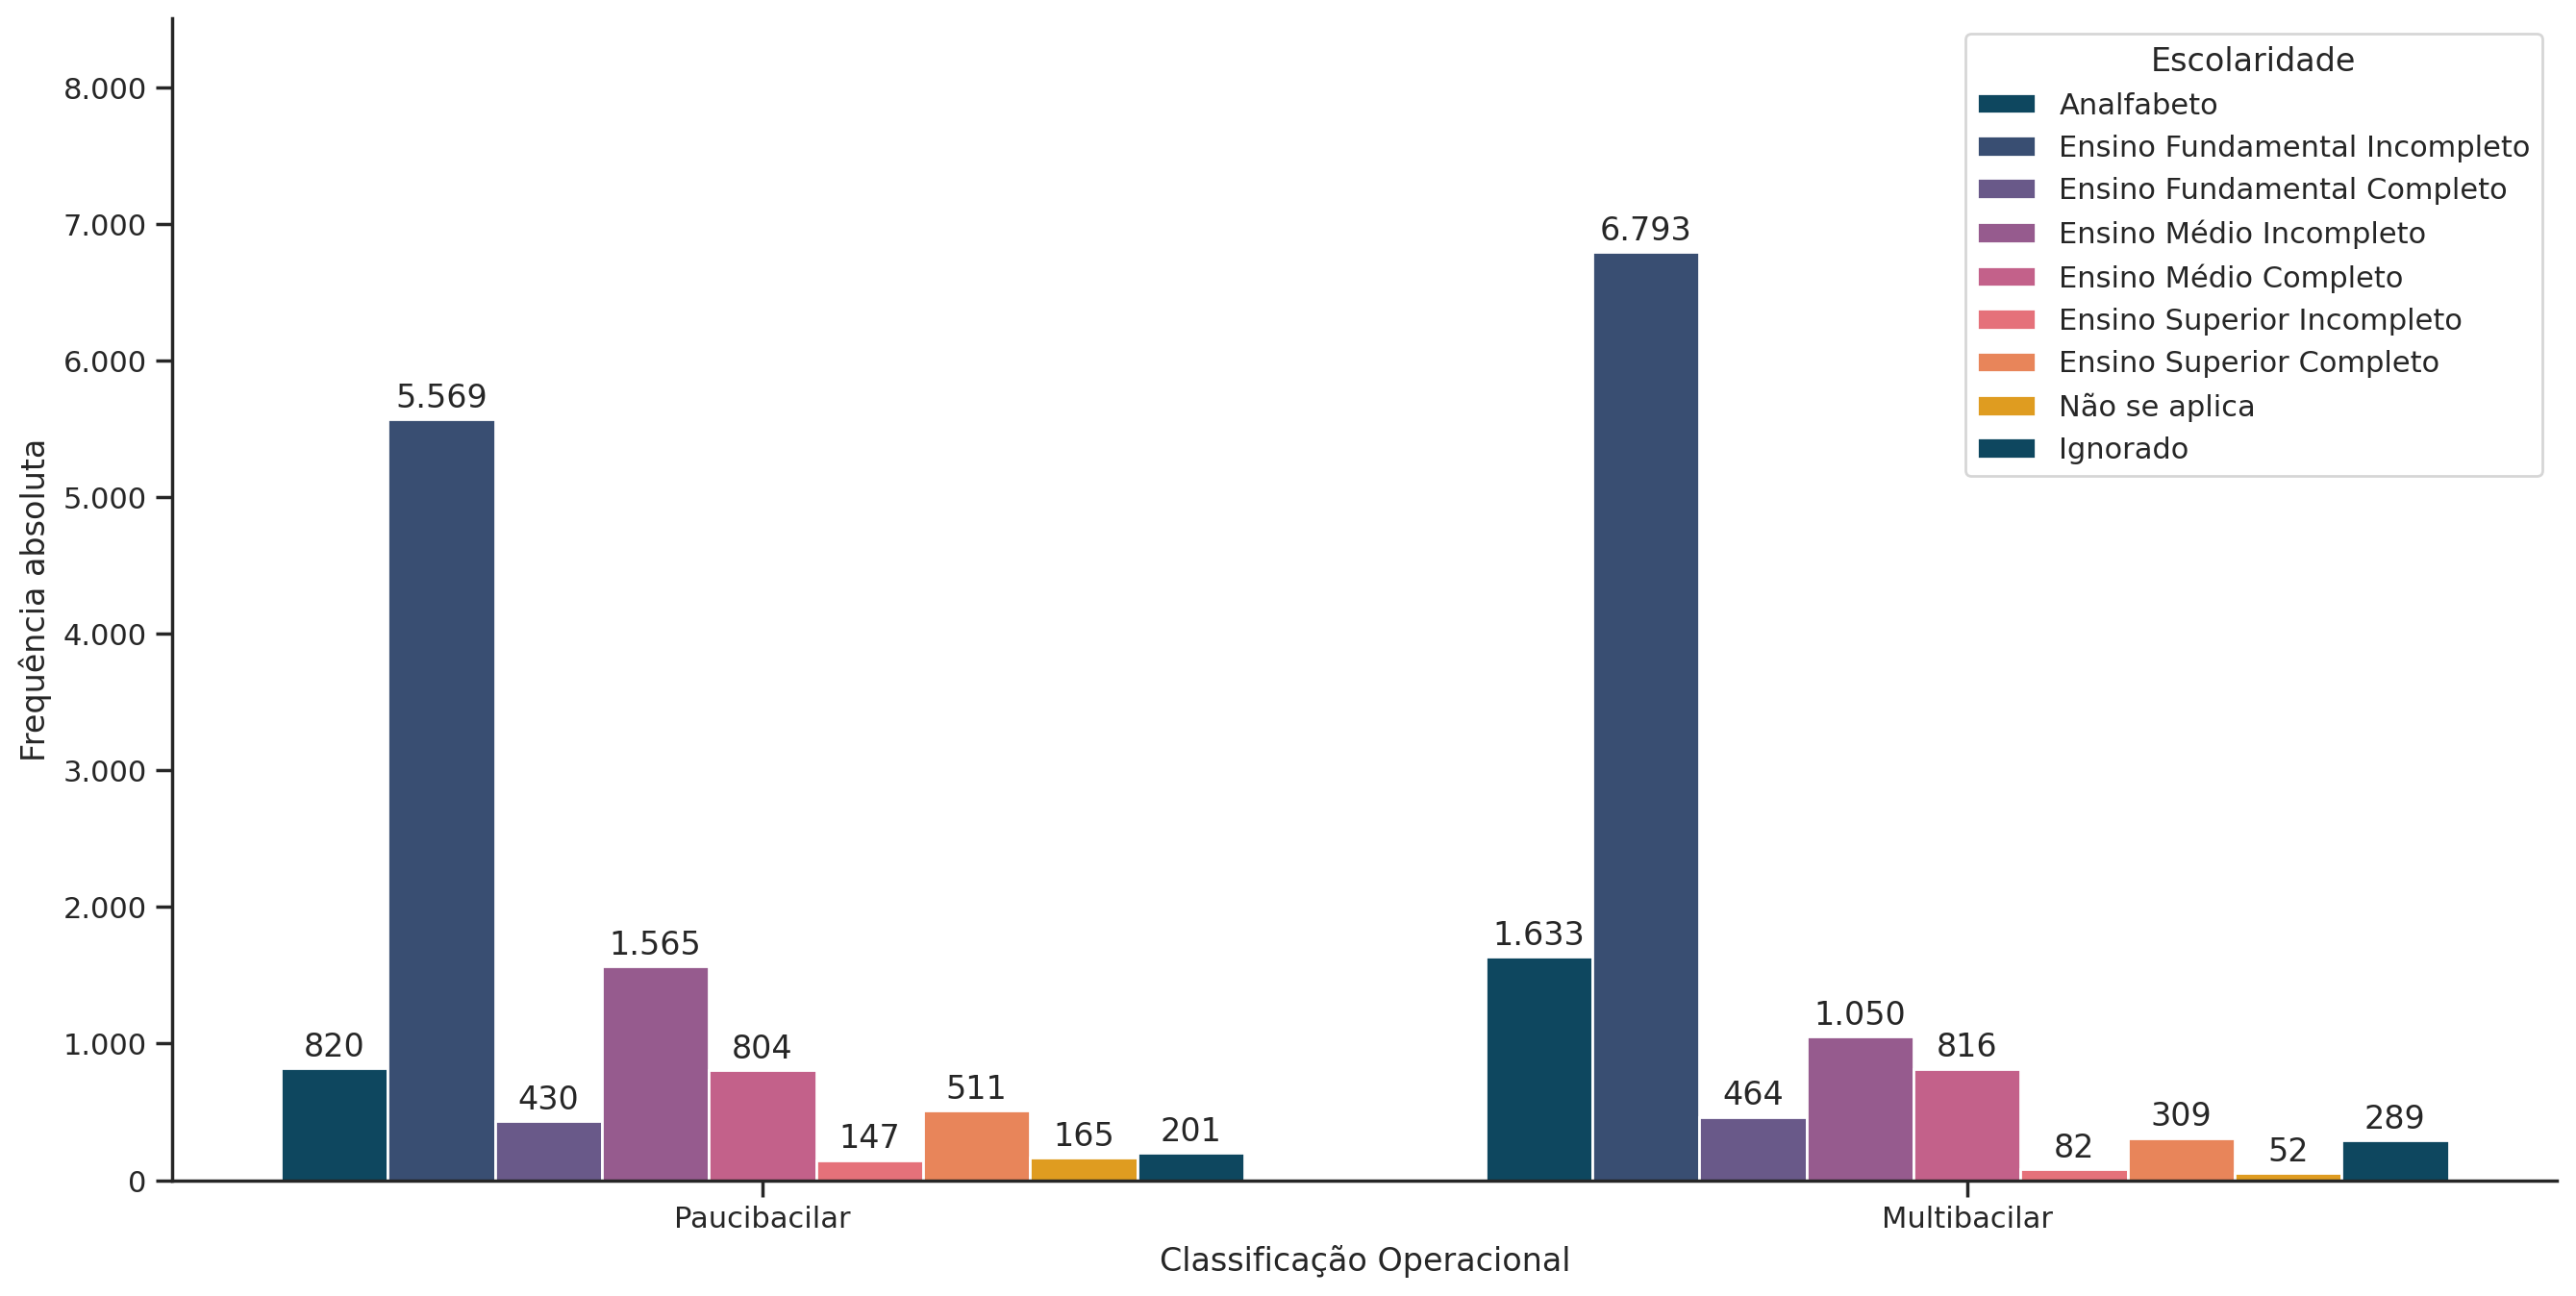

In [104]:
df = database[['CLASSOPERA', 'CS_ESCOL_N']].value_counts().reset_index()
df.columns = ['CLASSOPERA', 'CS_ESCOL_N', 'COUNTS']
data = {
    'Escolaridade': df['CS_ESCOL_N'],
    'Classificação Operacional': df['CLASSOPERA'],
    'Count': df['COUNTS'],
}
escolaridades = [
    'Analfabeto',
    'Ensino Fundamental Incompleto',
    'Ensino Fundamental Completo',
    'Ensino Médio Incompleto',
    'Ensino Médio Completo',
    'Ensino Superior Incompleto',
    'Ensino Superior Completo',
    'Não se aplica',
    'Ignorado'
]
d = pd.DataFrame(data)
plt.figure(figsize=(16,8))
ax = sns.barplot(
    x='Classificação Operacional', 
    y='Count', 
    hue='Escolaridade', 
    data=d, 
    order=['Paucibacilar', 'Multibacilar'],
    hue_order=escolaridades,
    palette=["#004c6d", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]
)
sns.despine()
ax.set(xlabel='Classificação Operacional', ylabel='Frequência absoluta', title='', ylim=(0, 8500))
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
for p in ax.patches:
    ax.annotate(format_number(p.get_height(), 'pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.plot()

### 4.4 Análise entre as variáveis classificação operacional e zona

[]

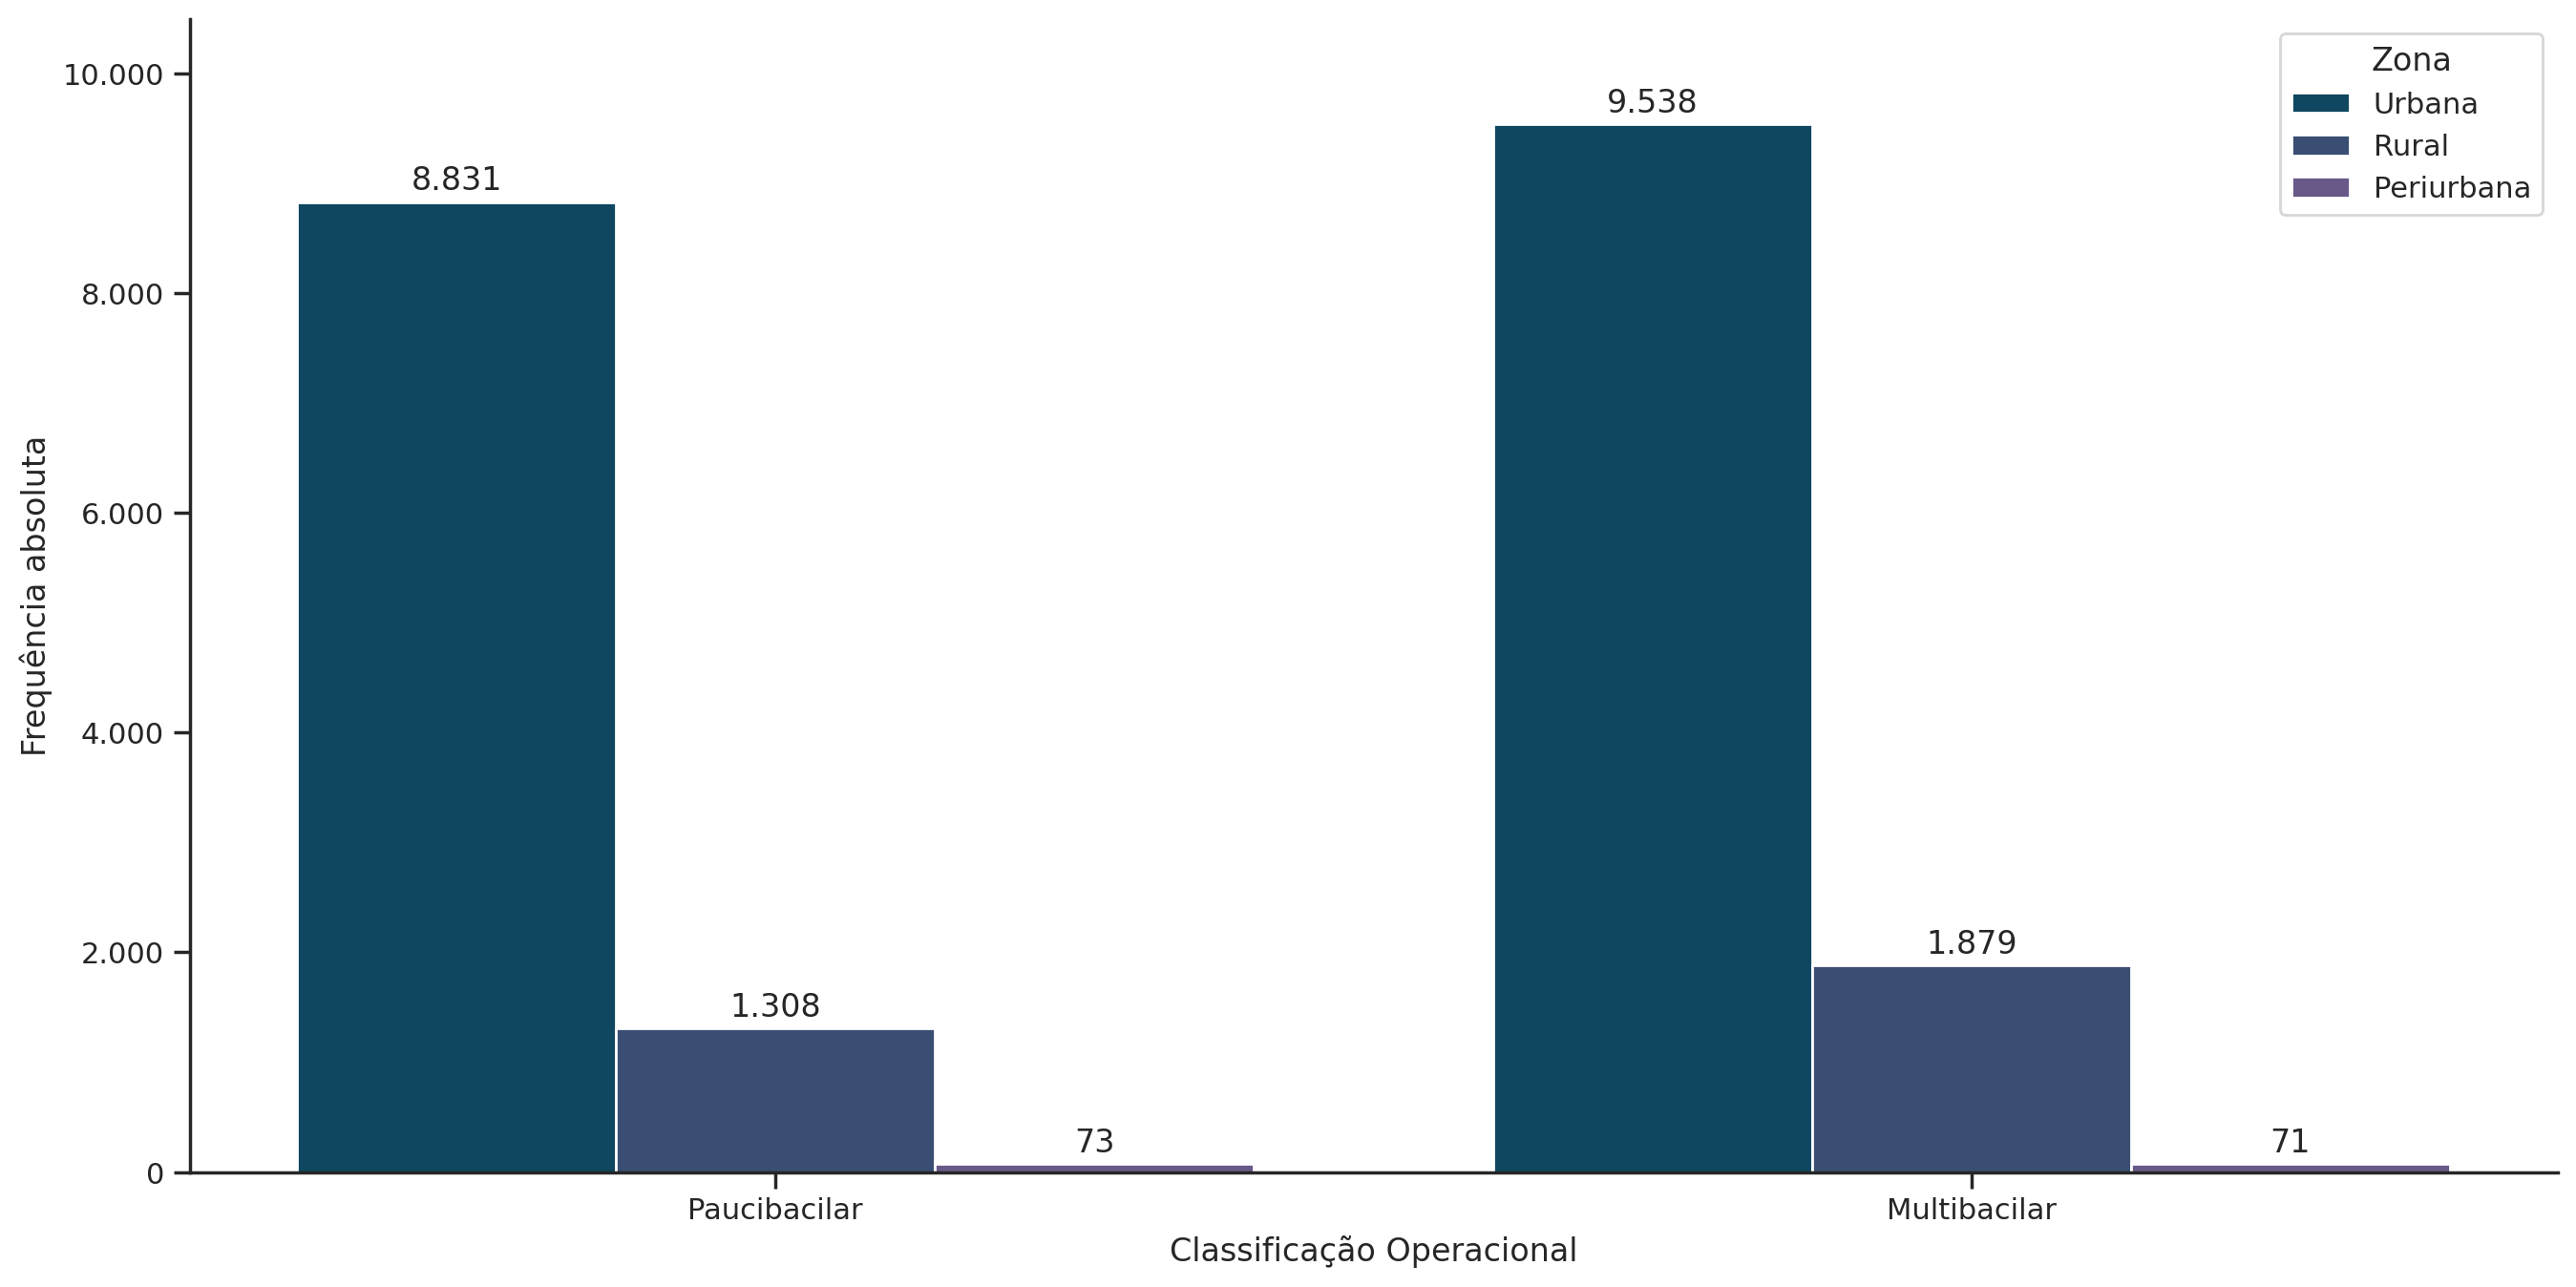

In [96]:
df = database[['CLASSOPERA', 'CS_ZONA']].value_counts().reset_index()
df.columns = ['CLASSOPERA', 'CS_ZONA', 'COUNTS']
data = {
    'Zona': df['CS_ZONA'],
    'Classificação Operacional': df['CLASSOPERA'],
    'Count': df['COUNTS'],
}
d = pd.DataFrame(data)
plt.figure(figsize=(16,8))
ax = sns.barplot(
    x='Classificação Operacional', 
    y='Count', 
    hue='Zona', 
    data=d, 
    order=['Paucibacilar', 'Multibacilar'],
    palette=["#004c6d", "#2f4b7c", "#665191"]
)
sns.despine()
ax.set(xlabel='Classificação Operacional', ylabel='Frequência absoluta', title='', ylim=(0, 10500))
for p in ax.patches:
    ax.annotate(format_number(p.get_height(), 'pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
ax.plot()

### 4.5 Análise entre as variáveis classificação operacional e faixa de idade


[]

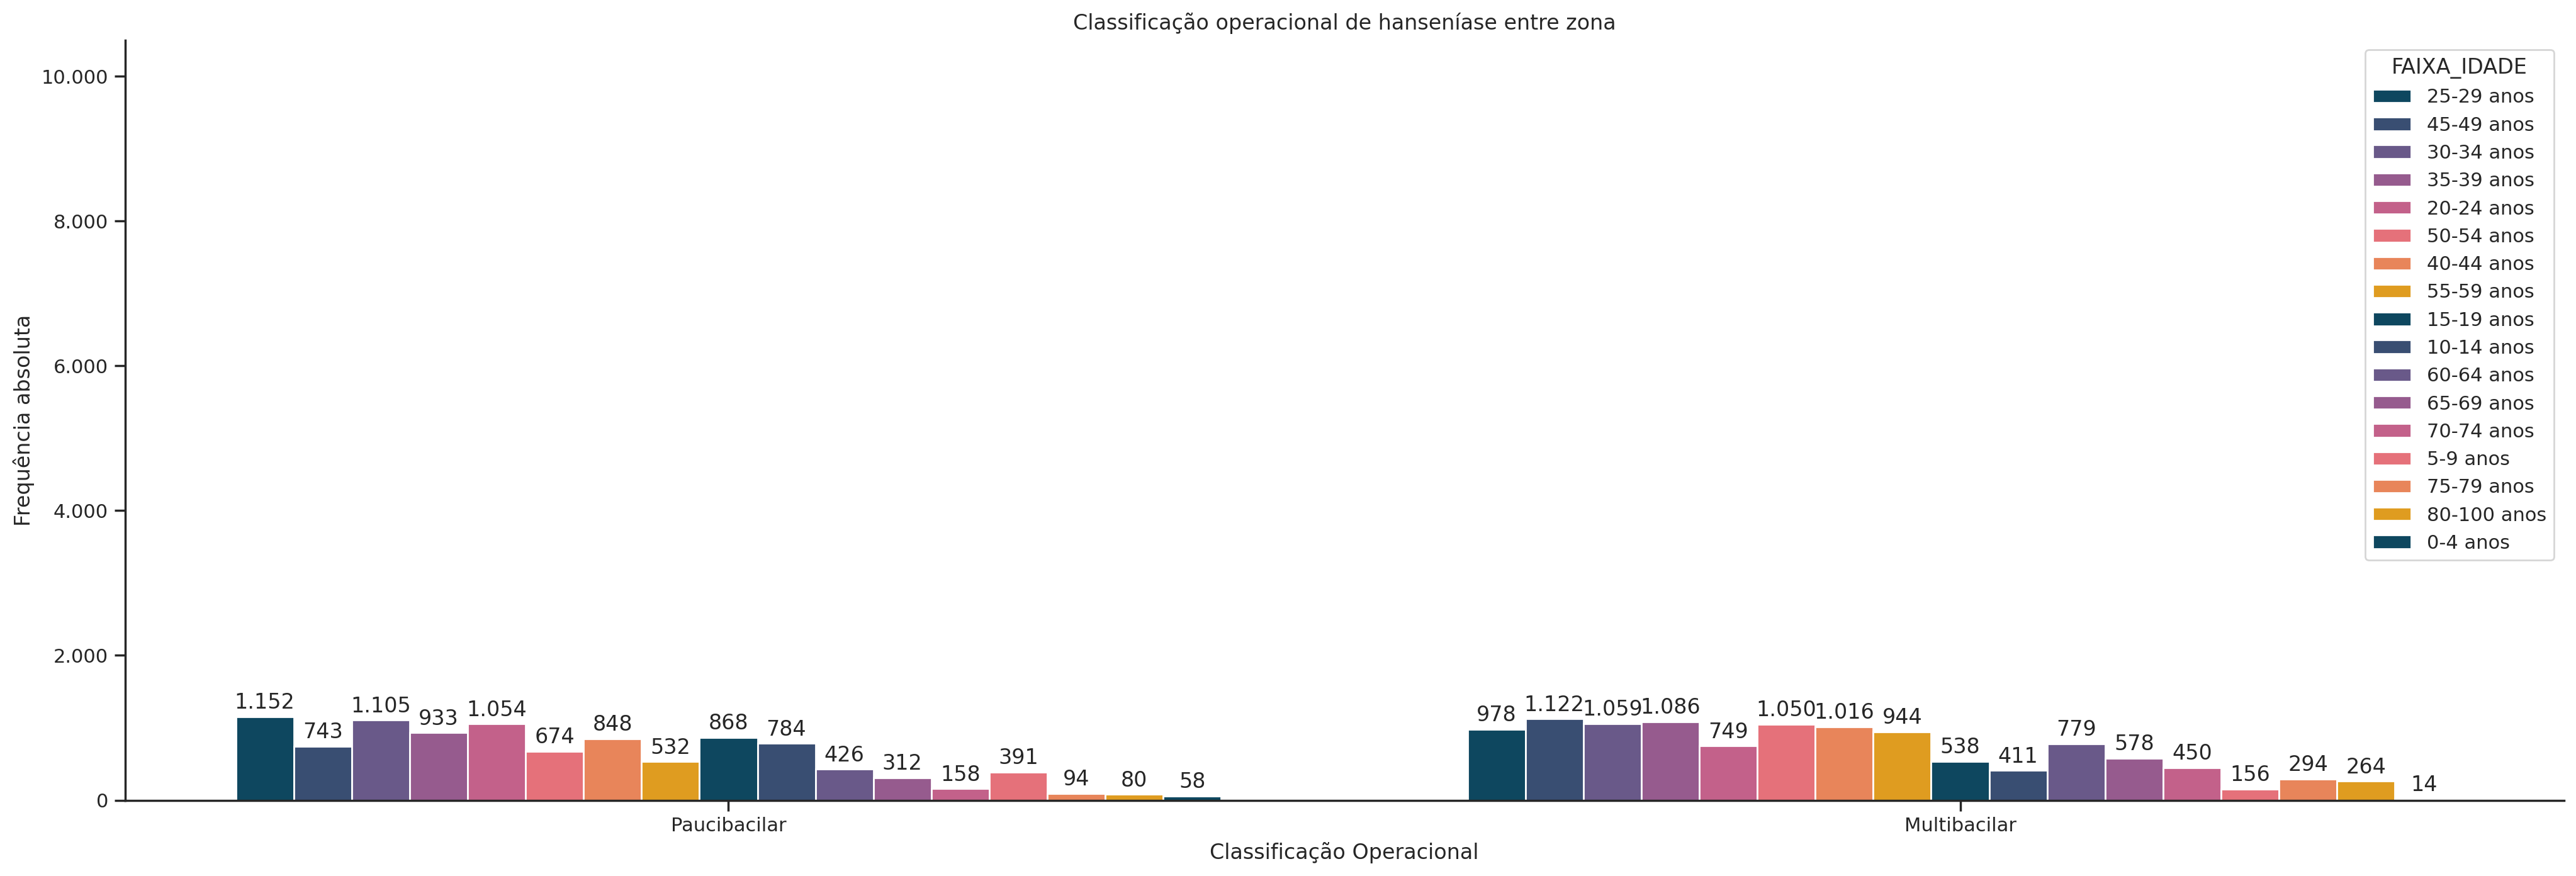

In [8]:
df = database[['CLASSOPERA', 'FAIXA_IDADE']].value_counts().reset_index()
df.columns = ['CLASSOPERA', 'FAIXA_IDADE', 'COUNTS']
data = {
    'FAIXA_IDADE': df['FAIXA_IDADE'],
    'CLASSOPERA': df['CLASSOPERA'],
    'COUNTS': df['COUNTS'],
}
d = pd.DataFrame(data)
plt.figure(figsize=(25,8))
ax = sns.barplot(
    x='CLASSOPERA', 
    y='COUNTS', 
    hue='FAIXA_IDADE', 
    data=d, 
    order=['Paucibacilar', 'Multibacilar'],
    palette=["#004c6d", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]
)
sns.despine()
ax.set(xlabel='Classificação Operacional', ylabel='Frequência absoluta', title='Classificação operacional de hanseníase entre zona', ylim=(0, 10500))
for p in ax.patches:
    ax.annotate(format_number(p.get_height(), 'pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
ax.plot()

[]

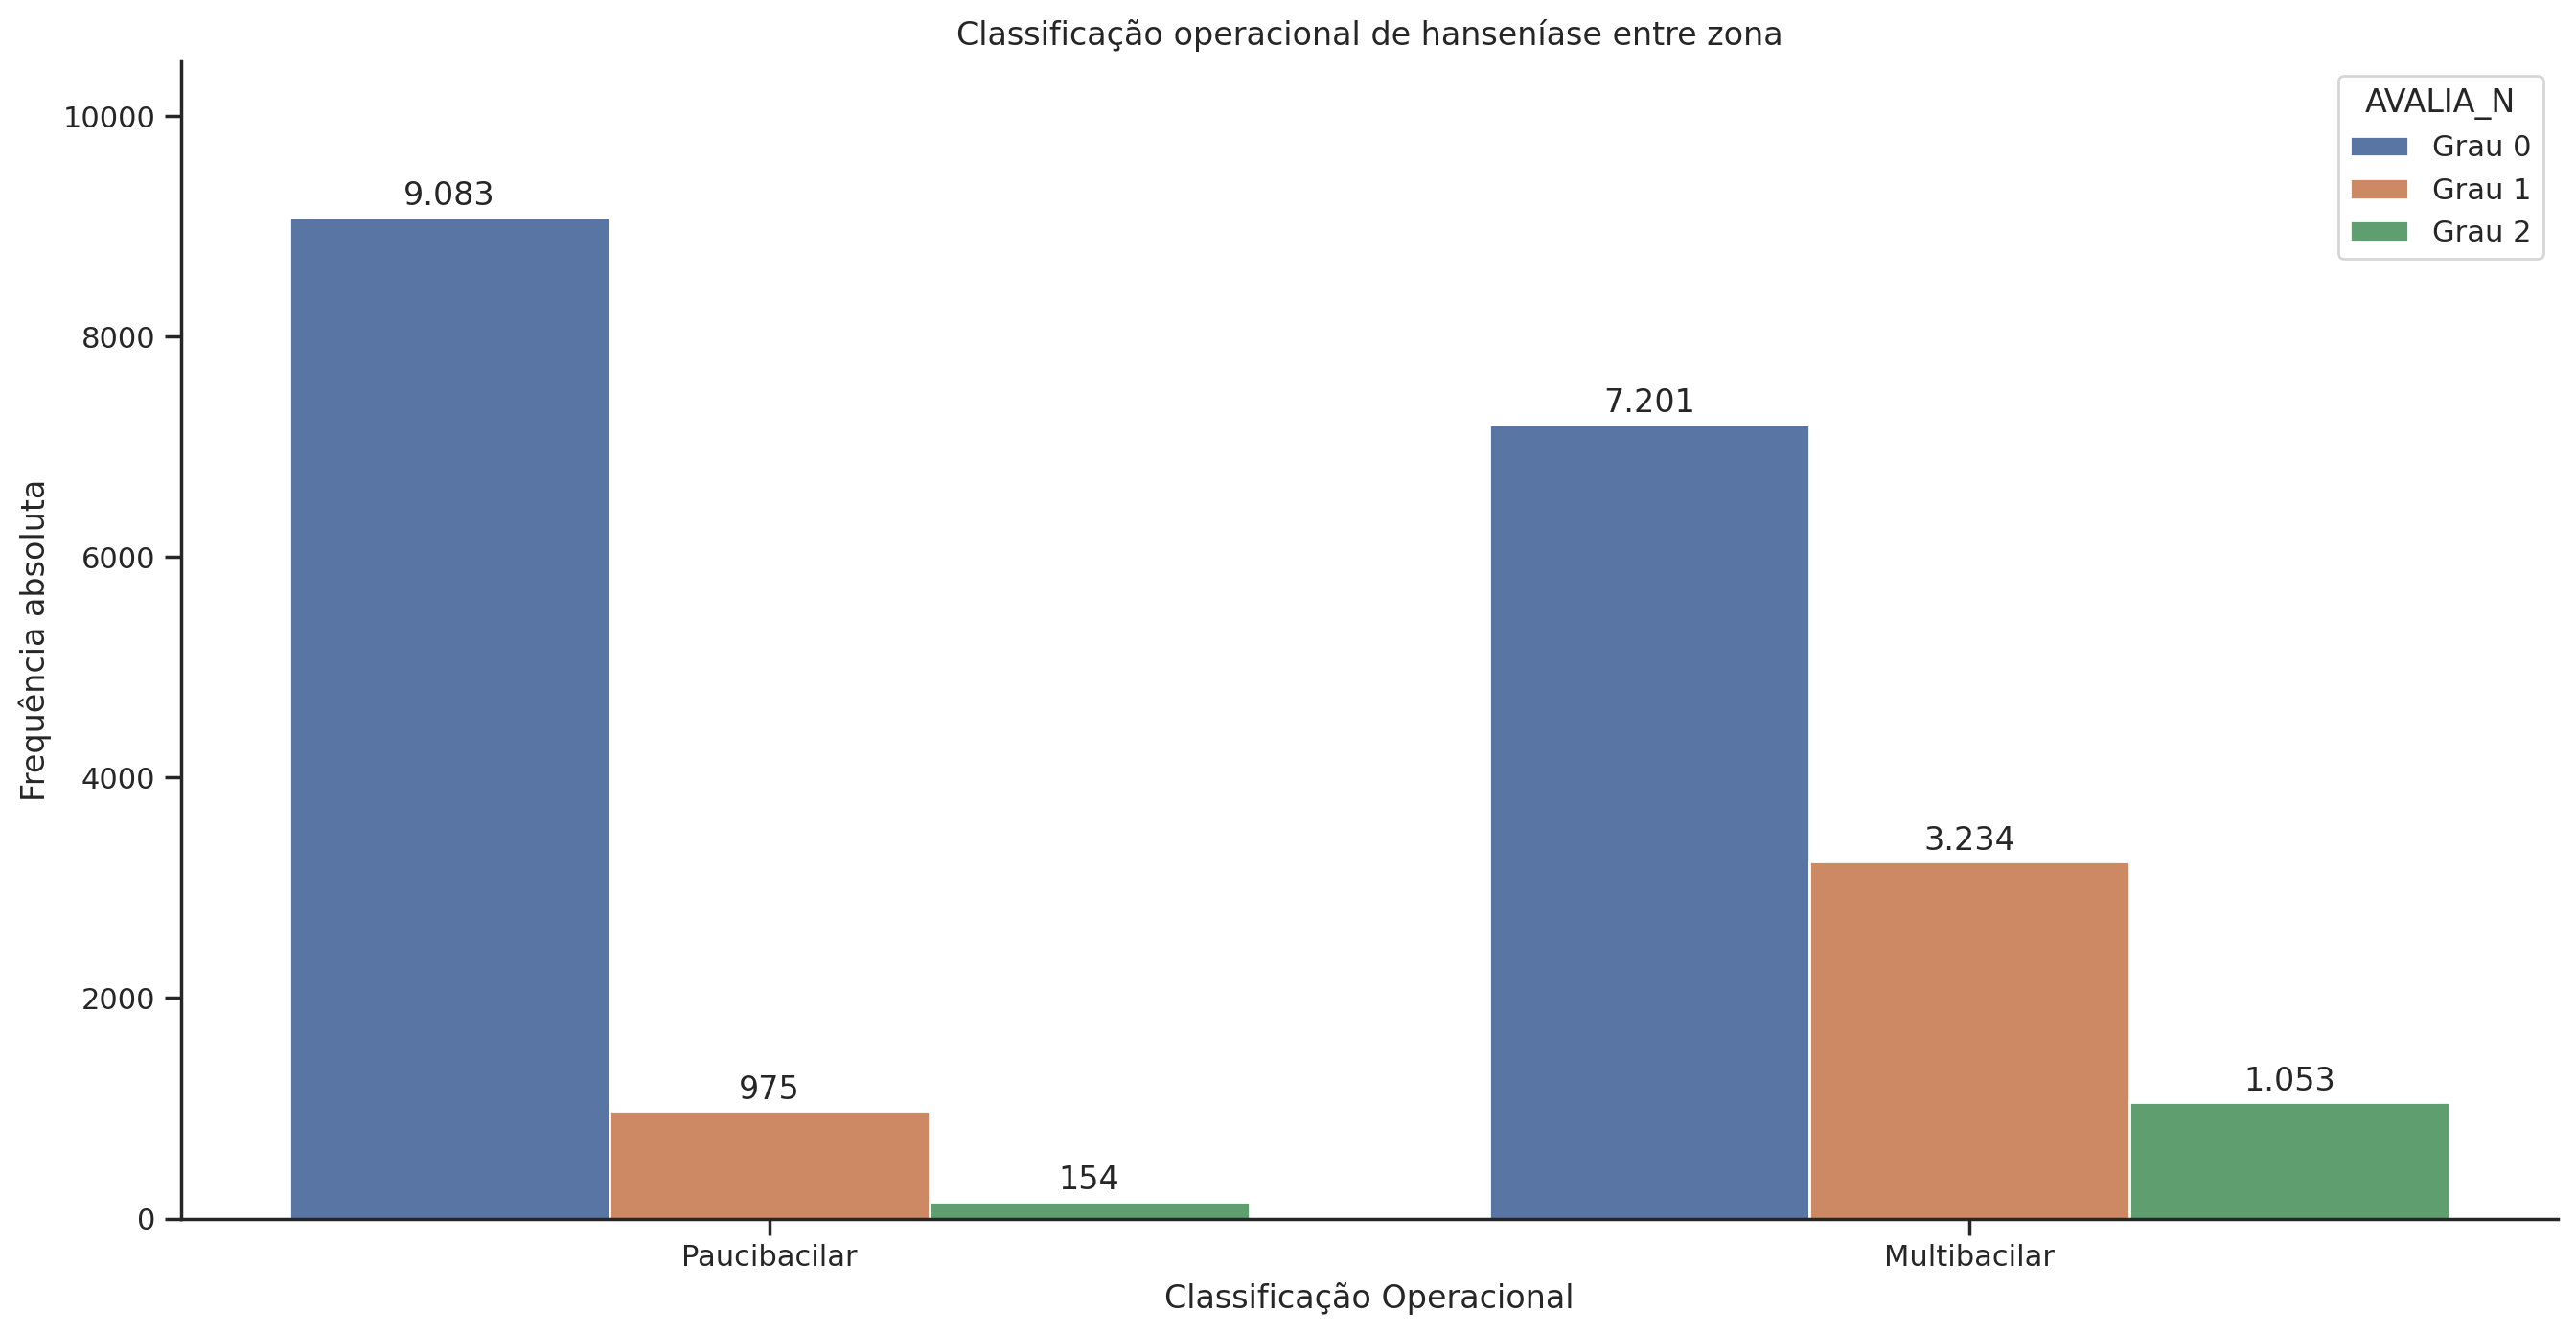

In [276]:
df = database[['CLASSOPERA', 'AVALIA_N']].value_counts().reset_index()
df.columns = ['CLASSOPERA', 'AVALIA_N', 'COUNTS']
data = {
    'AVALIA_N': df['AVALIA_N'],
    'CLASSOPERA': df['CLASSOPERA'],
    'COUNTS': df['COUNTS'],
}
d = pd.DataFrame(data)
plt.figure(figsize=(16,8))
ax = sns.barplot(x='CLASSOPERA', y='COUNTS', hue='AVALIA_N', data=d, order=['Paucibacilar', 'Multibacilar'])
sns.despine()
ax.set(xlabel='Classificação Operacional', ylabel='Frequência absoluta', title='Classificação operacional de hanseníase entre zona', ylim=(0, 10500))
for p in ax.patches:
    ax.annotate(format_number(p.get_height(), 'pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.plot()

## Cálculo de incidência

### Importando os dados e processando os mesmos

In [29]:
data = pd.read_csv('data/populacao_tocantins_2001_2020.csv')
pop_tocantins_dataframe = pd.DataFrame(
    data=data[data['ano'] <= 2016]
)
new_cases = database[database['MODOENTR'] == 'Caso novo']
data_cases = new_cases['NU_ANO'].value_counts().sort_index().reset_index() # Filtrando os casos novos por ano
data_cases_less_15 = new_cases[new_cases['NU_IDADE_N'] < 15]['NU_ANO'].value_counts().sort_index().reset_index() # Filtrando os casos novos por ano
data = pd.DataFrame(data_cases)
data.columns = ['ano', 'quantidade']

In [30]:
merged_dataframe = data.merge(pop_tocantins_dataframe, how='left', on='ano') # Combinando as duas bases de dados em uma apenas

In [31]:
for index, value in merged_dataframe.iterrows():
    current_population = value['populacao_geral']
    current_year = value['ano']
    cases_in_year = value['quantidade']
    rate_incidence = (cases_in_year/current_population) * 100000

In [32]:
rate = []
for index, value in merged_dataframe.iterrows():
    rate_incidence = (value['quantidade']/value['populacao_geral']) * 100000
    rate.append(round(rate_incidence,2))

In [33]:
merged_dataframe['rate_incidence'] = merged_dataframe.apply(lambda row: round((row.quantidade / row.populacao_geral) * 100000, 2), axis=1)

## Novos casos de hanseníase no período de 2001 a 2016

[]

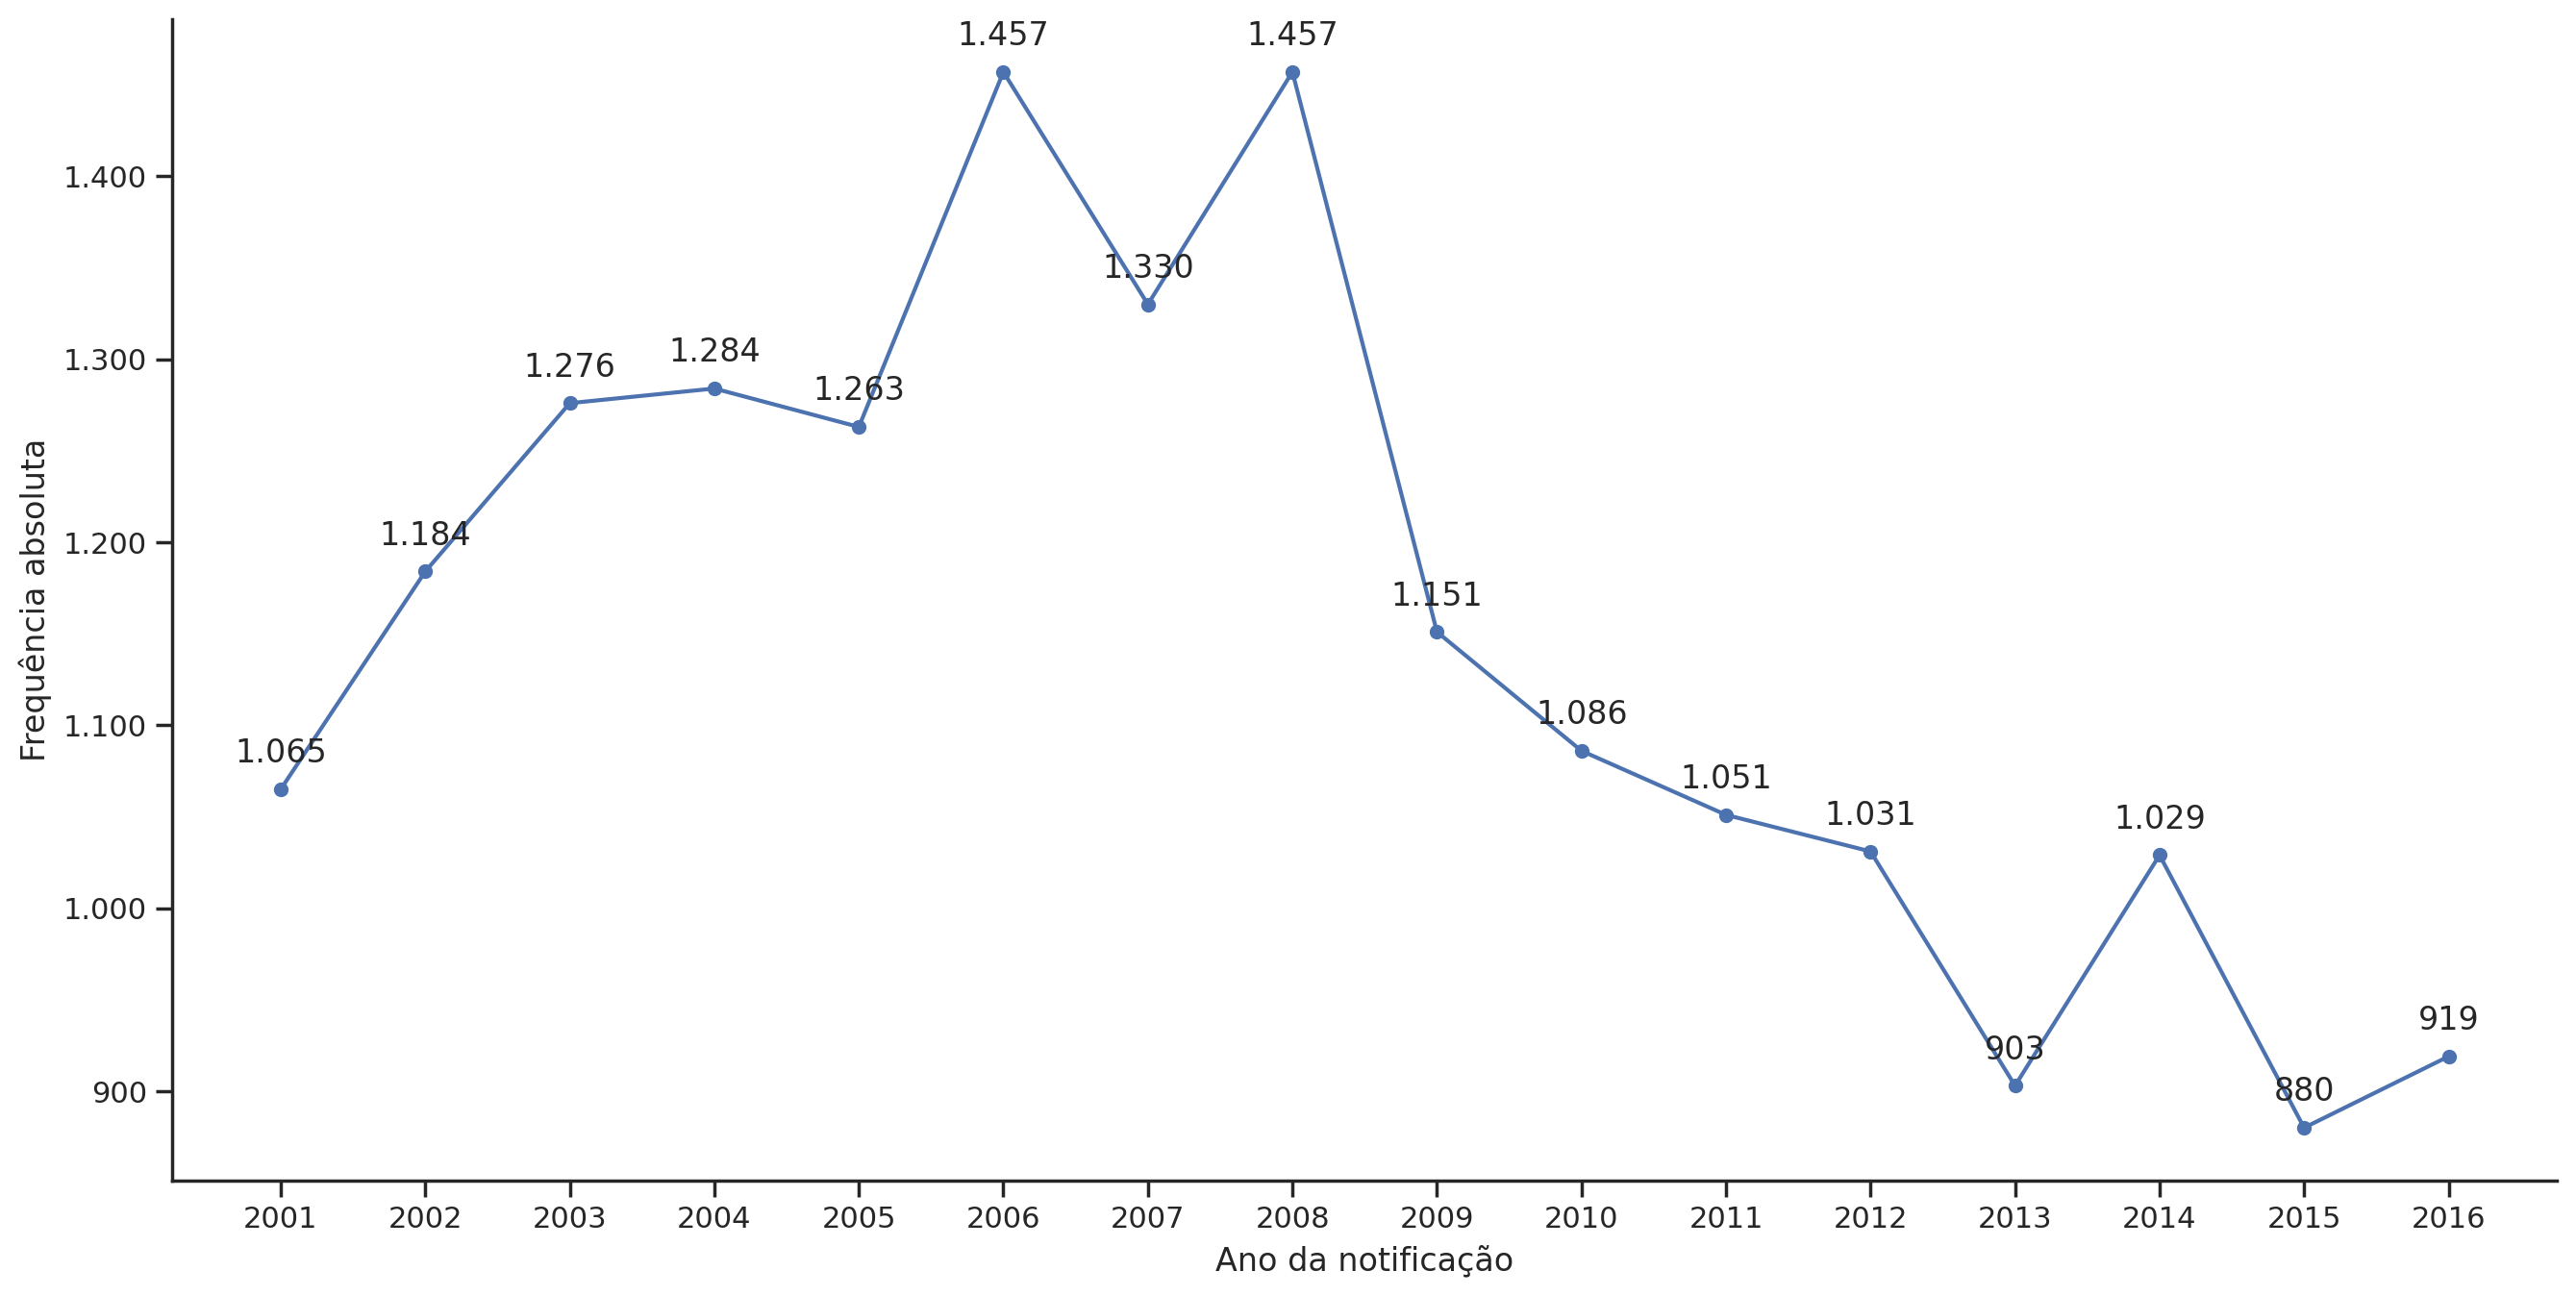

In [35]:
anos = new_cases['NU_ANO'].value_counts(dropna=False).sort_index()
data = pd.DataFrame({
    'labels': anos.keys().to_list(),
    'values': anos.values,
})
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='labels', y='values', data=data, palette=["#004c6d"])
sns.scatterplot(data=data, x='labels', y='values')
sns.despine()
ax.set(
    xlabel='Ano da notificação', 
    ylabel='Frequência absoluta', 
    title=''
)
for x,y in zip(df['labels'], df['values']):
    label = "{}".format(format_number(y, 'pt_BR'))
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(0, 10), ha='center')
ax.yaxis.set_major_formatter(lambda x, p: format_number(x, 'pt_BR'))
ax.set_xticks(range(2001,2017))
ax.set_xticklabels(range(2001, 2017))
for p in ax.patches:
    ax.annotate(format_number(p.get_height(), 'pt_BR'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
ax.plot()

## Taxa de detecção geral de novos casos de hanseníase no período de 2001 a 2016

[]

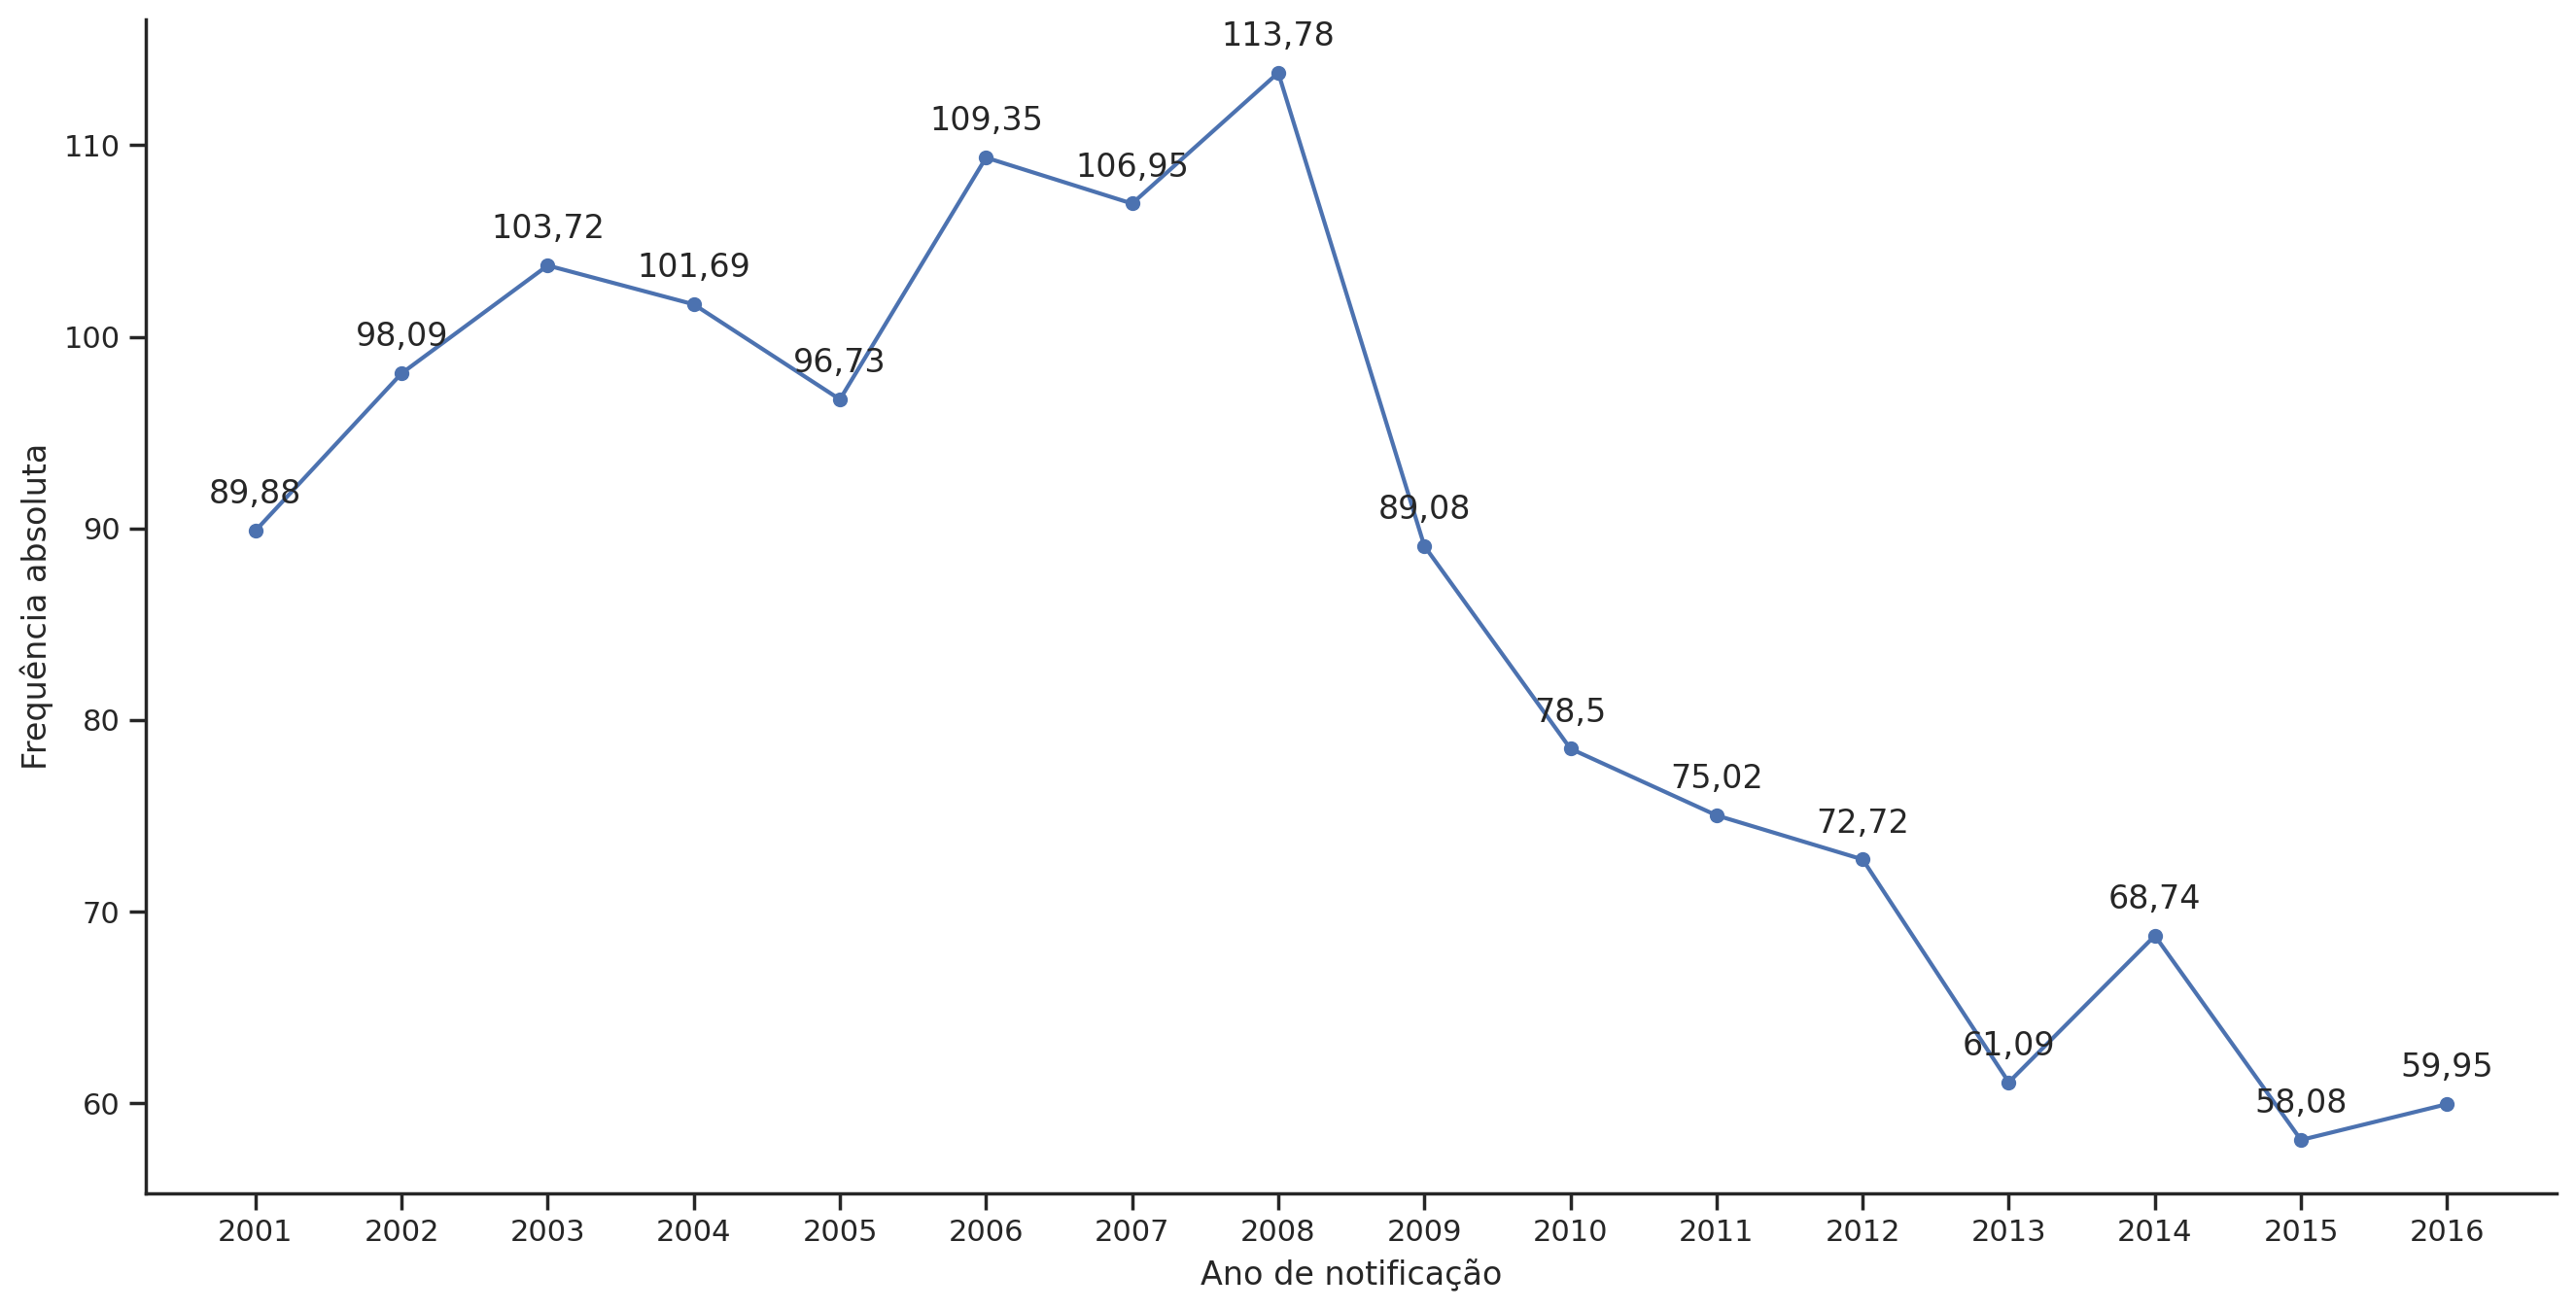

In [40]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(data=merged_dataframe, x="ano", y="rate_incidence",  palette=["#004c6d"] )
sns.scatterplot(data=merged_dataframe, x='ano', y='rate_incidence')
sns.despine()
ax.set(
    title='', 
    xlabel='Ano de notificação', 
    ylabel='Frequência absoluta'
)
for x,y in zip(merged_dataframe.ano, merged_dataframe.rate_incidence):
    label = format_number(y, 'pt_BR')
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(0, 10), ha='center')
ax.set_xticks(range(2001,2017))
ax.set_xticklabels(range(2001, 2017, 1))
ax.plot()

In [43]:
data_cases_less_15 = pd.DataFrame(data=data_cases_less_15)
data_cases_less_15.columns = ['ano','quantidade']

merged_less_15_dataframe = data_cases_less_15.merge(pop_tocantins_dataframe, how='left', on='ano') # Combinando as duas bases de dados em uma apenas
merged_less_15_dataframe['rate_incidence'] = merged_less_15_dataframe.apply(lambda row: round((row.quantidade / row.populacao_menor_15) * 100000, 2), axis=1)

0     21.88
1     22.55
2     26.39
3     22.40
4     23.70
5     27.07
6     24.18
7     30.60
8     19.39
9     16.03
10    15.69
11    15.02
12    14.91
13    16.34
14    13.38
15    11.84
Name: rate_incidence, dtype: float64


[]

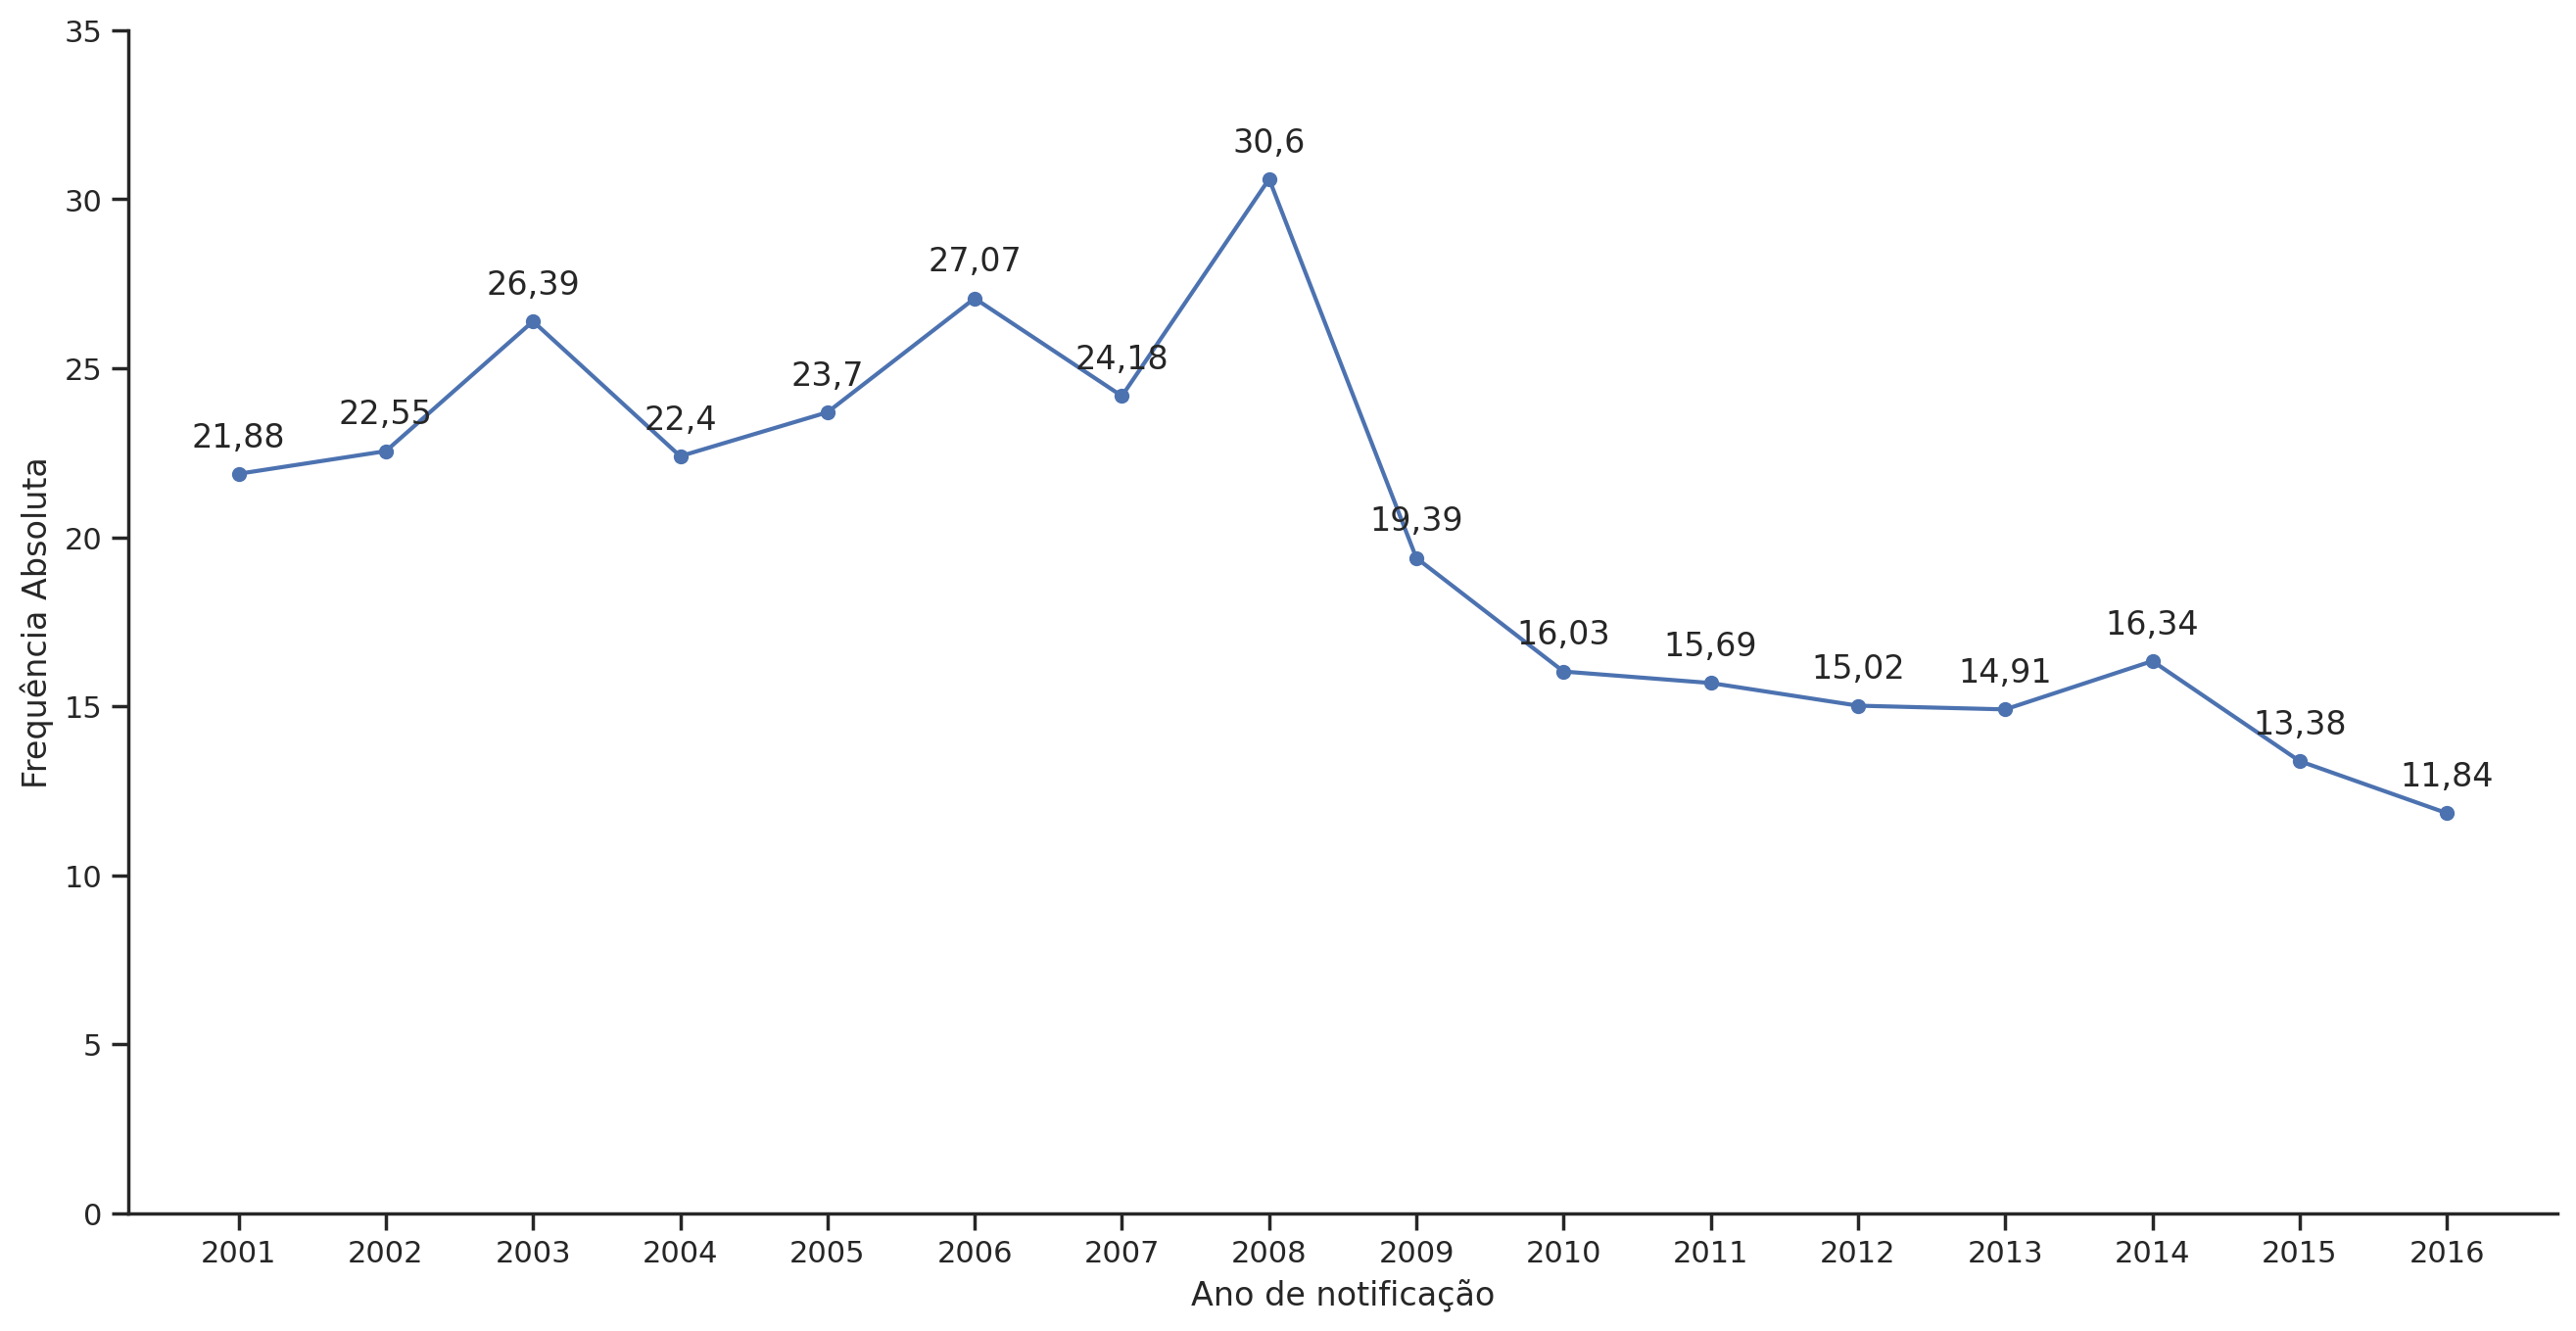

In [49]:
# Taxa de incidência de casos novos de hanseníase para menores 15 anos de hanseníase
plt.figure(figsize=(16,8))
ax = sns.lineplot(data=merged_less_15_dataframe, x="ano", y="rate_incidence")
sns.scatterplot(data=merged_less_15_dataframe, x='ano', y='rate_incidence')
sns.despine()
ax.set(
    title='', 
    xlabel='Ano de notificação', 
    ylabel='Frequência Absoluta',
    ylim=(0, 35)
)
for x,y in zip(merged_less_15_dataframe.ano, merged_less_15_dataframe.rate_incidence):
    label = format_number(y, 'pt_BR')
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(0, 10), ha='center')
ax.set_xticks(range(2001,2017))
ax.set_xticklabels(range(2001, 2017, 1))
ax.plot()

[]

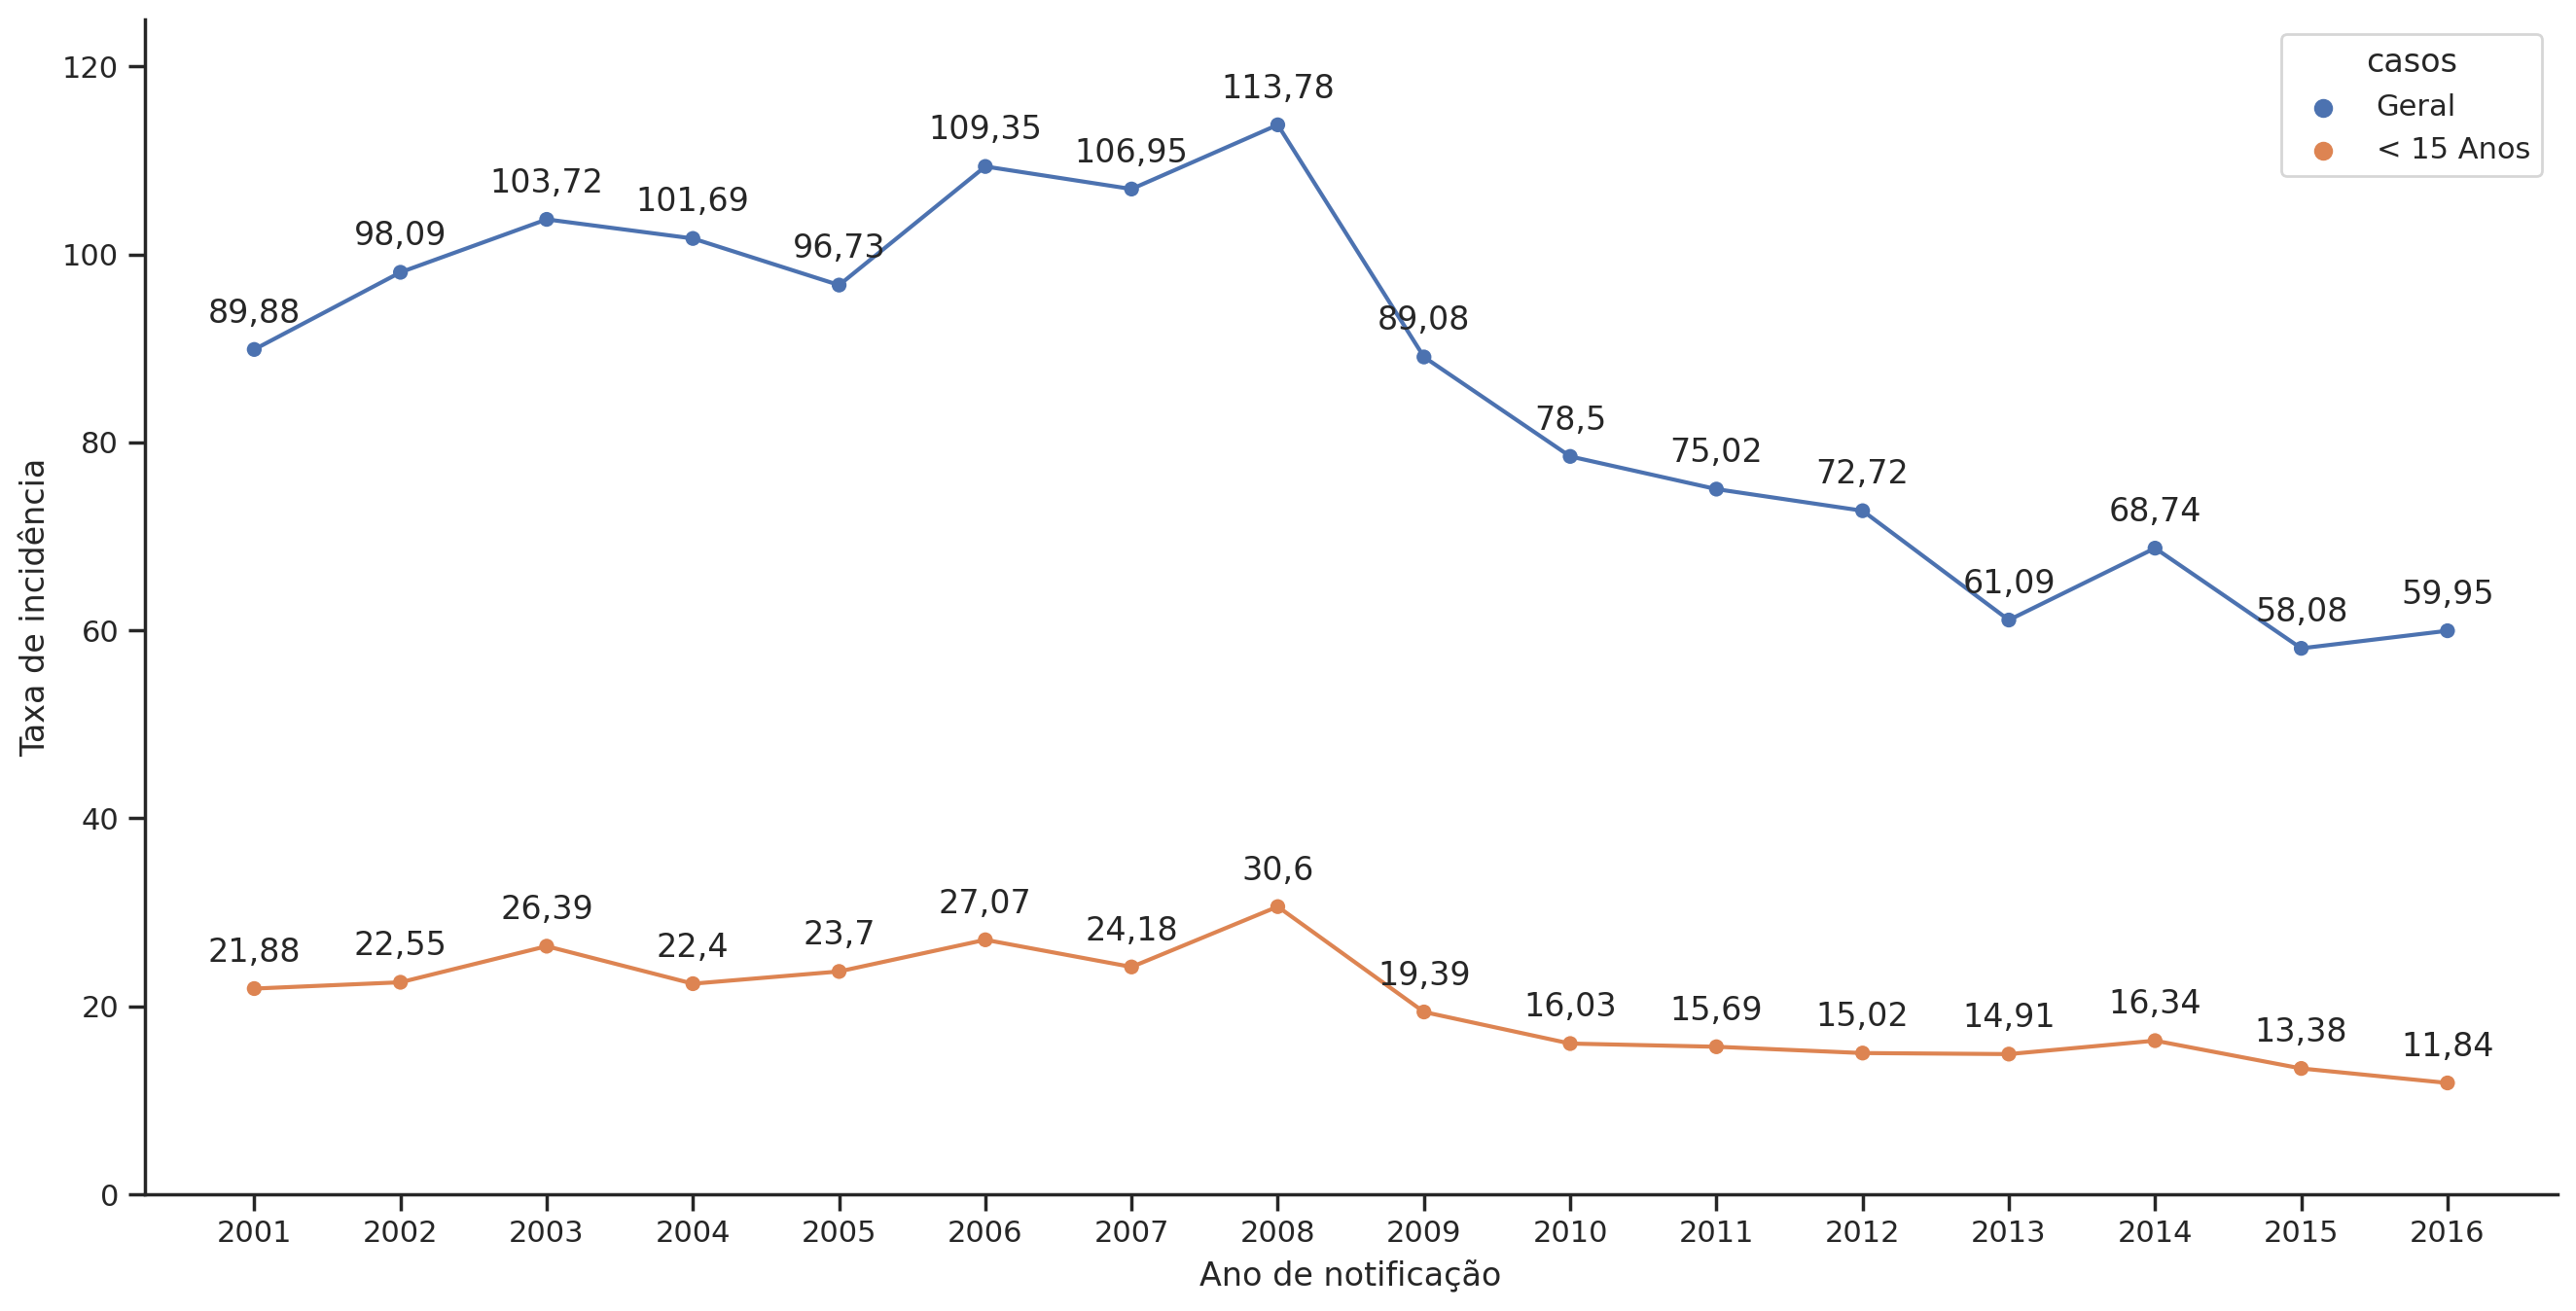

In [50]:
merged_dataframe.astype(str).dtypes
merged_dataframe['casos'] = "Geral"
merged_less_15_dataframe['casos'] = "< 15 Anos"
frames = [merged_dataframe, merged_less_15_dataframe]
concated_dataframe = pd.concat(frames)
plt.figure(figsize=(16,8))
ax = sns.lineplot(data=concated_dataframe, x="ano", y="rate_incidence", hue="casos", legend=False)
sns.scatterplot(data=concated_dataframe, x="ano", y="rate_incidence", hue="casos")
sns.despine()
for x,y in zip(concated_dataframe.ano, concated_dataframe.rate_incidence):
    label = format_number(y, 'pt_BR')
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(0, 10), ha='center')
ax.set(title='', 
       xlabel='Ano de notificação', 
       ylabel='Taxa de incidência',
       ylim=(0,125),
)
ax.set_xticks(range(2001,2017))
ax.set_xticklabels(range(2001, 2017, 1))
ax.plot()